This script setup the experiments, assuming that the l4s part has been installed correctly. 

In [1]:
import subprocess

tx0_prefix = "ssh PeterYao@pc490.emulab.net"
router0_prefix = "ssh PeterYao@pc500.emulab.net"
router1_prefix = "ssh PeterYao@pc487.emulab.net"
rx0_prefix = "ssh PeterYao@pc816.emulab.net"

nodes_prefix = [tx0_prefix, router0_prefix, router1_prefix, rx0_prefix]

class node:
    def __init__(self, node_ssh_prefix) -> None:
        self.ssh_prefix = node_ssh_prefix

    def execute(self, command, background=False):
        if background:
            print("executing in background")
            # full_command = f"{self.ssh_prefix} 'setsid nohup {command} > /dev/null 2>&1 &'"
            full_command = f'{self.ssh_prefix} "{command}"'
            subprocess.Popen(full_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        else:
            full_command = f'{self.ssh_prefix} "{command}"'
            result = subprocess.run(full_command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            if result.returncode == 0:
                print(result.stdout.decode('utf-8'))
            else:
                print(f"Error: {result.stderr.decode('utf-8')}")
        return None
        
tx0_node = node(tx0_prefix)
delay_node = node(router0_prefix)
router_node = node(router1_prefix)
rx0_node = node(rx0_prefix)

nodes = [tx0_node, delay_node, router_node, rx0_node]





In [2]:
from fabric import Connection


tx = Connection(
    host='pc490.emulab.net',
    user = 'PeterYao',
    port=22,
)




delay = Connection(
    host='pc500.emulab.net',
    user = 'PeterYao',
    port=22,
)


router = Connection(
    host='pc487.emulab.net',
    user='PeterYao',
    port=22,
)

rx = Connection(
    host='pc816.emulab.net',
    user
    = 'PeterYao',  
    port=22,
)

conns = [router, delay, tx, rx]


# Experiment 1 50-50 base thp and latency

In [3]:
commands_noecn = "bash -c 'sudo sysctl -w net.ipv4.tcp_congestion_control=cubic; sudo sysctl -w net.ipv4.tcp_ecn=0'"
for node in nodes:
    node.execute(commands_noecn)
    
print("validating...")
for node in nodes:
    node.execute("sudo sysctl net.ipv4.tcp_congestion_control")
    node.execute("sudo sysctl net.ipv4.tcp_ecn")

net.ipv4.tcp_congestion_control = cubic
net.ipv4.tcp_ecn = 0

net.ipv4.tcp_congestion_control = cubic
net.ipv4.tcp_ecn = 0

net.ipv4.tcp_congestion_control = cubic
net.ipv4.tcp_ecn = 0

net.ipv4.tcp_congestion_control = cubic
net.ipv4.tcp_ecn = 0

validating...
net.ipv4.tcp_congestion_control = cubic

net.ipv4.tcp_ecn = 0

net.ipv4.tcp_congestion_control = cubic

net.ipv4.tcp_ecn = 0

net.ipv4.tcp_congestion_control = cubic

net.ipv4.tcp_ecn = 0

net.ipv4.tcp_congestion_control = cubic

net.ipv4.tcp_ecn = 0



In [4]:
# for some reason, this cannot be automated

for node in nodes:
    # Download and unzip the kernel package
    node.execute("wget https://github.com/L4STeam/linux/releases/download/testing-build/l4s-testing.zip")
    node.execute("sudo apt install unzip")
    node.execute("unzip l4s-testing.zip")
    
    # Install the kernel packages and update GRUB
    node.execute("sudo dpkg --install debian_build/*")
    node.execute("sudo update-grub")
    node.execute("sudo reboot")

for node in nodes:
    # check kernel version
    node.execute("hostname; uname -a")


Reading package lists...
Building dependency tree...
Reading state information...
unzip is already the newest version (6.0-26ubuntu3.2).
The following package was automatically installed and is no longer required:
  libbpf0
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 107 not upgraded.



In [ ]:
cmd_dualpi2="""sudo apt-get update
sudo apt -y install git gcc make bison flex libdb-dev libelf-dev pkg-config libbpf-dev libmnl-dev libcap-dev libatm1-dev selinux-utils libselinux1-dev
sudo git clone https://github.com/L4STeam/iproute2.git
cd iproute2
sudo chmod +x configure
sudo ./configure
sudo make
sudo make install"""

router.run(cmd_dualpi2)
router.run("sudo modprobe sch_dualpi2")

In [ ]:
packages = ['iperf3', 'net-tools', 'moreutils']
for conn in conns:
    for package in packages:
        conn.sudo(f'sudo apt update; apt-get -y install {package}')

In [5]:
offloads = ["gro", "lro", "gso", "tso"]

for conn in conns[:3]:
    for offload in offloads:
        conn.sudo(f'ethtool -K eno3 {offload} off', warn=True)
        conn.sudo(f'ethtool -K enp5s0f0 {offload} off', warn=True)
        conn.sudo(f'ethtool -K enp4s0f0 {offload} off',     warn=True)
        conn.sudo(f'ethtool -K enp6s0f3 {offload} off',    warn=True)
        
        
        
        
        



netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (offset 24)
netlink error: No such device
netlink error: no device matches name (o

In [4]:
rx.sudo('ethtool -K vlan171 gro off')
rx.sudo('ethtool -K vlan171 lro off')
rx.sudo('ethtool -K vlan171 gso off')
rx.sudo('ethtool -K vlan171 tso off')

Cannot change large-receive-offload


<Result cmd="sudo -S -p '[sudo] password: ' ethtool -K vlan171 tso off" exited=0>

In [15]:
# modify the delay on the delay node
base_rtt = 25
delay_interfaces = ["enp5s0f0", "eno3"]

for e in delay_interfaces:
    cmds = "sudo tc qdisc replace dev {iface} root netem delay {owd}ms limit 60000".format(iface=e, owd=base_rtt/2)
    delay.run(cmds)

In [6]:
delay.run("sudo tc qdisc show dev enp5s0f0")
delay.run("sudo tc qdisc show dev eno3")

qdisc netem 8001: root refcnt 9 limit 60000 delay 12.5ms
qdisc netem 8002: root refcnt 9 limit 60000 delay 12.5ms


<Result cmd='sudo tc qdisc show dev eno3' exited=0>

In [7]:
# set up the btl node
n_bdp = 2
base_rtt = 25
btl_capacity = 100 #in Mbps

# fixed values
btl_limit    = int(1000*n_bdp*btl_capacity*base_rtt/8) # limit of the bottleneck, n_bdp x BDP in bytes 
packet_number=int(btl_limit/1500)+1

print("btl limit: ", btl_limit)
print("packet number: ", packet_number)

btl limit:  625000
packet number:  417


In [8]:
from fabric import ThreadingGroup
from invoke.exceptions import UnexpectedExit

# Define hosts with respective ports
hosts = [
    'PeterYao@pc605.emulab.net:30042',
    'PeterYao@pc603.emulab.net:30042',
    'PeterYao@pc604.emulab.net:30042',
    'PeterYao@pc760.emulab.net:22',
]

# Initialize the ThreadingGroup
group = ThreadingGroup(*hosts)

commands = [
    "wget https://github.com/L4STeam/linux/releases/download/testing-build/l4s-testing.zip",
    "sudo apt update && sudo apt install -y unzip",
    "unzip l4s-testing.zip",
    "sudo dpkg --install debian_build/*",
    "sudo update-grub",
    "sudo reboot"
]

with group as g:
    for cmd in commands:
        try:
            print(f"Executing: {cmd}")
            g.run(cmd, hide=False)
        except UnexpectedExit as e:
            print(f"Command failed: {cmd}\nError: {e}")

Executing: wget https://github.com/L4STeam/linux/releases/download/testing-build/l4s-testing.zip


--2024-09-16 00:40:41--  https://github.com/L4STeam/linux/releases/download/testing-build/l4s-testing.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... --2024-09-16 00:40:42--  https://github.com/L4STeam/linux/releases/download/testing-build/l4s-testing.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... --2024-09-16 00:40:42--  https://github.com/L4STeam/linux/releases/download/testing-build/l4s-testing.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/172778452/0854110e-90dc-44f0-830f-19c83ec8fe1b?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20240916%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20240916T064042Z&X-Amz

Executing: sudo apt update && sudo apt install -y unzip


Hit:1 http://repos.emulab.net/emulab/ubuntu jammy InRelease
Hit:2 http://repos.emulab.net/grub-backports/ubuntu jammy InRelease
Hit:1 http://repos.emulab.net/emulab/ubuntu jammy InRelease
Hit:1 http://repos.emulab.net/emulab/ubuntu jammy InRelease
Hit:2 http://repos.emulab.net/grub-backports/ubuntu jammy InRelease
Hit:2 http://repos.emulab.net/grub-backports/ubuntu jammy InRelease
Hit:1 https://apt.kitware.com/ubuntu bionic InRelease
Hit:3 http://us.archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://download.docker.com/linux/ubuntu bionic InRelease
Hit:3 http://us.archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease
Get:4 http://us.archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Err:1 https://apt.kitware.com/ubuntu bionic InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY 1A127079A92F09ED
Get:4 http://us.archive.ubuntu.com/ubuntu jammy-updates In

106 packages can be upgraded. Run 'apt list --upgradable' to see them.


Reading package lists...


Building dependency tree...

Reading package lists...
Building dependency tree...
Reading state information...
106 packages can be upgraded. Run 'apt list --upgradable' to see them.



Reading state information...

Reading state information...


 does not have a stable CLI interface. Use with caution in scripts.

Reading package lists...


Building dependency tree...Suggested packages:
  zip

The following packages will be upgraded:
  unzip
1 upgraded, 0 newly installed, 0 to remove and 105 not upgraded.
Need to get 175 kB of archives.
After this operation, 1,024 B of additional disk space will be used.
Get:1 http://us.archive.ubuntu.com/ubuntu jammy-updates/main amd64 unzip amd64 6.0-26ubuntu3.2 [175 kB]
Reading state information...
Suggested packages:
  zip
The following packages will be upgraded:
  unzip
Suggested packages:
  zip
The following packages will be upgraded:
  unzip
1 upgraded, 0 newly installed, 0 to remove and 105 not upgraded.
Need to get 175 kB of archives.
After this operation, 1,024 B of additional disk space will be used.
Get:1 http://us.archive.ubuntu.com/ubuntu jammy-updates/main amd64 unzip amd64 6.0-26ubuntu3.2 [175 kB]

1 upgraded, 0 newly installed, 0 to remove and 105 not upgraded.
Need to get 175 kB of archives.
After this operation, 1,024 B of additional disk space will be used.
Get:1 http

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 175 kB in 0s (488 kB/s)

Reading state information...
349 packages can be upgraded. Run 'apt list --upgradable' to see them.


W: An error occurred during the signature verification. The repository is not updated and the previous index files will be used. GPG error: https://apt.kitware.com/ubuntu bionic InRelease: The following signatures couldn't be verified because the public key is not available: NO_PUBKEY 1A127079A92F09ED
W: Failed to fetch https://apt.kitware.com/ubuntu/dists/bionic/InRelease  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY 1A127079A92F09ED
W: Some index files failed to download. They have been ignored, or old ones used instead.




Reading package lists...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


Building dependency tree...

debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


Fetched 175 kB in 0s (405 kB/s)


debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 175 kB in 0s (404 kB/s)
(Reading database ... 95638 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-26ubuntu3.2_amd64.deb ...
(Reading database ... 95638 files and directories currently installed.)tabase ... 65%
Preparing to unpack .../unzip_6.0-26ubuntu3.2_amd64.deb ...

(Reading database ... 95638 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-26ubuntu3.2_amd64.deb ...
Unpacking unzip (6.0-26ubuntu3.2) over (6.0-26ubuntu3.1) ...
Unpacking unzip (6.0-26ubuntu3.2) over (6.0-26ubuntu3.1) ...

Reading state information...
Setting up unzip (6.0-26ubuntu3.2) ...
Setting up unzip (6.0-26ubuntu3.2) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
The following packages were automatically installed and are no longer required:
  libarchive13 libjsoncpp1 librhash0 libuv1
Use 'sudo apt autoremove' to remove them.
Setting up unzip (6.0-26ubuntu3.2) ...
The following packages will be

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 168 kB in 0s (411 kB/s)
(Reading database ... 150250 files and directories currently installed.)
Preparing to unpack .../unzip_6.0-21ubuntu1.2_amd64.deb ...
Unpacking unzip (6.0-21ubuntu1.2) over (6.0-21ubuntu1.1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Setting up unzip (6.0-21ubuntu1.2) ...
Processing triggers for man-db (2.8.3-2) ...
Executing: unzip l4s-testing.zip
Archive:  l4s-testing.zip
   creating: debian_build/
  inflating: debian_build/iproute2_5.10.0-1_amd64.deb  Archive:  l4s-testing.zip

  inflating: debian_build/linux-image-5.15.72-56eae305c-prague-91_1_amd64.deb     creating: debian_build/
  inflating: debian_build/iproute2_5.10.0-1_amd64.deb  
  inflating: debian_build/linux-image-5.15.72-56eae305c-prague-91_1_amd64.deb  Archive:  l4s-testing.zip
   creating: debian_build/
  inflating: debian_build/iproute2_5.10.0-1_amd64.deb  Archive:  l4s-testing.zip
   creating: debian_build/
  inflating: debian_build/iproute2_5.10.0-1_amd64.deb  
  inflati

dpkg: warning: downgrading iproute2 from 5.15.0-1ubuntu2 to 5.10.0-1


Selecting previously unselected package iproute2-doc.
Preparing to unpack .../iproute2-doc_5.10.0-1_all.deb ...
Unpacking iproute2-doc (5.10.0-1) ...
(Reading database ... 95638 files and directories currently installed.)
Preparing to unpack .../iproute2_5.10.0-1_amd64.deb ...
Selecting previously unselected package linux-headers-5.15.72-56eae305c-prague-91.
Preparing to unpack .../linux-headers-5.15.72-56eae305c-prague-91_1_amd64.deb ...
Unpacking linux-headers-5.15.72-56eae305c-prague-91 (1) ...
Unpacking iproute2 (5.10.0-1) over (5.15.0-1ubuntu2) ...


dpkg: warning: downgrading iproute2 from 5.15.0-1ubuntu2 to 5.10.0-1
dpkg: warning: downgrading iproute2 from 5.15.0-1ubuntu2 to 5.10.0-1


(Reading database ... 95638 files and directories currently installed.)
Preparing to unpack .../iproute2_5.10.0-1_amd64.deb ...
Unpacking iproute2 (5.10.0-1) over (5.15.0-1ubuntu2) ...
(Reading database ... 95638 files and directories currently installed.)
Preparing to unpack .../iproute2_5.10.0-1_amd64.deb ...
Unpacking iproute2 (5.10.0-1) over (5.15.0-1ubuntu2) ...
Selecting previously unselected package iproute2-doc.
Preparing to unpack .../iproute2-doc_5.10.0-1_all.deb ...
Unpacking iproute2-doc (5.10.0-1) ...
Selecting previously unselected package iproute2-doc.
Preparing to unpack .../iproute2-doc_5.10.0-1_all.deb ...
Unpacking iproute2-doc (5.10.0-1) ...
Selecting previously unselected package linux-headers-5.15.72-56eae305c-prague-91.
Preparing to unpack .../linux-headers-5.15.72-56eae305c-prague-91_1_amd64.deb ...
Unpacking linux-headers-5.15.72-56eae305c-prague-91 (1) ...
Selecting previously unselected package iproute2-doc.
Preparing to unpack .../iproute2-doc_5.10.0-1_all.d

dpkg: warning: downgrading linux-libc-dev:amd64 from 4.15.0-159.167 to 1


Preparing to unpack .../linux-libc-dev_1_amd64.deb ...
Unpacking linux-libc-dev:amd64 (1) over (4.15.0-159.167) ...


dpkg: dependency problems prevent configuration of iproute2:
 iproute2 depends on libc6 (>= 2.29); however:
  Version of libc6:amd64 on system is 2.27-3ubuntu1.2.

dpkg: error processing package iproute2 (--install):
 dependency problems - leaving unconfigured


Setting up iproute2-doc (5.10.0-1) ...
Setting up linux-headers-5.15.72-56eae305c-prague-91 (1) ...
Setting up linux-image-5.15.72-56eae305c-prague-91 (1) ...


Error! Bad return status for module build on kernel: 5.15.72-56eae305c-prague-91 (x86_64)
Consult /var/lib/dkms/e1000e-dkms/3.4.2.3/build/make.log for more information.


Selecting previously unselected package linux-image-5.15.72-56eae305c-prague-91.
Preparing to unpack .../linux-image-5.15.72-56eae305c-prague-91_1_amd64.deb ...
Unpacking linux-image-5.15.72-56eae305c-prague-91 (1) ...
Selecting previously unselected package linux-image-5.15.72-56eae305c-prague-91.
Preparing to unpack .../linux-image-5.15.72-56eae305c-prague-91_1_amd64.deb ...
Unpacking linux-image-5.15.72-56eae305c-prague-91 (1) ...
Selecting previously unselected package linux-image-5.15.72-56eae305c-prague-91.
Preparing to unpack .../linux-image-5.15.72-56eae305c-prague-91_1_amd64.deb ...
Unpacking linux-image-5.15.72-56eae305c-prague-91 (1) ...


Error! Bad return status for module build on kernel: 5.15.72-56eae305c-prague-91 (x86_64)
Consult /var/lib/dkms/i40e-dkms/2.7.29/build/make.log for more information.
Error! Bad return status for module build on kernel: 5.15.72-56eae305c-prague-91 (x86_64)
Consult /var/lib/dkms/i40evf-dkms/3.6.15/build/make.log for more information.
Error! Bad return status for module build on kernel: 5.15.72-56eae305c-prague-91 (x86_64)
Consult /var/lib/dkms/igb-dkms/5.3.5.22/build/make.log for more information.
Error! Bad return status for module build on kernel: 5.15.72-56eae305c-prague-91 (x86_64)
Consult /var/lib/dkms/ixgbe-dkms/5.5.3/build/make.log for more information.
Error! Bad return status for module build on kernel: 5.15.72-56eae305c-prague-91 (x86_64)
Consult /var/lib/dkms/ixgbevf-dkms/4.5.2/build/make.log for more information.
Error! Bad return status for module build on kernel: 5.15.72-56eae305c-prague-91 (x86_64)
Consult /var/lib/dkms/mpt3sas-dkms/26.00.00.00/build/make.log for more info

Preparing to unpack .../linux-libc-dev_1_amd64.deb ...
Unpacking linux-libc-dev:amd64 (1) over (5.15.0-113.123) ...


dpkg: warning: downgrading linux-libc-dev:amd64 from 5.15.0-113.123 to 1


Preparing to unpack .../linux-libc-dev_1_amd64.deb ...
Unpacking linux-libc-dev:amd64 (1) over (5.15.0-113.123) ...


dpkg: warning: downgrading linux-libc-dev:amd64 from 5.15.0-113.123 to 1


Preparing to unpack .../linux-libc-dev_1_amd64.deb ...
Unpacking linux-libc-dev:amd64 (1) over (5.15.0-113.123) ...
Setting up iproute2 (5.10.0-1) ...
Installing new version of config file /etc/iproute2/rt_protos ...
Setting up iproute2 (5.10.0-1) ...
Installing new version of config file /etc/iproute2/rt_protos ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


Setting up iproute2-doc (5.10.0-1) ...


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline


Setting up linux-headers-5.15.72-56eae305c-prague-91 (1) ...


debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


Setting up iproute2 (5.10.0-1) ...
Setting up linux-image-5.15.72-56eae305c-prague-91 (1) ...
Installing new version of config file /etc/iproute2/rt_protos ...
 * dkms: running auto installation service for kernel 5.15.72-56eae305c-prague-91
Setting up iproute2-doc (5.10.0-1) ...
Setting up linux-headers-5.15.72-56eae305c-prague-91 (1) ...
Setting up linux-image-5.15.72-56eae305c-prague-91 (1) ...
 * dkms: running auto installation service for kernel 5.15.72-56eae305c-prague-91


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype



Kernel preparation unnecessary for this kernel. Skipping...

Setting up iproute2-doc (5.10.0-1) ...
Building module:
cleaning build area...Setting up linux-headers-5.15.72-56eae305c-prague-91 (1) ...
Setting up linux-image-5.15.72-56eae305c-prague-91 (1) ...

make -j1 KERNELRELEASE=5.15.72-56eae305c-prague-91 -C /lib/modules/5.15.72-56eae305c-prague-91/build M=/var/lib/dkms/emulab-ipod-dkms/3.3.0/build...
Kernel preparation unnecessary for this kernel. Skipping...

Building module:
cleaning build area... * dkms: running auto installation service for kernel 5.15.72-56eae305c-prague-91

make -j1 KERNELRELEASE=5.15.72-56eae305c-prague-91 -C /lib/modules/5.15.72-56eae305c-prague-91/build M=/var/lib/dkms/emulab-ipod-dkms/3.3.0/build...
Kernel preparation unnecessary for this kernel. Skipping...

Building module:
cleaning build area...
make -j1 KERNELRELEASE=5.15.72-56eae305c-prague-91 -C /lib/modules/5.15.72-56eae305c-prague-91/build M=/var/lib/dkms/emulab-ipod-dkms/3.3.0/build.........
Si

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


 - /var/lib/dkms/emulab-ipod-dkms/3.3.0/5.15.72-56eae305c-prague-91/x86_64/module/ipod.ko
Signing module:


debconf: unable to initialize frontend: Dialog
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
EFI variables are not supported on this system
/sys/firmware/efi/efivars not found, aborting.
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


 - /var/lib/dkms/emulab-ipod-dkms/3.3.0/5.15.72-56eae305c-prague-91/x86_64/module/ipod.ko
cleaning build area...

ipod.ko:
Running module version sanity check.


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
EFI variables are not supported on this system
/sys/firmware/efi/efivars not found, aborting.


cleaning build area... - Original module
   - No original module exists within this kernel
 - Installation
   - Installing to /lib/modules/5.15.72-56eae305c-prague-91/updates/dkms/


depmod...
ipod.ko:
Running module version sanity check.
 - Original module
   - No original module exists within this kernel
 - Installation
   - Installing to /lib/modules/5.15.72-56eae305c-prague-91/updates/dkms/

depmod...
Signing module:


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


 - /var/lib/dkms/emulab-ipod-dkms/3.3.0/5.15.72-56eae305c-prague-91/x86_64/module/ipod.ko


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
EFI variables are not supported on this system
/sys/firmware/efi/efivars not found, aborting.


cleaning build area...

ipod.ko:
Running module version sanity check.
 - Original module
   - No original module exists within this kernel
 - Installation
   - Installing to /lib/modules/5.15.72-56eae305c-prague-91/updates/dkms/

depmod........

Sourcing file `/etc/default/grub'
Generating grub configuration file ...
Found linux image: /boot/vmlinuz-5.15.72-56eae305c-prague-91
Found initrd image: /boot/initrd.img-5.15.72-56eae305c-prague-91
Found linux image: /boot/vmlinuz-4.15.0-159-generic
Found initrd image: /boot/initrd.img-4.15.0-159-generic


...

Found memtest86+ image: /boot/memtest86+.elf
Found memtest86+ image: /boot/memtest86+.bin



   ...done.


done


Setting up linux-libc-dev:amd64 (1) ...
Processing triggers for man-db (2.8.3-2) ...


update-initramfs: Generating /boot/initrd.img-5.15.72-56eae305c-prague-91



   ...done.


update-initramfs: Generating /boot/initrd.img-5.15.72-56eae305c-prague-91


.

Errors were encountered while processing:
 iproute2



   ...done.


update-initramfs: Generating /boot/initrd.img-5.15.72-56eae305c-prague-91
Sourcing file `/etc/default/grub'
Sourcing file `/etc/default/grub.d/init-select.cfg'
Generating grub configuration file ...
Found linux image: /boot/vmlinuz-5.15.72-56eae305c-prague-91
Found initrd image: /boot/initrd.img-5.15.72-56eae305c-prague-91
Found linux image: /boot/vmlinuz-5.15.0-113-generic
Found initrd image: /boot/initrd.img-5.15.0-113-generic
Sourcing file `/etc/default/grub'
Systems on them will not be added to the GRUB boot configuration.
Check GRUB_DISABLE_OS_PROBER documentation entry.
done


Setting up linux-libc-dev:amd64 (1) ...
Processing triggers for man-db (2.10.2-1) ...


Sourcing file `/etc/default/grub.d/init-select.cfg'
Generating grub configuration file ...
Found linux image: /boot/vmlinuz-5.15.72-56eae305c-prague-91
Found initrd image: /boot/initrd.img-5.15.72-56eae305c-prague-91
Found linux image: /boot/vmlinuz-5.15.0-113-generic
Found initrd image: /boot/initrd.img-5.15.0-113-generic
Sourcing file `/etc/default/grub'
Systems on them will not be added to the GRUB boot configuration.
Check GRUB_DISABLE_OS_PROBER documentation entry.
done


Setting up linux-libc-dev:amd64 (1) ...
Processing triggers for man-db (2.10.2-1) ...


Sourcing file `/etc/default/grub.d/init-select.cfg'
Generating grub configuration file ...
Found linux image: /boot/vmlinuz-5.15.72-56eae305c-prague-91
Found initrd image: /boot/initrd.img-5.15.72-56eae305c-prague-91
Found linux image: /boot/vmlinuz-5.15.0-113-generic
Found initrd image: /boot/initrd.img-5.15.0-113-generic
Systems on them will not be added to the GRUB boot configuration.
Check GRUB_DISABLE_OS_PROBER documentation entry.
done


Setting up linux-libc-dev:amd64 (1) ...
Processing triggers for man-db (2.10.2-1) ...


GroupException: {<Connection host=pc604.emulab.net user=PeterYao port=30042>: <Result cmd='sudo dpkg --install debian_build/*' exited=0>, <Connection host=pc603.emulab.net user=PeterYao port=30042>: <Result cmd='sudo dpkg --install debian_build/*' exited=0>, <Connection host=pc605.emulab.net user=PeterYao port=30042>: <Result cmd='sudo dpkg --install debian_build/*' exited=0>, <Connection host=pc760.emulab.net user=PeterYao>: <UnexpectedExit: cmd='sudo dpkg --install debian_build/*' exited=1>}

In [ ]:
cmd = "hostname; uname -a"

with group as g:
    try:
        print(f"Executing: {cmd}")
        g.run(cmd, hide=False)
    except Exception as e:
        print(f"Command failed: {cmd}\nError: {e}")

In [8]:
# setup the router queueing discipline
router_egress_name = "eno3"

cmds_prefix = '''
            sudo tc qdisc del dev {iface} root
            sudo tc qdisc replace dev {iface} root handle 1: htb default 3 
            sudo tc class add dev {iface} parent 1: classid 1:3 htb rate {capacity}mbit 
            '''.format(iface=router_egress_name, capacity=btl_capacity, buffer=btl_limit)
            
cmds_specific = "sudo tc qdisc add dev {iface} parent 1:3 handle 3: bfifo limit {buffer}".format(iface=router_egress_name, buffer=btl_limit)

router.run(cmds_prefix)    
router.run(cmds_specific)
router.run("sudo tc qdisc show dev {iface}".format(iface=router_egress_name))  




qdisc htb 1: root refcnt 9 r2q 10 default 0x3 direct_packets_stat 0 direct_qlen 1000
qdisc bfifo 3: parent 1:3 limit 625000b


<Result cmd='sudo tc qdisc show dev eno3' exited=0>

In [55]:
router.run("sudo tc qdisc show dev {iface}".format(iface=router_egress_name))  


qdisc htb 1: root refcnt 9 r2q 10 default 0x3 direct_packets_stat 0 direct_qlen 1000
qdisc bfifo 3: parent 1:3 limit 625000b


<Result cmd='sudo tc qdisc show dev eno3' exited=0>

In [9]:
rx.sudo("ip netns exec ue1 sysctl -w net.ipv4.tcp_congestion_control=cubic")
rx.sudo("ip netns exec ue3 sysctl -w net.ipv4.tcp_congestion_control=cubic")

rx.sudo("ip netns exec ue1 sysctl -w net.ipv4.tcp_ecn=0")
rx.sudo("ip netns exec ue3 sysctl -w net.ipv4.tcp_ecn=0")

net.ipv4.tcp_congestion_control = cubic
net.ipv4.tcp_congestion_control = cubic
net.ipv4.tcp_ecn = 0
net.ipv4.tcp_ecn = 0


<Result cmd="sudo -S -p '[sudo] password: ' ip netns exec ue3 sysctl -w net.ipv4.tcp_ecn=0" exited=0>

In [13]:
rx.sudo("docker exec rfsim5g-oai-nr-ue1 sysctl net.ipv4.tcp_congestion_control")
rx.sudo("docker exec rfsim5g-oai-nr-ue1 sysctl -w net.ipv4.tcp_ecn=0")
rx.sudo("docker exec rfsim5g-oai-nr-ue1 sysctl net.ipv4.tcp_ecn")


rx.sudo("docker exec rfsim5g-oai-nr-ue2 sysctl net.ipv4.tcp_congestion_control")
rx.sudo("docker exec rfsim5g-oai-nr-ue2 sysctl -w net.ipv4.tcp_ecn=0")
rx.sudo("docker exec rfsim5g-oai-nr-ue2 sysctl net.ipv4.tcp_ecn")




net.ipv4.tcp_congestion_control = cubic
net.ipv4.tcp_ecn = 0
net.ipv4.tcp_ecn = 0
net.ipv4.tcp_congestion_control = cubic
net.ipv4.tcp_ecn = 0
net.ipv4.tcp_ecn = 0


<Result cmd="sudo -S -p '[sudo] password: ' docker exec rfsim5g-oai-nr-ue2 sysctl net.ipv4.tcp_ecn" exited=0>

In [15]:
rx.run("ls -l")

total 85508
drwxr-xr-x 5 PeterYao nyunetworks     4096 Sep 16 02:30 core-network-5g
drwxr-xr-x 2 PeterYao nyunetworks     4096 May 23 12:09 debian_build
-rw-rw-rw- 1 PeterYao nyunetworks      216 Sep 16 07:49 install_l4s_kernel.sh
-rw-r--r-- 1 PeterYao nyunetworks 87449891 May 23 12:09 l4s-testing.zip
-rw-r--r-- 1 PeterYao nyunetworks      496 Sep 23 08:48 move_net.sh


<Result cmd='ls -l' exited=0>

In [14]:
for c in conns:
    c.run("sudo sysctl -w net.ipv4.tcp_no_metrics_save=1")

net.ipv4.tcp_no_metrics_save = 1
net.ipv4.tcp_no_metrics_save = 1
net.ipv4.tcp_no_metrics_save = 1
net.ipv4.tcp_no_metrics_save = 1


In [21]:
# rx.sudo("docker exec -it rfsim5g-oai-nr-ue1 apt-get update")
# rx.sudo("docker exec -it rfsim5g-oai-nr-ue1 apt-get install -y psmisc")
rx.sudo("docker exec -it rfsim5g-oai-nr-ue2 apt-get update", warn=True)
rx.sudo("docker exec -it rfsim5g-oai-nr-ue2 apt-get install -y psmisc", warn=True)

the input device is not a TTY
the input device is not a TTY


<Result cmd="sudo -S -p '[sudo] password: ' docker exec -it rfsim5g-oai-nr-ue2 apt-get install -y psmisc" exited=1>

In [23]:
# run the iperf command


rx.run("killall iperf3", warn=True)
rx.sudo("docker exec rfsim5g-oai-nr-ue1 killall iperf3", warn=True)
rx.sudo("docker exec rfsim5g-oai-nr-ue2 killall iperf3", warn=True)

router_egress_name = "eno3"
router.run("sudo ethtool -S {iface}".format(iface=router_egress_name))
router.run("ip -s link show {iface}".format(iface=router_egress_name))

# rx.sudo("ip netns exec ue1 iperf3 -s -1 -p 4000 -D")
# rx.sudo("ip netns exec ue3 iperf3 -s -1 -p 4000 -D")
rx.sudo("docker exec rfsim5g-oai-nr-ue1 iperf3 -s -1 -p 4008 -D")
rx.sudo("docker exec rfsim5g-oai-nr-ue2 iperf3 -s -1 -p 4008 -D")

local_file_path = r"d:\5g notes\5G-E2E-Wireless-Notes-OAI\exp-9-15\exp.sh"

# the monitor queue length shell script has already been copied to the router1 node
router.run("nohup ./monitor.sh eno3 60 1 > monitor.log 2>&1 &", pty=False)

# the put command is funny on windows, so I copy paster the exp file manually to the tx node
tx.run("chmod +x ~/exp.sh")
tx.run("~/exp.sh cubic-ecn-none")



iperf3: no process found
iperf3: no process found
iperf3: no process found


NIC statistics:
     rx_bytes: 34134356
     rx_error_bytes: 0
     tx_bytes: 1375738956
     tx_error_bytes: 0
     rx_ucast_packets: 455006
     rx_mcast_packets: 0
     rx_bcast_packets: 4
     tx_ucast_packets: 907018
     tx_mcast_packets: 199
     tx_bcast_packets: 1
     tx_mac_errors: 0
     tx_carrier_errors: 0
     rx_crc_errors: 0
     rx_align_errors: 0
     tx_single_collisions: 0
     tx_multi_collisions: 0
     tx_deferred: 0
     tx_excess_collisions: 0
     tx_late_collisions: 0
     tx_total_collisions: 0
     rx_fragments: 0
     rx_jabbers: 0
     rx_undersize_packets: 0
     rx_oversize_packets: 0
     rx_64_byte_packets: 7974
     rx_65_to_127_byte_packets: 447010
     rx_128_to_255_byte_packets: 0
     rx_256_to_511_byte_packets: 26
     rx_512_to_1023_byte_packets: 0
     rx_1024_to_1522_byte_packets: 0
     rx_1523_to_9022_byte_packets: 0
     tx_64_byte_packets: 87
     tx_65_to_127_byte_packets: 822
     tx_128_to_255_byte_packets: 26
     tx_256_to_511_byte_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157134.629171 tcp SYN-SENT 0      1      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) timer:(on,960ms,0) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157134.629243 	 cubic rto:1000 mss:524 pmtu:1500 rcvmss:88 advmss:1460 cwnd:10 segs_out:1 lastsnd:658602816 lastrcv:658602816 lastack:658602816 unacked:1 rcv_ssthresh:64240
1727157134.629496 tcp SYN-SENT 0      1      10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) timer:(on,964ms,0) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157134.629559 	 cubic rto:1000 mss:524 pmtu:1500 rcvmss:88 advmss:1460 cwnd:10 segs_out:1 lastsnd:658602812 lastrcv:658602812 lastack:658602812 unacked:1 rcv_ssthresh:64240


Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157134.780231 tcp ESTAB 0      125    10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) timer:(on,248ms,0) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157134.780308 	 ts sack cubic wscale:12,7 rto:288 rtt:84.236/37.135 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:41 bytes_acked:38 bytes_received:1 segs_out:5 segs_in:3 data_segs_out:2 data_segs_in:1 send 1375184bps lastsnd:40 lastrcv:40 lastack:40 pacing_rate 2750352bps delivery_rate 170632bps delivered:2 app_limited busy:108ms unacked:1 rcv_space:14480 rcv_ssthresh:64088 notsent:121 minrtt:67.887
1727157134.785829 tcp ESTAB 0      125    10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) timer:(on,228ms,0) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157134.785897 	 ts sack cubic wscale:12,7 rto:276 rtt:72.756/29.058 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:41 bytes_acked:38 bytes_received:1 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157134.924726 tcp ESTAB 0      121    10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) timer:(on,228ms,0) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157134.924801 	 ts sack cubic wscale:12,7 rto:292 rtt:88.876/37.131 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:42 bytes_received:1 segs_out:6 segs_in:4 data_segs_out:3 data_segs_in:1 send 1303389bps lastsnd:64 lastrcv:188 lastack:64 pacing_rate 2606768bps delivery_rate 170632bps delivered:3 app_limited busy:256ms unacked:1 rcv_space:14480 rcv_ssthresh:64088 minrtt:67.887
1727157134.929788 tcp ESTAB    0      0      10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157134.929851 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:2 segs_out:6 segs_in:6 data_segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157135.071372 tcp ESTAB 0      37     10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157135.071448 	 ts sack cubic wscale:12,7 rto:276 rtt:74.349/37.174 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:37 bytes_acked:1 segs_out:3 segs_in:1 data_segs_out:1 send 1558057bps lastsnd:60 lastrcv:60 lastack:60 pacing_rate 3116112bps delivered:1 busy:60ms unacked:1 rcv_space:14480 rcv_ssthresh:64088 minrtt:74.349
1727157135.071476 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157135.071501 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:2 segs_out:7 segs_in:6 data_segs_out:3 data_segs_in:2 send 1341362bps lastsnd:208 lastrcv:140 lastack:140 pacing_rate 26

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157135.213345 tcp ESTAB 0      104256 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,088ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157135.213424 	 ts sack cubic wscale:12,7 rto:276 rtt:73.566/29.446 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:14517 bytes_acked:38 segs_out:13 segs_in:2 data_segs_out:11 send 1574640bps lastsnd:68 lastrcv:208 lastack:140 pacing_rate 3149256bps delivery_rate 170128bps delivered:2 app_limited busy:136ms unacked:10 rcv_space:14480 rcv_ssthresh:64088 notsent:89776 minrtt:68.089
1727157135.213461 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157135.213500 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157135.364788 tcp ESTAB 0      418472 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,136ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157135.364870 	 ts sack cubic wscale:12,7 rto:268 rtt:67.166/14.208 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:48 bytes_sent:124565 bytes_acked:55062 segs_out:89 segs_in:32 data_segs_out:87 send 8278474bps lastsnd:8 lastrcv:352 lastack:8 pacing_rate 16556912bps delivery_rate 1373104bps delivered:40 busy:280ms unacked:48 rcv_space:14480 rcv_ssthresh:64088 notsent:348968 minrtt:57.326
1727157135.364901 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157135.364927 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1341362

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157135.516287 tcp ESTAB 0      527072 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,156ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157135.516371 	 ts sack cubic wscale:12,7 rto:280 rtt:78.252/3.21 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:93 ssthresh:90 bytes_sent:363485 bytes_acked:230270 segs_out:255 segs_in:153 data_segs_out:252 send 13767214bps lastsnd:12 lastrcv:504 lastack:12 pacing_rate 16520496bps delivery_rate 9998480bps delivered:161 busy:432ms unacked:92 rcv_space:14480 rcv_ssthresh:64088 notsent:393856 minrtt:52.906
1727157135.516401 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157135.516428 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157135.659124 tcp ESTAB 0      686352 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157135.659203 	 ts sack cubic wscale:12,7 rto:328 rtt:126.295/2.412 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:99 ssthresh:90 bytes_sent:540141 bytes_acked:396790 segs_out:377 segs_in:268 data_segs_out:374 send 9080454bps lastsnd:4 lastrcv:652 lastack:4 pacing_rate 10896496bps delivery_rate 7843824bps delivered:276 busy:580ms unacked:99 rcv_space:14480 rcv_ssthresh:64088 notsent:543000 minrtt:52.906
1727157135.659232 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157135.659261 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157135.805781 tcp ESTAB 0      842736 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,220ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157135.805855 	 ts sack cubic wscale:12,7 rto:328 rtt:126.141/5.29 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:105 ssthresh:90 bytes_sent:718245 bytes_acked:566206 segs_out:500 segs_in:341 data_segs_out:497 send 9642543bps lastrcv:796 pacing_rate 11570976bps delivery_rate 8356416bps delivered:393 busy:724ms unacked:105 rcv_space:14480 rcv_ssthresh:64088 notsent:690696 minrtt:52.906
1727157135.805886 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157135.805909 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1341362bp

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157135.952439 tcp ESTAB 0      674768 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157135.952512 	 ts sack cubic wscale:12,7 rto:332 rtt:128.612/3.053 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:111 ssthresh:90 bytes_sent:893453 bytes_acked:734174 segs_out:621 segs_in:395 data_segs_out:618 send 9997699bps lastsnd:8 lastrcv:944 lastack:8 pacing_rate 11997208bps delivery_rate 10070768bps delivered:509 busy:872ms unacked:110 rcv_space:14480 rcv_ssthresh:64088 notsent:515488 minrtt:52.906
1727157135.952542 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157135.952565 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157136.102200 tcp ESTAB 0      826808 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157136.102287 	 ts sack cubic wscale:12,7 rto:300 rtt:96.053/7.969 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:119 ssthresh:90 bytes_sent:1143957 bytes_acked:973094 segs_out:794 segs_in:466 data_segs_out:791 send 14351410bps lastsnd:8 lastrcv:1092 lastack:8 pacing_rate 17221664bps delivery_rate 13099216bps delivered:674 busy:1020ms unacked:118 rcv_space:14480 rcv_ssthresh:64088 notsent:655944 minrtt:52.906
1727157136.102318 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157136.102343 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157136.250538 tcp ESTAB 0      619744 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157136.250618 	 ts sack cubic wscale:12,7 rto:328 rtt:124.873/1.22 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:121 ssthresh:90 bytes_sent:1356813 bytes_retrans:1448 bytes_acked:1180158 segs_out:941 segs_in:534 data_segs_out:938 send 11224716bps lastsnd:4 lastrcv:1240 lastack:4 pacing_rate 13469592bps delivery_rate 10985344bps delivered:817 busy:1168ms unacked:121 retrans:0/1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:444536 minrtt:52.906
1727157136.250647 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157136.250672 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157136.397809 tcp ESTAB 0      831152 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157136.397893 	 ts sack cubic wscale:12,7 rto:332 rtt:131.25/5.994 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:121 ssthresh:90 bytes_sent:1536365 bytes_retrans:1448 bytes_acked:1359710 segs_out:1065 segs_in:600 data_segs_out:1062 send 10679345bps lastsnd:12 lastrcv:1388 lastack:12 pacing_rate 12815128bps delivery_rate 11092096bps delivered:942 busy:1316ms unacked:121 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:655944 minrtt:52.906
1727157136.397924 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157136.397951 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157136.549228 tcp ESTAB 0      1006360 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,192ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157136.549310 	 ts sack cubic wscale:12,7 rto:328 rtt:124.535/3.968 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:122 ssthresh:90 bytes_sent:1753565 bytes_retrans:1448 bytes_acked:1575462 segs_out:1215 segs_in:668 data_segs_out:1212 send 11348199bps lastsnd:16 lastrcv:1540 lastack:20 pacing_rate 13617808bps delivery_rate 11340736bps delivered:1091 busy:1468ms unacked:122 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:829704 minrtt:52.906
1727157136.549342 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157136.549368 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157136.695077 tcp ESTAB 0      797848 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157136.695151 	 ts sack cubic wscale:12,7 rto:320 rtt:118.664/9.846 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:123 ssthresh:90 bytes_sent:1963525 bytes_retrans:1448 bytes_acked:1783974 segs_out:1360 segs_in:734 data_segs_out:1357 send 12007281bps lastsnd:8 lastrcv:1688 lastack:8 pacing_rate 14408704bps delivery_rate 10332976bps delivered:1235 busy:1616ms unacked:123 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:619744 minrtt:52.906
1727157136.695182 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157136.695205 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157136.844373 tcp ESTAB 0      991880 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157136.844463 	 ts sack cubic wscale:12,7 rto:340 rtt:136.682/4.001 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:123 ssthresh:90 bytes_sent:2159005 bytes_retrans:1448 bytes_acked:1980902 segs_out:1495 segs_in:798 data_segs_out:1492 send 10424430bps lastsnd:4 lastrcv:1832 lastack:4 pacing_rate 12509280bps delivery_rate 10192128bps delivered:1371 busy:1760ms unacked:122 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:815224 minrtt:52.906
1727157136.844495 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157136.844521 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157136.996371 tcp ESTAB 0      716760 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,160ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157136.996454 	 ts sack cubic wscale:12,7 rto:280 rtt:79.734/6.718 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:124 ssthresh:90 bytes_sent:2437021 bytes_retrans:1448 bytes_acked:2256022 segs_out:1687 segs_in:885 data_segs_out:1684 send 18015100bps lastsnd:8 lastrcv:1988 lastack:8 pacing_rate 21618048bps delivery_rate 10966736bps delivered:1561 busy:1916ms unacked:124 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:537208 minrtt:52.906
1727157136.996486 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157136.996514 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157137.147817 tcp ESTAB 0      822464 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,176ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157137.147900 	 ts sack cubic wscale:12,7 rto:292 rtt:88.412/2.08 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:125 ssthresh:90 bytes_sent:2722277 bytes_retrans:1448 bytes_acked:2541278 segs_out:1884 segs_in:981 data_segs_out:1881 send 16377867bps lastsnd:12 lastrcv:2136 lastack:12 pacing_rate 19653272bps delivery_rate 15938352bps delivered:1758 busy:2064ms unacked:124 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:642912 minrtt:52.906
1727157137.147932 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157137.147958 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157137.291722 tcp ESTAB 0      951336 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157137.291800 	 ts sack cubic wscale:12,7 rto:312 rtt:109.248/7.464 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:126 ssthresh:90 bytes_sent:2985813 bytes_retrans:1448 bytes_acked:2803366 segs_out:2066 segs_in:1062 data_segs_out:2063 send 13360281bps lastsnd:8 lastrcv:2288 lastack:12 pacing_rate 16032280bps delivery_rate 12895440bps delivered:1939 busy:2216ms unacked:125 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:770336 minrtt:52.906
1727157137.291830 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157137.291856 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157137.438111 tcp ESTAB 0      700832 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157137.438198 	 ts sack cubic wscale:12,7 rto:304 rtt:103.182/2.512 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:126 ssthresh:90 bytes_sent:3237765 bytes_retrans:1448 bytes_acked:3053870 segs_out:2240 segs_in:1133 data_segs_out:2237 send 14145723bps lastsnd:4 lastrcv:2428 lastack:4 pacing_rate 16974784bps delivery_rate 13397480bps delivered:2112 busy:2356ms unacked:126 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:518384 minrtt:52.906
1727157137.438245 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157137.438284 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:16

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157137.581437 tcp ESTAB 0      864456 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157137.581516 	 ts sack cubic wscale:12,7 rto:300 rtt:99.808/1.492 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:127 ssthresh:90 bytes_sent:3530261 bytes_retrans:1448 bytes_acked:3346366 segs_out:2442 segs_in:1224 data_segs_out:2439 send 14739981bps lastsnd:4 lastrcv:2576 lastack:4 pacing_rate 17687840bps delivery_rate 15271608bps delivered:2314 busy:2504ms unacked:126 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:682008 minrtt:52.906
1727157137.581545 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157137.581569 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157137.733129 tcp ESTAB 0      975952 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,164ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157137.733209 	 ts sack cubic wscale:12,7 rto:284 rtt:81.31/6.496 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:128 ssthresh:90 bytes_sent:3811173 bytes_retrans:1448 bytes_acked:3625830 segs_out:2636 segs_in:1308 data_segs_out:2633 send 18235789bps lastsnd:8 lastrcv:2720 lastack:8 pacing_rate 21882744bps delivery_rate 13856728bps delivered:2507 busy:2648ms unacked:127 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:792056 minrtt:52.906
1727157137.733239 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157137.733264 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157137.883788 tcp ESTAB 0      1051248 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,176ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157137.883874 	 ts sack cubic wscale:12,7 rto:288 rtt:87.021/0.539 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:129 ssthresh:90 bytes_sent:4128285 bytes_retrans:1448 bytes_acked:3941494 segs_out:2855 segs_in:1404 data_segs_out:2852 send 17172131bps lastsnd:8 lastrcv:2872 lastack:8 pacing_rate 20606496bps delivery_rate 14300536bps delivered:2725 busy:2800ms unacked:128 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:865904 minrtt:52.906
1727157137.883904 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157137.883929 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157138.033196 tcp ESTAB 0      739928 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,176ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157138.033276 	 ts sack cubic wscale:12,7 rto:288 rtt:86.779/1.725 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:130 ssthresh:90 bytes_sent:4442501 bytes_retrans:1448 bytes_acked:4252814 segs_out:3072 segs_in:1501 data_segs_out:3069 send 17353507bps lastsnd:8 lastrcv:3020 lastack:8 pacing_rate 20824056bps delivery_rate 16276352bps delivered:2940 busy:2948ms unacked:130 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:551688 minrtt:52.906
1727157138.033305 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157138.033329 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157138.184865 tcp ESTAB 0      763096 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,144ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157138.184944 	 ts sack cubic wscale:12,7 rto:272 rtt:70.837/4.134 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:131 ssthresh:90 bytes_sent:4810293 bytes_retrans:1448 bytes_acked:4620606 segs_out:3326 segs_in:1622 data_segs_out:3323 send 21422477bps lastsnd:8 lastrcv:3172 lastack:8 pacing_rate 25706968bps delivery_rate 17092576bps delivered:3194 busy:3100ms unacked:130 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:574856 minrtt:52.906
1727157138.184974 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157138.184999 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157138.335327 tcp ESTAB 0      764544 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,156ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157138.335410 	 ts sack cubic wscale:12,7 rto:276 rtt:73.721/1.445 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:132 ssthresh:90 bytes_sent:5201253 bytes_retrans:1448 bytes_acked:5010118 segs_out:3596 segs_in:1740 data_segs_out:3593 send 20741553bps lastrcv:3328 lastack:4 pacing_rate 24889776bps delivery_rate 17560248bps delivered:3463 busy:3256ms unacked:131 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:574856 minrtt:52.906
1727157138.335441 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157138.335467 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_ack

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157138.478888 tcp ESTAB 0      884728 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,152ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157138.478962 	 ts sack cubic wscale:12,7 rto:272 rtt:71.12/5.952 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:133 ssthresh:90 bytes_sent:5538637 bytes_retrans:1448 bytes_acked:5346054 segs_out:3829 segs_in:1846 data_segs_out:3826 send 21662992bps lastrcv:3472 pacing_rate 25995544bps delivery_rate 18254936bps delivered:3695 busy:3400ms unacked:132 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:693592 minrtt:52.906
1727157138.478993 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157138.479016 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157138.628410 tcp ESTAB 0      1041112 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,172ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157138.628489 	 ts sack cubic wscale:12,7 rto:288 rtt:84.853/3.587 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:134 ssthresh:90 bytes_sent:5841269 bytes_retrans:1448 bytes_acked:5645790 segs_out:4038 segs_in:1939 data_segs_out:4035 send 18293472bps lastsnd:8 lastrcv:3616 lastack:8 pacing_rate 21952064bps delivery_rate 17883384bps delivered:3902 busy:3544ms unacked:134 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:847080 minrtt:52.906
1727157138.628518 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157138.628542 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157138.778794 tcp ESTAB 0      1122200 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,164ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157138.778878 	 ts sack cubic wscale:12,7 rto:284 rtt:81.488/1.15 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:135 ssthresh:90 bytes_sent:6216301 bytes_retrans:1448 bytes_acked:6020822 segs_out:4298 segs_in:2051 data_segs_out:4294 send 19191047bps lastsnd:8 lastrcv:3768 lastack:8 pacing_rate 23029040bps delivery_rate 18786248bps delivered:4161 busy:3696ms unacked:134 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:6 rcv_space:14480 rcv_ssthresh:64088 notsent:928168 minrtt:52.906
1727157138.778910 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157138.778938 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:16

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157138.926798 tcp ESTAB 0      742824 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,160ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157138.926882 	 ts sack cubic wscale:12,7 rto:276 rtt:74.516/3.125 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:136 ssthresh:90 bytes_sent:6598573 bytes_retrans:1448 bytes_acked:6400198 segs_out:4562 segs_in:2178 data_segs_out:4558 send 21142090bps lastrcv:3916 pacing_rate 25370336bps delivery_rate 17574168bps delivered:4423 busy:3844ms unacked:136 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:7 rcv_space:14480 rcv_ssthresh:64088 notsent:545896 minrtt:52.906
1727157138.926913 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157138.926940 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 byt

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157139.078191 tcp ESTAB 0      920928 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,148ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157139.078269 	 ts sack cubic wscale:12,7 rto:280 rtt:79.26/0.466 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:137 ssthresh:90 bytes_sent:6941749 bytes_retrans:1448 bytes_acked:6743374 segs_out:4799 segs_in:2292 data_segs_out:4795 send 20022811bps lastsnd:20 lastrcv:4064 lastack:20 pacing_rate 24027104bps delivery_rate 17665568bps delivered:4660 busy:3992ms unacked:136 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:7 rcv_space:14480 rcv_ssthresh:64088 notsent:724000 minrtt:52.906
1727157139.078298 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157139.078325 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:16

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157139.227360 tcp ESTAB 0      980296 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,172ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157139.227438 	 ts sack cubic wscale:12,7 rto:284 rtt:82.099/5.676 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:138 ssthresh:90 bytes_sent:7339949 bytes_retrans:1448 bytes_acked:7140126 segs_out:5074 segs_in:2404 data_segs_out:5070 send 19471516bps lastsnd:4 lastrcv:4216 lastack:4 pacing_rate 23365816bps delivery_rate 20669856bps delivered:4934 busy:4144ms unacked:137 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:7 rcv_space:14480 rcv_ssthresh:64088 notsent:781920 minrtt:52.906
1727157139.227468 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157139.227493 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157139.378524 tcp ESTAB 0      1061384 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,160ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157139.378609 	 ts sack cubic wscale:12,7 rto:280 rtt:78.712/2.347 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:138 ssthresh:90 bytes_sent:7714981 bytes_retrans:1448 bytes_acked:7515158 segs_out:5333 segs_in:2512 data_segs_out:5329 send 20309381bps lastsnd:8 lastrcv:4368 lastack:12 pacing_rate 24371216bps delivery_rate 19927096bps delivered:5193 busy:4296ms unacked:137 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:7 rcv_space:14480 rcv_ssthresh:64088 notsent:863008 minrtt:52.906
1727157139.378644 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157139.378683 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157139.529210 tcp ESTAB 0      776128 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,132ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157139.529289 	 ts sack cubic wscale:12,7 rto:272 rtt:69.889/5.3 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:140 ssthresh:90 bytes_sent:8003133 bytes_retrans:1448 bytes_acked:7800414 segs_out:5532 segs_in:2596 data_segs_out:5528 send 23204796bps lastsnd:16 lastrcv:4516 lastack:20 pacing_rate 27845704bps delivery_rate 15777936bps delivered:5390 busy:4444ms unacked:139 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:7 rcv_space:14480 rcv_ssthresh:64088 notsent:574856 minrtt:48.191
1727157139.529319 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157139.529344 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157139.679579 tcp ESTAB 0      825360 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,168ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157139.679662 	 ts sack cubic wscale:12,7 rto:284 rtt:80.98/3.859 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:141 ssthresh:90 bytes_sent:8411469 bytes_retrans:1448 bytes_acked:8207302 segs_out:5814 segs_in:2726 data_segs_out:5810 send 20169721bps lastsnd:4 lastrcv:4668 lastack:4 pacing_rate 24203552bps delivery_rate 18429392bps delivered:5671 busy:4596ms unacked:140 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:7 rcv_space:14480 rcv_ssthresh:64088 notsent:622640 minrtt:48.191
1727157139.679693 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157139.679719 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157139.829420 tcp ESTAB 0      968712 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,164ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157139.829499 	 ts sack cubic wscale:12,7 rto:284 rtt:80.742/1.302 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:141 ssthresh:90 bytes_sent:8725685 bytes_retrans:1448 bytes_acked:8520070 segs_out:6031 segs_in:2827 data_segs_out:6027 send 20229174bps lastsnd:8 lastrcv:4816 lastack:8 pacing_rate 24274928bps delivery_rate 13879568bps delivered:5887 busy:4744ms unacked:141 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:7 rcv_space:14480 rcv_ssthresh:64088 notsent:764544 minrtt:48.191
1727157139.829528 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157139.829553 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157139.981312 tcp ESTAB 0      1070072 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,164ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157139.981390 	 ts sack cubic wscale:12,7 rto:292 rtt:90.469/2.871 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:143 ssthresh:90 bytes_sent:9083341 bytes_retrans:1448 bytes_acked:8874830 segs_out:6278 segs_in:2940 data_segs_out:6274 send 18310272bps lastsnd:28 lastrcv:4972 lastack:28 pacing_rate 21972144bps delivery_rate 19901112bps delivered:6132 busy:4900ms unacked:143 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:7 rcv_space:14480 rcv_ssthresh:64088 notsent:863008 minrtt:48.191
1727157139.981419 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157139.981444 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157140.132528 tcp ESTAB 0      1109168 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,164ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157140.132612 	 ts sack cubic wscale:12,7 rto:284 rtt:83.042/1.371 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:145 ssthresh:90 bytes_sent:9501813 bytes_retrans:1448 bytes_acked:9291854 segs_out:6567 segs_in:3068 data_segs_out:6563 send 20226873bps lastsnd:12 lastrcv:5120 lastack:12 pacing_rate 24272240bps delivery_rate 19213840bps delivered:6420 busy:5048ms unacked:144 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:7 rcv_space:14480 rcv_ssthresh:64088 notsent:900656 minrtt:48.191
1727157140.132643 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157140.132668 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157140.280527 tcp ESTAB 0      1169984 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,160ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157140.280610 	 ts sack cubic wscale:12,7 rto:280 rtt:78.573/3.194 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:148 ssthresh:90 bytes_sent:9901461 bytes_retrans:1448 bytes_acked:9687158 segs_out:6843 segs_in:3189 data_segs_out:6839 send 21819607bps lastsnd:8 lastrcv:5272 lastack:8 pacing_rate 26183440bps delivery_rate 21297328bps delivered:6693 busy:5200ms unacked:147 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:957128 minrtt:48.191
1727157140.280641 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157140.280668 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157140.424147 tcp ESTAB 0      1201840 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,156ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157140.424226 	 ts sack cubic wscale:12,7 rto:276 rtt:73.152/1.334 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:151 ssthresh:90 bytes_sent:10330069 bytes_retrans:1448 bytes_acked:10111422 segs_out:7139 segs_in:3305 data_segs_out:7135 send 23911636bps lastrcv:5416 pacing_rate 28693664bps delivery_rate 22461872bps delivered:6986 busy:5344ms unacked:150 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:984640 minrtt:48.191
1727157140.424256 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157140.424280 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157140.568138 tcp ESTAB 0      799296 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,132ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157140.568218 	 ts sack cubic wscale:12,7 rto:264 rtt:63.947/3.497 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:154 ssthresh:90 bytes_sent:10736957 bytes_retrans:1448 bytes_acked:10513966 segs_out:7420 segs_in:3427 data_segs_out:7416 send 27897102bps lastsnd:4 lastrcv:5560 lastack:4 pacing_rate 33476064bps delivery_rate 17756520bps delivered:7264 busy:5488ms unacked:153 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:577752 minrtt:48.191
1727157140.568247 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157140.568271 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157140.711210 tcp ESTAB 0      864456 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,164ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157140.711290 	 ts sack cubic wscale:12,7 rto:280 rtt:76.04/1.106 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:158 ssthresh:90 bytes_sent:11198869 bytes_retrans:1448 bytes_acked:10970086 segs_out:7739 segs_in:3568 data_segs_out:7735 send 24069858bps lastrcv:5708 pacing_rate 28883824bps delivery_rate 23970544bps delivered:7579 busy:5636ms unacked:157 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:637120 minrtt:48.191
1727157140.711320 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157140.711344 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157140.861811 tcp ESTAB 0      1033872 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,156ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157140.861894 	 ts sack cubic wscale:12,7 rto:280 rtt:79.93/2.323 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:161 ssthresh:90 bytes_sent:11556525 bytes_retrans:1448 bytes_acked:11321950 segs_out:7986 segs_in:3667 data_segs_out:7982 send 23333217bps lastsnd:12 lastrcv:5848 lastack:12 pacing_rate 27999592bps delivery_rate 21969904bps delivered:7822 busy:5776ms unacked:161 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:800744 minrtt:48.191
1727157140.861934 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157140.861975 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sen

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157141.011571 tcp ESTAB 0      1133784 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,172ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157141.011651 	 ts sack cubic wscale:12,7 rto:288 rtt:87.752/1.475 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:165 ssthresh:90 bytes_sent:11983685 bytes_retrans:1448 bytes_acked:11743318 segs_out:8281 segs_in:3788 data_segs_out:8277 send 21781384bps lastsnd:12 lastrcv:6000 lastack:12 pacing_rate 26137656bps delivery_rate 21413416bps delivered:8113 busy:5928ms unacked:165 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:894864 minrtt:48.191
1727157141.011681 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157141.011706 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157141.163792 tcp ESTAB 0      1300304 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,164ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157141.163872 	 ts sack cubic wscale:12,7 rto:280 rtt:78.304/8.887 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:169 ssthresh:90 bytes_sent:12344237 bytes_retrans:1448 bytes_acked:12098078 segs_out:8530 segs_in:3889 data_segs_out:8526 send 25001226bps lastsnd:4 lastrcv:6152 lastack:4 pacing_rate 30001128bps delivery_rate 14456400bps delivered:8358 busy:6080ms unacked:169 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:1055592 minrtt:48.191
1727157141.163902 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157141.163927 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sen

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157141.305713 tcp ESTAB 0      1346640 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,176ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157141.305791 	 ts sack cubic wscale:12,7 rto:288 rtt:86.723/3.188 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:174 ssthresh:90 bytes_sent:12824973 bytes_retrans:1448 bytes_acked:12573022 segs_out:8862 segs_in:4022 data_segs_out:8858 send 23242000bps lastsnd:8 lastrcv:6304 lastack:8 pacing_rate 27890192bps delivery_rate 21890208bps delivered:8686 busy:6232ms unacked:173 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:1096136 minrtt:48.191
1727157141.305820 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157141.305844 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sen

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157141.452835 tcp ESTAB 0      945544 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,172ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157141.452915 	 ts sack cubic wscale:12,7 rto:284 rtt:80.366/5.816 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:179 ssthresh:90 bytes_sent:13233309 bytes_retrans:1448 bytes_acked:12974118 segs_out:9144 segs_in:4143 data_segs_out:9140 send 25801160bps lastrcv:6444 pacing_rate 30961096bps delivery_rate 21962752bps delivered:8963 busy:6372ms unacked:178 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:687800 minrtt:48.191
1727157141.452943 tcp ESTAB 0      0      10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157141.452966 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157141.601222 tcp ESTAB 0      1151160 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,184ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157141.601301 	 ts sack cubic wscale:12,7 rto:296 rtt:94.684/4.101 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:183 ssthresh:90 bytes_sent:13621373 bytes_retrans:1448 bytes_acked:13354942 segs_out:9412 segs_in:4263 data_segs_out:9408 send 22388915bps lastsnd:16 lastrcv:6592 lastack:16 pacing_rate 26866520bps delivery_rate 21431896bps delivered:9226 busy:6520ms unacked:183 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:886176 minrtt:48.191
1727157141.601330 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157141.601354 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_se

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157141.753530 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157141.753520 tcp ESTAB 0      1288720 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,188ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157141.7536021727157141.753602 	 ts sack cubic wscale:12,7 rto:296 rtt:93.071/4.138 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:188 ssthresh:90 bytes_sent:14077493 bytes_retrans:1448 bytes_acked:13803822 segs_out:9727 segs_in:4390 data_segs_out:9723 send 23399254bps lastsnd:8 lastrcv:6740 lastack:8 pacing_rate 28079064bps delivery_rate 20372216bps delivered:9536 busy:6668ms unacked:188 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:8 rcv_space:14480 rcv_ssthresh:64088 notsent:1016496 minrtt:48.191
 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157141.904963 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157141.905044 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:7052 lastrcv:6768 lastack:6984 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157141.905074 tcp ESTAB 0      3092880 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157141.905099 	 ts sack cubic wscale:12,7 rto:496 rtt:292.701/1.98 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:614 ssthresh:94 bytes_sent:16094557 bytes_acked:15205486 segs_out:11119 segs_in:5389 data_segs_o

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157142.057311 tcp ESTAB 0      1581216 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157142.057389 	 ts sack cubic wscale:12,7 rto:304 rtt:102.676/3.725 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:200 ssthresh:90 bytes_sent:14975253 bytes_retrans:1448 bytes_acked:14684206 segs_out:10347 segs_in:4638 data_segs_out:10343 send 22564182bps lastsnd:4 lastrcv:7044 lastack:4 pacing_rate 27076880bps delivery_rate 21778248bps delivered:10144 busy:6972ms unacked:200 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:9 rcv_space:14480 rcv_ssthresh:64088 notsent:1291616 minrtt:48.191
1727157142.057419 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157142.057445 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157142.208331 tcp ESTAB 0      1142472 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157142.208409 	 ts sack cubic wscale:12,7 rto:308 rtt:104.26/5.491 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:206 ssthresh:90 bytes_sent:15422685 bytes_retrans:1448 bytes_acked:15122950 segs_out:10656 segs_in:4768 data_segs_out:10652 send 22888011bps lastsnd:8 lastrcv:7200 lastack:8 pacing_rate 27465376bps delivery_rate 21835392bps delivered:10447 busy:7128ms unacked:206 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:9 rcv_space:14480 rcv_ssthresh:64088 notsent:844184 minrtt:48.191
1727157142.208439 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157142.208464 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157142.353561 tcp ESTAB 0      1342296 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157142.353637 	 ts sack cubic wscale:12,7 rto:300 rtt:99.986/3.659 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:213 ssthresh:90 bytes_sent:15884597 bytes_retrans:1448 bytes_acked:15574726 segs_out:10975 segs_in:4902 data_segs_out:10971 send 24677375bps lastsnd:8 lastrcv:7348 lastack:12 pacing_rate 29612696bps delivery_rate 23956800bps delivered:10759 busy:7276ms unacked:213 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:9 rcv_space:14480 rcv_ssthresh:64088 notsent:1033872 minrtt:48.191
1727157142.353667 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157142.353691 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157142.504607 tcp ESTAB 0      1487096 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,176ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157142.504692 	 ts sack cubic wscale:12,7 rto:288 rtt:85.421/3.134 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:220 ssthresh:90 bytes_sent:16401533 bytes_retrans:1448 bytes_acked:16081526 segs_out:11332 segs_in:5060 data_segs_out:11328 send 29834350bps lastsnd:4 lastrcv:7492 lastack:4 pacing_rate 35801008bps delivery_rate 23003352bps delivered:11109 busy:7420ms unacked:220 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:9 rcv_space:14480 rcv_ssthresh:64088 notsent:1168536 minrtt:48.191
1727157142.504723 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157142.504754 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157142.648839 tcp ESTAB 0      1584112 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,168ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157142.648913 	 ts sack cubic wscale:12,7 rto:284 rtt:81.789/4.186 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:227 ssthresh:90 bytes_sent:16966253 bytes_retrans:1448 bytes_acked:16636110 segs_out:11722 segs_in:5221 data_segs_out:11718 send 32150632bps lastsnd:4 lastrcv:7644 lastack:4 pacing_rate 38580520bps delivery_rate 30420240bps delivered:11492 busy:7572ms unacked:227 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:9 rcv_space:14480 rcv_ssthresh:64088 notsent:1255416 minrtt:48.191
1727157142.648944 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157142.648967 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157142.789352 tcp ESTAB 0      1778144 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,176ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157142.789426 	 ts sack cubic wscale:12,7 rto:288 rtt:86.409/1.623 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:234 ssthresh:90 bytes_sent:17496221 bytes_retrans:1448 bytes_acked:17158838 segs_out:12088 segs_in:5372 data_segs_out:12084 send 31370066bps lastsnd:8 lastrcv:7784 lastack:8 pacing_rate 37643752bps delivery_rate 28190656bps delivered:11853 busy:7712ms unacked:232 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:9 rcv_space:14480 rcv_ssthresh:64088 notsent:1442208 minrtt:48.191
1727157142.789458 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157142.789481 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157142.934343 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157142.934423 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:8084 lastrcv:7800 lastack:8016 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157142.934454 tcp ESTAB 0      2459216 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,188ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157142.934359 tcp ESTAB 0      1410352 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157142.934429 	 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157143.084127 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157143.084214 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:8228 lastrcv:7944 lastack:8160 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157143.084244 tcp ESTAB 0      3322504 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157143.084269 	 ts sack cubic wscale:12,7 rto:556 rtt:354.116/2.644 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:742 ssthresh:94 bytes_sent:19960717 bytes_acked:18908022 segs_out:13789 segs_in:6673 data_segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157143.235940 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157143.236037 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:8380 lastrcv:8096 lastack:8312 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157143.236068 tcp ESTAB 0      2896792 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157143.236094 	 ts sack cubic wscale:12,7 rto:568 rtt:367.867/1.941 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:757 ssthresh:94 bytes_sent:20428421 bytes_acked:19333734 segs_out:14112 segs_in:6813 data_segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157143.383268 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157143.383343 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:8532 lastrcv:8248 lastack:8464 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157143.383374 tcp ESTAB 0      2485560 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157143.383397 	 ts sack cubic wscale:12,7 rto:572 rtt:368.421/0.85 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:771 ssthresh:94 bytes_sent:20859925 bytes_acked:19744966 segs_out:14410 segs_in:6948 data_segs_o

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157143.534044 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157143.534146 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:8676 lastrcv:8392 lastack:8608 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157143.534181 tcp ESTAB 0      3392288 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157143.534209 	 ts sack cubic wscale:12,7 rto:580 rtt:379.448/5.509 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:785 ssthresh:94 bytes_sent:21284189 bytes_acked:20148958 segs_out:14703 segs_in:7086 data_segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157143.686211 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157143.686297 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:8828 lastrcv:8544 lastack:8760 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157143.686327 tcp ESTAB 0      2931824 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157143.686352 	 ts sack cubic wscale:12,7 rto:584 rtt:383.744/1.715 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:801 ssthresh:94 bytes_sent:21769269 bytes_acked:20609422 segs_out:15038 segs_in:7289 data_segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157143.833137 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157143.833227 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:8980 lastrcv:8696 lastack:8912 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157143.833258 tcp ESTAB 0      2561136 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,184ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157143.833283 	 ts sack cubic wscale:12,7 rto:600 rtt:398.787/4.648 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:814 ssthresh:94 bytes_sent:22157333 bytes_acked:20980110 segs_out:15306 segs_in:7416 data_segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157143.974987 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157143.975090 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:9124 lastrcv:8840 lastack:9056 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157143.975120 tcp ESTAB 0      3399808 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157143.975160 	 ts sack cubic wscale:12,7 rto:600 rtt:398.683/2.582 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:830 ssthresh:94 bytes_sent:22652549 bytes_acked:21452158 segs_out:15648 segs_in:7590 data_segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157144.119936 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157144.120013 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:9272 lastrcv:8988 lastack:9204 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157144.120050 tcp ESTAB 0      2966856 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157144.120088 	 ts sack cubic wscale:12,7 rto:608 rtt:405.66/4.465 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:845 ssthresh:94 bytes_sent:23063781 bytes_acked:21885110 segs_out:15932 segs_in:7706 data_segs_o

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157144.269780 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157144.269864 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:9416 lastrcv:9132 lastack:9348 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157144.269895 tcp ESTAB 0      2568656 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157144.269920 	 ts sack cubic wscale:12,7 rto:600 rtt:397.846/5.267 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:859 ssthresh:94 bytes_sent:23525693 bytes_acked:22283310 segs_out:16251 segs_in:7818 data_segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157144.411447 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157144.411521 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:9564 lastrcv:9280 lastack:9496 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157144.411552 tcp ESTAB 0      3426152 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157144.411575 	 ts sack cubic wscale:12,7 rto:612 rtt:408.636/2.563 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:874 ssthresh:94 bytes_sent:24000637 bytes_acked:22736534 segs_out:16579 segs_in:7945 data_segs_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157144.577698 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157144.577772 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:9708 lastrcv:9424 lastack:9640 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157144.577803 tcp ESTAB 0      3036640 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157144.5778261727157144.577726 tcp ESTAB 0      1909912 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
172

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157144.728595 tcp ESTAB 0      2481872 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157144.728673 	 ts sack cubic wscale:12,7 rto:380 rtt:176.316/5.487 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:361 ssthresh:90 bytes_sent:23169485 bytes_retrans:1448 bytes_acked:22645310 segs_out:16006 segs_in:7084 data_segs_out:16002 send 23717779bps lastsnd:4 lastrcv:9716 lastack:4 pacing_rate 28461192bps delivery_rate 21930120bps delivered:15642 busy:9644ms unacked:361 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:16 rcv_space:14480 rcv_ssthresh:64088 notsent:1959144 minrtt:48.191
1727157144.728703 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157144.728727 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157144.880114 tcp ESTAB 0      2017064 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157144.880192 	 ts sack cubic wscale:12,7 rto:372 rtt:169.231/1.638 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:374 ssthresh:90 bytes_sent:23653117 bytes_retrans:1448 bytes_acked:23110118 segs_out:16340 segs_in:7272 data_segs_out:16336 send 25600605bps lastsnd:8 lastrcv:9872 lastack:8 pacing_rate 30720632bps delivery_rate 22478080bps delivered:15963 busy:9800ms unacked:374 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:16 rcv_space:14480 rcv_ssthresh:64088 notsent:1475512 minrtt:48.191
1727157144.880223 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157144.880248 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157145.026994 tcp ESTAB 0      2716448 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,192ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157145.027069 	 ts sack cubic wscale:12,7 rto:384 rtt:183.442/3.285 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:387 ssthresh:90 bytes_sent:24078829 bytes_retrans:1448 bytes_acked:23518454 segs_out:16634 segs_in:7408 data_segs_out:16630 send 24438286bps lastsnd:8 lastrcv:10020 lastack:8 pacing_rate 29325840bps delivery_rate 22637904bps delivered:16245 busy:9948ms unacked:386 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:16 rcv_space:14480 rcv_ssthresh:64088 notsent:2157520 minrtt:48.191
1727157145.027100 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157145.027124 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 byt

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157145.170839 tcp ESTAB 0      2315352 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157145.170914 	 ts sack cubic wscale:12,7 rto:396 rtt:193.069/4.122 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:400 ssthresh:90 bytes_sent:24500197 bytes_retrans:1448 bytes_acked:23919550 segs_out:16925 segs_in:7543 data_segs_out:16921 send 23999710bps lastsnd:8 lastrcv:10164 lastack:8 pacing_rate 28799592bps delivery_rate 21875520bps delivered:16522 busy:10092ms unacked:400 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:16 rcv_space:14480 rcv_ssthresh:64088 notsent:1736152 minrtt:48.191
1727157145.170945 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157145.170968 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157145.311020 tcp ESTAB 0      3059624 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157145.311093 	 ts sack cubic wscale:12,7 rto:408 rtt:204.45/3.692 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:414 ssthresh:90 bytes_sent:24947629 bytes_retrans:1448 bytes_acked:24348158 segs_out:17234 segs_in:7685 data_segs_out:17230 send 23456963bps lastsnd:4 lastrcv:10308 lastack:4 pacing_rate 28148352bps delivery_rate 21943528bps delivered:16818 busy:10236ms unacked:413 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:16 rcv_space:14480 rcv_ssthresh:64088 notsent:2461600 minrtt:48.191
1727157145.311125 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157145.311148 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 byt

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157145.462684 tcp ESTAB 0      2664320 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157145.462763 	 ts sack cubic wscale:12,7 rto:412 rtt:211.264/0.207 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:427 ssthresh:90 bytes_sent:25361757 bytes_retrans:1448 bytes_acked:24743462 segs_out:17520 segs_in:7820 data_segs_out:17516 send 23413208bps lastrcv:10448 pacing_rate 28095792bps delivery_rate 21892536bps delivered:17091 busy:10376ms unacked:426 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:16 rcv_space:14480 rcv_ssthresh:64088 notsent:2047472 minrtt:48.191
1727157145.462793 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157145.462819 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_a

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157145.612525 tcp ESTAB 0      2270464 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157145.612610 	 ts sack cubic wscale:12,7 rto:416 rtt:213.11/4.498 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:441 ssthresh:90 bytes_sent:25775885 bytes_retrans:1448 bytes_acked:25137318 segs_out:17806 segs_in:7954 data_segs_out:17802 send 23971395bps lastsnd:8 lastrcv:10600 lastack:8 pacing_rate 28765672bps delivery_rate 22374704bps delivered:17363 busy:10528ms unacked:440 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:16 rcv_space:14480 rcv_ssthresh:64088 notsent:1633344 minrtt:48.191
1727157145.612641 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157145.612667 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 byt

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157145.764679 tcp ESTAB 0      3118992 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157145.764761 	 ts sack cubic wscale:12,7 rto:416 rtt:215.111/5.13 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:457 ssthresh:90 bytes_sent:26253725 bytes_retrans:1448 bytes_acked:25591990 segs_out:18136 segs_in:8114 data_segs_out:18132 send 24610029bps lastsnd:4 lastrcv:10752 lastack:4 pacing_rate 29532032bps delivery_rate 22184008bps delivered:17677 busy:10680ms unacked:456 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:16 rcv_space:14480 rcv_ssthresh:64088 notsent:2458704 minrtt:48.191
1727157145.764793 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157145.764820 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 byt

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157145.916471 tcp ESTAB 0      2697624 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157145.916556 	 ts sack cubic wscale:12,7 rto:432 rtt:228.616/0.302 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:473 ssthresh:90 bytes_sent:26698261 bytes_retrans:1448 bytes_acked:26013358 segs_out:18443 segs_in:8265 data_segs_out:18439 send 23966966bps lastsnd:4 lastrcv:10904 lastack:4 pacing_rate 28760312bps delivery_rate 22344000bps delivered:17968 busy:10832ms unacked:472 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:20 rcv_space:14480 rcv_ssthresh:64088 notsent:2014168 minrtt:48.191
1727157145.916587 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157145.916613 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157146.060385 tcp ESTAB 0      3497200 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157146.060470 	 ts sack cubic wscale:12,7 rto:408 rtt:206.109/1.755 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:490 ssthresh:90 bytes_sent:27234021 bytes_retrans:1448 bytes_acked:26524502 segs_out:18813 segs_in:8471 data_segs_out:18809 send 27539603bps lastsnd:8 lastrcv:11056 lastack:8 pacing_rate 33047520bps delivery_rate 25357848bps delivered:18321 busy:10984ms unacked:489 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:20 rcv_space:14480 rcv_ssthresh:64088 notsent:2789128 minrtt:48.191
1727157146.060500 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157146.060525 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157146.210320 tcp ESTAB 0      3045424 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157146.210407 	 ts sack cubic wscale:12,7 rto:428 rtt:226.096/2.429 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:506 ssthresh:90 bytes_sent:27693037 bytes_retrans:1448 bytes_acked:26976278 segs_out:19130 segs_in:8635 data_segs_out:19126 send 25924846bps lastrcv:11200 pacing_rate 31109808bps delivery_rate 24391216bps delivered:18633 busy:11128ms unacked:494 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:20 rcv_space:14480 rcv_ssthresh:64088 notsent:2330112 minrtt:48.191
1727157146.210438 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157146.210464 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_a

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157146.358387 tcp ESTAB 0      2629848 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157146.358470 	 ts sack cubic wscale:12,7 rto:444 rtt:242.538/5.71 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:523 ssthresh:90 bytes_sent:28149157 bytes_retrans:1448 bytes_acked:27391854 segs_out:19445 segs_in:8768 data_segs_out:19441 send 24979310bps lastsnd:8 lastrcv:11348 lastack:8 pacing_rate 29975136bps delivery_rate 22798440bps delivered:18920 busy:11276ms unacked:522 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:20 rcv_space:14480 rcv_ssthresh:64088 notsent:1873992 minrtt:48.191
1727157146.358513 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157146.358556 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 byt

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157146.508491 tcp ESTAB 0      3513408 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157146.508583 	 ts sack cubic wscale:12,7 rto:456 rtt:253.987/2.557 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:539 ssthresh:90 bytes_sent:28599485 bytes_retrans:1448 bytes_acked:27819014 segs_out:19756 segs_in:8918 data_segs_out:19752 send 24583053bps lastrcv:11496 pacing_rate 29499576bps delivery_rate 22641624bps delivered:19215 busy:11424ms unacked:538 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:20 rcv_space:14480 rcv_ssthresh:64088 notsent:2734384 minrtt:48.191
1727157146.508635 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157146.508682 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_a

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157146.656288 tcp ESTAB 0      3105072 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157146.656373 	 ts sack cubic wscale:12,7 rto:476 rtt:272.387/2.701 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:557 ssthresh:90 bytes_sent:29033885 bytes_retrans:1448 bytes_acked:28227350 segs_out:20056 segs_in:9058 data_segs_out:20052 send 23687944bps lastsnd:4 lastrcv:11648 lastack:8 pacing_rate 28425440bps delivery_rate 22978904bps delivered:19497 busy:11576ms unacked:556 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:20 rcv_space:14480 rcv_ssthresh:64088 notsent:2299984 minrtt:48.191
1727157146.656404 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157146.656428 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157146.800356 tcp ESTAB 0      2702528 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157146.800439 	 ts sack cubic wscale:12,7 rto:476 rtt:274.595/2.157 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:574 ssthresh:90 bytes_sent:29461045 bytes_retrans:1448 bytes_acked:28629894 segs_out:20351 segs_in:9210 data_segs_out:20347 send 24214629bps lastsnd:8 lastrcv:11792 lastack:8 pacing_rate 29057528bps delivery_rate 22015728bps delivered:19775 busy:11720ms unacked:573 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:20 rcv_space:14480 rcv_ssthresh:64088 notsent:1872824 minrtt:48.191
1727157146.800471 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157146.800497 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157146.949876 tcp ESTAB 0      3549888 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,472ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157146.949955 	 ts sack cubic wscale:12,7 rto:472 rtt:270.847/0.627 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:595 ssthresh:90 bytes_sent:29946125 bytes_retrans:1448 bytes_acked:29093254 segs_out:20686 segs_in:9355 data_segs_out:20682 send 25447873bps lastrcv:11940 pacing_rate 30537376bps delivery_rate 23183816bps delivered:20095 busy:11868ms unacked:588 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:22 rcv_space:14480 rcv_ssthresh:64088 notsent:2698464 minrtt:48.191
1727157146.949984 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157146.950008 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_a

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157147.099839 tcp ESTAB 0      3045984 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157147.099918 	 ts sack cubic wscale:12,7 rto:456 rtt:254.9/1.181 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:615 ssthresh:90 bytes_sent:30489125 bytes_retrans:1448 bytes_acked:29597158 segs_out:21061 segs_in:9541 data_segs_out:21057 send 27948843bps lastsnd:4 lastrcv:12088 lastack:8 pacing_rate 33538592bps delivery_rate 24195400bps delivered:20443 busy:12016ms unacked:615 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:22 rcv_space:14480 rcv_ssthresh:64088 notsent:2155464 minrtt:48.191
1727157147.099948 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157147.099973 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 byte

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157147.243985 tcp ESTAB 0      2620272 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157147.244059 	 ts sack cubic wscale:12,7 rto:480 rtt:277.84/2.291 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:634 ssthresh:90 bytes_sent:30942349 bytes_retrans:1448 bytes_acked:30022870 segs_out:21374 segs_in:9685 data_segs_out:21370 send 26433401bps lastrcv:12236 pacing_rate 31719992bps delivery_rate 23991912bps delivered:20737 busy:12164ms unacked:634 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:22 rcv_space:14480 rcv_ssthresh:64088 notsent:1702240 minrtt:48.191
1727157147.244091 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157147.244114 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_ac

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157147.385239 tcp ESTAB 0      3534240 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,220ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157147.385314 	 ts sack cubic wscale:12,7 rto:516 rtt:314.666/3.456 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:652 ssthresh:90 bytes_sent:31365165 bytes_retrans:1448 bytes_acked:30419622 segs_out:21666 segs_in:9821 data_segs_out:21662 send 24002492bps lastsnd:4 lastrcv:12380 lastack:4 pacing_rate 28802976bps delivery_rate 24064352bps delivered:21011 busy:12308ms unacked:652 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:22 rcv_space:14480 rcv_ssthresh:64088 notsent:2590144 minrtt:48.191
1727157147.385346 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157147.385370 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157147.525281 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157147.525361 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:12680 lastrcv:12396 lastack:12612 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157147.525393 tcp ESTAB 0      2228888 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157147.525417 	 ts sack cubic wscale:12,7 rto:756 rtt:553.611/4.134 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1187 ssthresh:94 bytes_sent:33516893 bytes_acked:31798118 segs_out:23151 segs_in:11063 data_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157147.677664 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157147.677745 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:12824 lastrcv:12540 lastack:12756 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157147.677774 tcp ESTAB 0      3116792 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157147.677799 	 ts sack cubic wscale:12,7 rto:768 rtt:565.373/1.026 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1202 ssthresh:94 bytes_sent:33959981 bytes_acked:32220934 segs_out:23457 segs_in:11212 data_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157147.827877 tcp ESTAB 0      3562032 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157147.827969 	 ts sack cubic wscale:12,7 rto:536 rtt:334.354/5.491 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:713 ssthresh:90 bytes_sent:32736421 bytes_retrans:1448 bytes_acked:31702550 segs_out:22613 segs_in:10300 data_segs_out:22609 send 24702537bps lastsnd:4 lastrcv:12816 lastack:8 pacing_rate 29642984bps delivery_rate 23042776bps delivered:21897 busy:12744ms unacked:713 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:22 rcv_space:14480 rcv_ssthresh:64088 notsent:2529608 minrtt:48.191
1727157147.828000 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157147.828027 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157147.987793 tcp ESTAB 0      3114600 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157147.987871 	 ts sack cubic wscale:12,7 rto:540 rtt:339.013/0.466 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:736 ssthresh:90 bytes_sent:33217157 bytes_retrans:1448 bytes_acked:32149982 segs_out:22945 segs_in:10459 data_segs_out:22941 send 25148959bps lastsnd:8 lastrcv:12968 lastack:8 pacing_rate 30178704bps delivery_rate 23108192bps delivered:22206 busy:12896ms unacked:736 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:22 rcv_space:14480 rcv_ssthresh:64088 notsent:2048872 minrtt:48.191
1727157147.987901 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157147.987938 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157148.139786 tcp ESTAB 0      2654136 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157148.139870 	 ts sack cubic wscale:12,7 rto:556 rtt:355.337/1.784 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:761 ssthresh:90 bytes_sent:33713821 bytes_retrans:1448 bytes_acked:32610446 segs_out:23288 segs_in:10615 data_segs_out:23284 send 24808630bps lastsnd:12 lastrcv:13132 lastack:12 pacing_rate 29770344bps delivery_rate 23549792bps delivered:22524 busy:13060ms unacked:761 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:22 rcv_space:14480 rcv_ssthresh:64088 notsent:1552208 minrtt:48.191
1727157148.139901 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157148.139927 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157148.283829 tcp ESTAB 0      3579688 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157148.283903 	 ts sack cubic wscale:12,7 rto:580 rtt:376.199/4.014 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:782 ssthresh:90 bytes_sent:34129397 bytes_retrans:1448 bytes_acked:32995614 segs_out:23575 segs_in:10750 data_segs_out:23571 send 24079511bps lastsnd:12 lastrcv:13280 lastack:12 pacing_rate 28895408bps delivery_rate 22149856bps delivered:22790 busy:13208ms unacked:782 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:25 rcv_space:14480 rcv_ssthresh:64088 notsent:2447352 minrtt:48.191
1727157148.283934 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157148.283957 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157148.428005 tcp ESTAB 0      3123568 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157148.428095 	 ts sack cubic wscale:12,7 rto:580 rtt:379.893/2.316 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:808 ssthresh:90 bytes_sent:34623165 bytes_retrans:1448 bytes_acked:33451734 segs_out:23916 segs_in:10954 data_segs_out:23912 send 24638180bps lastsnd:4 lastrcv:13424 lastack:4 pacing_rate 29565744bps delivery_rate 22584888bps delivered:23105 busy:13352ms unacked:808 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:25 rcv_space:14480 rcv_ssthresh:64088 notsent:1953584 minrtt:48.191
1727157148.428126 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157148.428150 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157148.574899 tcp ESTAB 0      2747088 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157148.574983 	 ts sack cubic wscale:12,7 rto:568 rtt:364.118/5.518 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:829 ssthresh:90 bytes_sent:35028605 bytes_retrans:1448 bytes_acked:33828214 segs_out:24196 segs_in:11083 data_segs_out:24192 send 26373692bps lastsnd:8 lastrcv:13564 lastack:8 pacing_rate 31648384bps delivery_rate 23679664bps delivered:23365 busy:13492ms unacked:828 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:28 rcv_space:14480 rcv_ssthresh:64088 notsent:1548144 minrtt:48.191
1727157148.575012 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157148.575037 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157148.726811 tcp ESTAB 0      2301104 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157148.726890 	 ts sack cubic wscale:12,7 rto:588 rtt:387.071/0.912 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:855 ssthresh:90 bytes_sent:35512237 bytes_retrans:1448 bytes_acked:34274198 segs_out:24530 segs_in:11215 data_segs_out:24526 send 25587864bps lastsnd:8 lastrcv:13716 lastack:8 pacing_rate 30705392bps delivery_rate 23197616bps delivered:23673 busy:13644ms unacked:854 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:28 rcv_space:14480 rcv_ssthresh:64088 notsent:1064512 minrtt:48.191
1727157148.726919 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157148.726944 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157148.874525 tcp ESTAB 0      3142672 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157148.874604 	 ts sack cubic wscale:12,7 rto:600 rtt:397.945/2.647 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:882 ssthresh:90 bytes_sent:36021933 bytes_retrans:1448 bytes_acked:34743350 segs_out:24882 segs_in:11399 data_segs_out:24878 send 25674623bps lastrcv:13864 pacing_rate 30809480bps delivery_rate 23628280bps delivered:23997 busy:13792ms unacked:882 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:28 rcv_space:14480 rcv_ssthresh:64088 notsent:1865536 minrtt:48.191
1727157148.874647 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157148.874687 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157149.021070 tcp ESTAB 0      2650352 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157149.021148 	 ts sack cubic wscale:12,7 rto:592 rtt:391.226/2.792 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:910 ssthresh:90 bytes_sent:36554797 bytes_retrans:1448 bytes_acked:35235670 segs_out:25250 segs_in:11560 data_segs_out:25246 send 26944630bps lastsnd:4 lastrcv:14012 lastack:4 pacing_rate 32333504bps delivery_rate 24878688bps delivered:24337 busy:13940ms unacked:910 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:28 rcv_space:14480 rcv_ssthresh:64088 notsent:1332672 minrtt:48.191
1727157149.021178 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157149.021203 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157149.171769 tcp ESTAB 0      3383320 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157149.171852 	 ts sack cubic wscale:12,7 rto:560 rtt:357.99/1.117 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:942 ssthresh:90 bytes_sent:37178885 bytes_retrans:1448 bytes_acked:35813422 segs_out:25681 segs_in:11839 data_segs_out:25677 send 30481656bps lastsnd:4 lastrcv:14160 lastack:4 pacing_rate 36577960bps delivery_rate 25470456bps delivered:24736 busy:14088ms unacked:942 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:28 rcv_space:14480 rcv_ssthresh:64088 notsent:2019304 minrtt:48.191
1727157149.171882 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157149.171908 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 by

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157149.320828 tcp ESTAB 0      3045936 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,184ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157149.320911 	 ts sack cubic wscale:12,7 rto:572 rtt:371.29/2.398 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:961 ssthresh:90 bytes_sent:37543781 bytes_retrans:1448 bytes_acked:36150806 segs_out:25933 segs_in:11954 data_segs_out:25929 send 29982558bps lastsnd:28 lastrcv:14308 lastack:32 pacing_rate 35979008bps delivery_rate 25671824bps delivered:24969 busy:14236ms unacked:961 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:28 rcv_space:14480 rcv_ssthresh:64088 notsent:1654408 minrtt:48.191
1727157149.320943 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157149.320969 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157149.468872 tcp ESTAB 0      2536240 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157149.468950 	 ts sack cubic wscale:12,7 rto:624 rtt:420.307/4.768 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:991 ssthresh:90 bytes_sent:38095469 bytes_retrans:1448 bytes_acked:36660502 segs_out:26314 segs_in:12131 data_segs_out:26310 send 27312759bps lastsnd:4 lastrcv:14456 lastack:4 pacing_rate 32775256bps delivery_rate 25962776bps delivered:25321 busy:14384ms unacked:990 retrans:0/1 dsack_dups:1 reordering:9 reord_seen:29 rcv_space:14480 rcv_ssthresh:64088 notsent:1102720 minrtt:48.191
1727157149.468980 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157149.469004 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157149.617798 tcp ESTAB 0      3363328 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,192ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157149.617882 	 ts sack cubic wscale:12,7 rto:644 rtt:440.467/1.508 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1020 ssthresh:90 bytes_sent:38622541 bytes_retrans:1448 bytes_acked:37144134 segs_out:26678 segs_in:12297 data_segs_out:26674 send 26825347bps lastsnd:12 lastrcv:14608 lastack:12 pacing_rate 32190368bps delivery_rate 24379096bps delivered:25655 busy:14536ms unacked:1020 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:1886368 minrtt:48.191
1727157149.617912 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157149.617936 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157149.768140 tcp ESTAB 0      2818880 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157149.768233 	 ts sack cubic wscale:12,7 rto:620 rtt:417.038/5.262 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1052 ssthresh:90 bytes_sent:39211877 bytes_retrans:1448 bytes_acked:37688582 segs_out:27085 segs_in:12481 data_segs_out:27081 send 29221241bps lastsnd:4 lastrcv:14756 lastack:4 pacing_rate 35065432bps delivery_rate 26424816bps delivered:26031 busy:14684ms unacked:1051 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:1297032 minrtt:48.191
1727157149.768265 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157149.768291 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157149.913682 tcp ESTAB 0      2330904 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157149.913761 	 ts sack cubic wscale:12,7 rto:632 rtt:431.022/3.25 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1082 ssthresh:90 bytes_sent:39744741 bytes_retrans:1448 bytes_acked:38176558 segs_out:27453 segs_in:12648 data_segs_out:27449 send 29079462bps lastrcv:14904 pacing_rate 34895288bps delivery_rate 26461960bps delivered:26368 busy:14832ms unacked:1082 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:764168 minrtt:48.191
1727157149.913792 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157149.913820 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157150.056900 tcp ESTAB 0      3199984 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157150.056979 	 ts sack cubic wscale:12,7 rto:652 rtt:448.173/5.131 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1110 ssthresh:90 bytes_sent:40226925 bytes_retrans:1448 bytes_acked:38618198 segs_out:27786 segs_in:12798 data_segs_out:27782 send 28690349bps lastsnd:4 lastrcv:15052 lastack:4 pacing_rate 34428416bps delivery_rate 26086104bps delivered:26673 busy:14980ms unacked:1110 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:1592704 minrtt:48.191
1727157150.057008 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157150.057032 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157150.208000 tcp ESTAB 0      2830744 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157150.208079 	 ts sack cubic wscale:12,7 rto:692 rtt:491.076/1.99 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1134 ssthresh:90 bytes_sent:40629469 bytes_retrans:1448 bytes_acked:38987438 segs_out:28064 segs_in:12925 data_segs_out:28060 send 26749945bps lastsnd:8 lastrcv:15196 lastack:12 pacing_rate 32099872bps delivery_rate 24220328bps delivered:26928 busy:15124ms unacked:1133 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:1190160 minrtt:48.191
1727157150.208109 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157150.208133 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157150.360689 tcp ESTAB 0      2412272 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,188ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157150.360773 	 ts sack cubic wscale:12,7 rto:728 rtt:527.707/2.224 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1163 ssthresh:90 bytes_sent:41091381 bytes_retrans:1448 bytes_acked:39405910 segs_out:28383 segs_in:13065 data_segs_out:28379 send 25529682bps lastsnd:16 lastrcv:15348 lastack:16 pacing_rate 30635560bps delivery_rate 23403136bps delivered:27217 busy:15276ms unacked:1163 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:728248 minrtt:48.191
1727157150.360804 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157150.360830 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157150.511229 tcp ESTAB 0      3217640 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157150.511314 	 ts sack cubic wscale:12,7 rto:748 rtt:544.015/2.643 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1199 ssthresh:90 bytes_sent:41612661 bytes_retrans:1448 bytes_acked:39911262 segs_out:28743 segs_in:13238 data_segs_out:28739 send 25530943bps lastrcv:15500 pacing_rate 30637128bps delivery_rate 22786352bps delivered:27566 busy:15428ms unacked:1174 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:1517688 minrtt:48.191
1727157150.511346 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157150.511373 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 byt

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157150.657539 tcp ESTAB 0      2806408 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157150.657613 	 ts sack cubic wscale:12,7 rto:760 rtt:556.353/2.622 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1230 ssthresh:90 bytes_sent:42104981 bytes_retrans:1448 bytes_acked:40322494 segs_out:29083 segs_in:13379 data_segs_out:29079 send 25610215bps lastsnd:12 lastrcv:15652 lastack:12 pacing_rate 30732240bps delivery_rate 22999208bps delivered:27850 busy:15580ms unacked:1230 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:1025368 minrtt:48.191
1727157150.657641 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157150.657670 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157150.805678 tcp ESTAB 0      2387936 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157150.805757 	 ts sack cubic wscale:12,7 rto:752 rtt:551.98/0.787 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1262 ssthresh:90 bytes_sent:42569789 bytes_retrans:1448 bytes_acked:40740966 segs_out:29404 segs_in:13521 data_segs_out:29400 send 26484670bps lastsnd:4 lastrcv:15796 lastack:4 pacing_rate 31781568bps delivery_rate 23694600bps delivered:28139 busy:15724ms unacked:1262 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:560560 minrtt:48.191
1727157150.805787 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157150.805812 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157150.955912 tcp ESTAB 0      1970912 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157150.955997 	 ts sack cubic wscale:12,7 rto:768 rtt:564.097/1.606 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1294 ssthresh:90 bytes_sent:43031701 bytes_retrans:1448 bytes_acked:41157990 segs_out:29723 segs_in:13662 data_segs_out:29719 send 26572905bps lastsnd:8 lastrcv:15944 lastack:12 pacing_rate 31887448bps delivery_rate 23990296bps delivered:28427 busy:15872ms unacked:1293 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:98648 minrtt:48.191
1727157150.956028 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157150.956055 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157151.107740 tcp ESTAB 0      2855920 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157151.107829 	 ts sack cubic wscale:12,7 rto:804 rtt:601.272/0.832 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1326 ssthresh:90 bytes_sent:43503749 bytes_retrans:1448 bytes_acked:41583702 segs_out:30049 segs_in:13806 data_segs_out:30045 send 25546481bps lastsnd:8 lastrcv:16096 lastack:8 pacing_rate 30655736bps delivery_rate 23470376bps delivered:28721 busy:16024ms unacked:1325 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:937320 minrtt:48.191
1727157151.107860 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157151.107886 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157151.254822 tcp ESTAB 0      2408488 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157151.254901 	 ts sack cubic wscale:12,7 rto:812 rtt:611.04/1.359 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1361 ssthresh:90 bytes_sent:44003309 bytes_retrans:1448 bytes_acked:42031134 segs_out:30394 segs_in:13959 data_segs_out:30390 send 25801623bps lastsnd:4 lastrcv:16244 lastack:4 pacing_rate 30961904bps delivery_rate 23143432bps delivered:29030 busy:16172ms unacked:1361 retrans:0/1 dsack_dups:1 reordering:10 reord_seen:31 rcv_space:14480 rcv_ssthresh:64088 notsent:437760 minrtt:48.191
1727157151.254930 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157151.254954 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157151.404685 tcp ESTAB 0      2042144 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,192ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157151.404771 	 ts sack cubic wscale:12,7 rto:840 rtt:639.59/4.782 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1392 ssthresh:90 bytes_sent:44414541 bytes_retrans:1448 bytes_acked:42397478 segs_out:30678 segs_in:14092 data_segs_out:30674 send 25211351bps lastsnd:12 lastrcv:16392 lastack:12 pacing_rate 30253600bps delivery_rate 22638600bps delivered:29283 busy:16320ms unacked:1392 retrans:0/1 dsack_dups:1 reordering:14 reord_seen:44 rcv_space:14480 rcv_ssthresh:64088 notsent:26528 minrtt:48.191
1727157151.404801 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157151.404826 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157151.548873 tcp ESTAB 0      2950320 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157151.548948 	 ts sack cubic wscale:12,7 rto:876 rtt:675.254/1.988 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1426 ssthresh:90 bytes_sent:44858093 bytes_retrans:1448 bytes_acked:42800022 segs_out:30985 segs_in:14230 data_segs_out:30981 send 24463067bps lastrcv:16544 lastack:4 pacing_rate 29355672bps delivery_rate 21876280bps delivered:29561 busy:16472ms unacked:1421 retrans:0/1 dsack_dups:1 reordering:14 reord_seen:44 rcv_space:14480 rcv_ssthresh:64088 notsent:893696 minrtt:48.191
1727157151.548979 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157151.549002 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sen

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157151.700335 tcp ESTAB 0      2553568 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157151.700420 	 ts sack cubic wscale:12,7 rto:884 rtt:680.169/3.945 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1461 ssthresh:90 bytes_sent:45311317 bytes_retrans:1448 bytes_acked:43196774 segs_out:31298 segs_in:14372 data_segs_out:31294 send 24882381bps lastsnd:12 lastrcv:16688 lastack:12 pacing_rate 29858840bps delivery_rate 22195224bps delivered:29835 busy:16616ms unacked:1460 retrans:0/1 dsack_dups:1 reordering:14 reord_seen:55 rcv_space:14480 rcv_ssthresh:64088 notsent:440472 minrtt:48.191
1727157151.700451 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157151.700478 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157151.845857 tcp ESTAB 0      2096000 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,884ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157151.845941 	 ts sack cubic wscale:12,7 rto:892 rtt:691.176/3.727 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1500 ssthresh:90 bytes_sent:45751509 bytes_retrans:1448 bytes_acked:43654342 segs_out:31602 segs_in:14525 data_segs_out:31598 send 25139762bps lastsnd:20 lastrcv:16836 lastack:8 pacing_rate 30167696bps delivery_rate 22319520bps delivered:30151 busy:16764ms unacked:1448 retrans:0/1 dsack_dups:1 reordering:14 reord_seen:55 rcv_space:14480 rcv_ssthresh:64088 notsent:280 minrtt:48.191
1727157151.845972 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157151.845998 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157151.997488 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157151.997572 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:17140 lastrcv:16856 lastack:17072 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157151.997603 tcp ESTAB 0      2098712 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,1.024ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157151.997629 	 ts sack cubic wscale:12,7 rto:1024 rtt:821.75/1.052 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1734 ssthresh:94 bytes_sent:47134205 bytes_acked:45035494 segs_out:32558 segs_in:15599 dat

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157152.159546 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157152.159625 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:17292 lastrcv:17008 lastack:17224 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157152.159653 tcp ESTAB 0      2988064 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157152.159678 	 ts sack cubic wscale:12,7 rto:1024 rtt:820.373/4.88 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1771 ssthresh:94 bytes_sent:48018933 bytes_acked:45456862 segs_out:33169 segs_in:15742 data_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157152.310406 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157152.310489 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:17456 lastrcv:17172 lastack:17388 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157152.310520 tcp ESTAB 0      2524704 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,908ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157152.310546 	 ts sack cubic wscale:12,7 rto:912 rtt:709.13/4.058 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1815 ssthresh:94 bytes_sent:48444645 bytes_acked:45920222 segs_out:33463 segs_in:15901 data_s

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157152.463082 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157152.463161 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:17604 lastrcv:17320 lastack:17536 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157152.463198 tcp ESTAB 0      2078720 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,1.016ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157152.463237 	 ts sack cubic wscale:12,7 rto:1024 rtt:820.601/4.485 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1859 ssthresh:94 bytes_sent:48444645 bytes_acked:46366206 segs_out:33463 segs_in:16054 da

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157152.608721 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157152.608797 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:17760 lastrcv:17476 lastack:17692 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157152.608828 tcp ESTAB 0      2937664 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157152.608851 	 ts sack cubic wscale:12,7 rto:1052 rtt:851.529/3.727 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1904 ssthresh:94 bytes_sent:49572637 bytes_acked:46817982 segs_out:34242 segs_in:16212 data

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157152.749436 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157152.749517 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:17900 lastrcv:17616 lastack:17832 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157152.749544 tcp ESTAB 0      2575104 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,900ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157152.749571 	 ts sack cubic wscale:12,7 rto:908 rtt:705.104/28.032 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1940 ssthresh:94 bytes_sent:49755645 bytes_acked:47180542 segs_out:34369 segs_in:16338 data

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157152.900986 tcp ESTAB 0      3073776 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,192ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157152.900928 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157152.901007 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:18048 lastrcv:17764 lastack:17980 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157152.901037 tcp ESTAB 0      2184144 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,1.008ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157152.9010

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157153.052304 tcp ESTAB 0      2557728 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,872ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157153.052388 	 ts sack cubic wscale:12,7 rto:880 rtt:677.585/7.864 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1829 ssthresh:90 bytes_sent:49683949 bytes_retrans:1448 bytes_acked:47124774 segs_out:34319 segs_in:15717 data_segs_out:34315 send 31268602bps lastsnd:20 lastrcv:18040 lastack:8 pacing_rate 37522320bps delivery_rate 23888008bps delivered:32549 app_limited busy:17968ms unacked:1767 retrans:0/1 dsack_dups:1 reordering:14 reord_seen:60 rcv_space:14480 rcv_ssthresh:64088 minrtt:48.191
1727157153.052419 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157153.052445 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 b

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157153.203442 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157153.203531 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:18348 lastrcv:18064 lastack:18280 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157153.203562 tcp ESTAB 0      2536288 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,880ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157153.203587 	 ts sack cubic wscale:12,7 rto:884 rtt:683.932/8.367 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2076 ssthresh:94 bytes_sent:51066085 bytes_acked:48530078 segs_out:35274 segs_in:16803 data_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157153.354863 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157153.354948 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:18500 lastrcv:18216 lastack:18432 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157153.354978 tcp ESTAB 0      2081616 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,1sec,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157153.355004 	 ts sack cubic wscale:12,7 rto:1012 rtt:810.851/5.006 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:2126 ssthresh:94 bytes_sent:51066085 bytes_acked:48984750 segs_out:35274 segs_in:16959 data_

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157153.507041 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157153.507125 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:18652 lastrcv:18368 lastack:18584 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157153.507156 tcp ESTAB 0      3260568 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,1.064ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157153.507182 	 ts sack cubic wscale:12,7 rto:1068 rtt:866.377/3.669 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1209 ssthresh:1501 bytes_sent:51371613 bytes_retrans:160728 bytes_acked:49116518 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157153.657970 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157153.658063 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:18804 lastrcv:18520 lastack:18736 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157153.658097 tcp ESTAB 0      3260568 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,864ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157153.658125 	 ts sack cubic wscale:12,7 rto:864 rtt:663.669/19.544 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1209 ssthresh:1501 bytes_sent:51863933 bytes_retrans:160728 bytes_acked:49116518 segs_out:3

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157153.804119 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157153.804194 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:18952 lastrcv:18668 lastack:18884 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157153.804224 tcp ESTAB 0      3260568 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,952ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157153.804247 	 ts sack cubic wscale:12,7 rto:976 rtt:773.902/3.639 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:944 ssthresh:1501 bytes_sent:52293989 bytes_retrans:234576 bytes_acked:49116518 segs_out:361

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157153.955705 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157153.955789 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:19100 lastrcv:18816 lastack:19032 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157153.955819 tcp ESTAB 0      3321104 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,692ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157153.955845 	 ts sack cubic wscale:12,7 rto:712 rtt:443.816/4.669 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:944 ssthresh:1501 bytes_sent:52700877 bytes_retrans:544448 bytes_acked:50366702 segs_out:364

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157154.105034 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157154.105113 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:19252 lastrcv:18968 lastack:19184 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157154.105142 tcp ESTAB 0      3321104 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,684ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157154.105166 	 ts sack cubic wscale:12,7 rto:688 rtt:422.807/4.473 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:944 ssthresh:1501 bytes_sent:53303245 bytes_retrans:544448 bytes_acked:50366702 segs_out:368

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157154.256876 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157154.256960 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:19400 lastrcv:19116 lastack:19332 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157154.256990 tcp ESTAB 0      3031504 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,636ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157154.257016 	 ts sack cubic wscale:12,7 rto:644 rtt:377.183/1.266 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:946 ssthresh:1501 bytes_sent:53817285 bytes_retrans:544448 bytes_acked:50656302 segs_out:371

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157154.408326 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157154.408405 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:19556 lastrcv:19272 lastack:19488 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157154.408435 tcp ESTAB 0      2640824 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,236ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157154.408460 	 ts sack cubic wscale:12,7 rto:648 rtt:381.672/0.657 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1503 ssthresh:1501 bytes_sent:55078493 bytes_retrans:544448 bytes_acked:52357702 segs_out:38

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157154.559641 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157154.559726 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:19704 lastrcv:19420 lastack:19636 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157154.559756 tcp ESTAB 0      3451984 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,264ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157154.559782 	 ts sack cubic wscale:12,7 rto:688 rtt:422.389/0.717 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1511 ssthresh:1501 bytes_sent:55588189 bytes_retrans:544448 bytes_acked:52857262 segs_out:38

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157154.708739 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157154.708818 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:19852 lastrcv:19568 lastack:19784 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157154.708847 tcp ESTAB 0      3046544 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,248ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157154.708871 	 ts sack cubic wscale:12,7 rto:712 rtt:446.096/3.881 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1520 ssthresh:1501 bytes_sent:56005213 bytes_retrans:544448 bytes_acked:53262702 segs_out:38

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157154.855093 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157154.855171 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:20004 lastrcv:19720 lastack:19936 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157154.855201 tcp ESTAB 0      2995864 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,780ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157154.855226 	 ts sack cubic wscale:12,7 rto:784 rtt:516.033/6.671 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1058 ssthresh:1065 bytes_sent:56455541 bytes_retrans:764544 bytes_acked:53313382 segs_out:38

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157155.003885 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157155.003965 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:20148 lastrcv:19864 lastack:20080 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157155.003994 tcp ESTAB 0      2995864 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,764ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157155.004019 	 ts sack cubic wscale:12,7 rto:764 rtt:499.691/4.234 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1058 ssthresh:1065 bytes_sent:56985509 bytes_retrans:1191704 bytes_acked:53313382 segs_out:3

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157155.152344 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157155.152423 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:20300 lastrcv:20016 lastack:20232 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157155.152452 tcp ESTAB 0      2995864 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,752ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157155.152477 	 ts sack cubic wscale:12,7 rto:764 rtt:497.027/4.419 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1058 ssthresh:1065 bytes_sent:57409773 bytes_retrans:1191704 bytes_acked:53313382 segs_out:3

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157155.302787 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157155.302872 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:20448 lastrcv:20164 lastack:20380 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157155.302903 tcp ESTAB 0      2507888 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,676ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157155.302929 	 ts sack cubic wscale:12,7 rto:684 rtt:433.295/2.106 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1059 ssthresh:1065 bytes_sent:57500949 bytes_retrans:1191704 bytes_acked:53801358 segs_out:3

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157155.453609 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157155.453688 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:20600 lastrcv:20316 lastack:20532 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157155.453717 tcp ESTAB 0      3142672 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,232ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157155.453742 	 ts sack cubic wscale:12,7 rto:684 rtt:433.825/4.399 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1065 ssthresh:1065 bytes_sent:58521789 bytes_retrans:1191704 bytes_acked:55788014 segs_out:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157155.605279 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157155.605357 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:20748 lastrcv:20464 lastack:20680 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157155.605387 tcp ESTAB 0      2551936 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,232ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157155.605412 	 ts sack cubic wscale:12,7 rto:520 rtt:282.65/4.346 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1070 ssthresh:1065 bytes_sent:59116917 bytes_retrans:1191704 bytes_acked:56378750 segs_out:40

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157155.751999 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157155.752073 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:20900 lastrcv:20616 lastack:20832 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157155.752103 tcp ESTAB 0      3318208 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,236ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157155.752127 	 ts sack cubic wscale:12,7 rto:636 rtt:396.472/1.141 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1077 ssthresh:1065 bytes_sent:59672949 bytes_retrans:1191704 bytes_acked:56923198 segs_out:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157155.903445 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157155.903529 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:21048 lastrcv:20764 lastack:20980 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157155.903559 tcp ESTAB 0      2892496 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,240ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157155.903591 	 ts sack cubic wscale:12,7 rto:684 rtt:446.826/3.901 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1084 ssthresh:1065 bytes_sent:60108797 bytes_retrans:1191704 bytes_acked:57348910 segs_out:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157156.049453 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157156.049539 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:21196 lastrcv:20912 lastack:21128 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157156.049569 tcp ESTAB 0      2447960 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,232ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157156.049595 	 ts sack cubic wscale:12,7 rto:728 rtt:489.069/0.568 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1091 ssthresh:1065 bytes_sent:60564917 bytes_retrans:1191704 bytes_acked:57793446 segs_out:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157156.197739 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157156.197824 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:21344 lastrcv:21060 lastack:21276 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157156.197855 tcp ESTAB 0      3306904 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,240ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157156.197882 	 ts sack cubic wscale:12,7 rto:736 rtt:505.335/8.812 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1100 ssthresh:1065 bytes_sent:61029725 bytes_retrans:1191704 bytes_acked:58245222 segs_out:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157156.348580 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157156.348660 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:21492 lastrcv:21208 lastack:21424 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157156.348696 tcp ESTAB 0      2873952 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,220ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157156.348736 	 ts sack cubic wscale:12,7 rto:728 rtt:500.343/0.37 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1108 ssthresh:1065 bytes_sent:61474261 bytes_retrans:1191704 bytes_acked:58678174 segs_out:42

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157156.500505 tcp ESTAB 0      3330024 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,288ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157156.500590 	 ts sack cubic wscale:12,7 rto:776 rtt:489.018/2.347 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1007 ssthresh:947 bytes_sent:60445485 bytes_retrans:839840 bytes_acked:58148958 segs_out:41751 segs_in:18770 data_segs_out:41747 send 23854108bps lastsnd:8 lastrcv:21492 lastack:8 pacing_rate 28624872bps delivery_rate 23190968bps delivered:40163 busy:21420ms rwnd_limited:40ms(0.2%) unacked:1006 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:74 rcv_space:14480 rcv_ssthresh:64088 notsent:1873336 minrtt:48.191
1727157156.500621 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157156.500647 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157156.651045 tcp ESTAB 0      2927480 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,292ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157156.651130 	 ts sack cubic wscale:12,7 rto:792 rtt:506.308/5.967 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1015 ssthresh:947 bytes_sent:60859613 bytes_retrans:839840 bytes_acked:58551502 segs_out:42037 segs_in:18905 data_segs_out:42033 send 23222544bps lastrcv:21640 pacing_rate 27867024bps delivery_rate 22580984bps delivered:40441 busy:21568ms rwnd_limited:40ms(0.2%) unacked:1014 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:74 rcv_space:14480 rcv_ssthresh:64088 notsent:1459208 minrtt:48.191
1727157156.651161 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157156.651188 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:14

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157156.801754 tcp ESTAB 0      2510456 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,288ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157156.801843 	 ts sack cubic wscale:12,7 rto:804 rtt:516.85/5.484 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1022 ssthresh:947 bytes_sent:61288221 bytes_retrans:839840 bytes_acked:58968526 segs_out:42333 segs_in:19047 data_segs_out:42329 send 22905772bps lastsnd:8 lastrcv:21792 lastack:8 pacing_rate 27486888bps delivery_rate 22153152bps delivered:40729 busy:21720ms rwnd_limited:40ms(0.2%) unacked:1022 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:74 rcv_space:14480 rcv_ssthresh:64088 notsent:1030600 minrtt:48.191
1727157156.801874 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157156.801900 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157156.953982 tcp ESTAB 0      3414288 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,268ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157156.954109 	 ts sack cubic wscale:12,7 rto:796 rtt:531.311/6.192 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1030 ssthresh:947 bytes_sent:61706693 bytes_retrans:839840 bytes_acked:59375414 segs_out:42622 segs_in:19183 data_segs_out:42618 send 22456753bps lastsnd:4 lastrcv:21944 lastack:4 pacing_rate 26948096bps delivery_rate 21573048bps delivered:41010 busy:21872ms rwnd_limited:40ms(0.2%) unacked:1030 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:74 rcv_space:14480 rcv_ssthresh:64088 notsent:1922848 minrtt:48.191
1727157156.954145 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157156.954170 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157157.099115 tcp ESTAB 0      2991472 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,272ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157157.099191 	 ts sack cubic wscale:12,7 rto:792 rtt:527.338/4.259 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1037 ssthresh:947 bytes_sent:62132405 bytes_retrans:839840 bytes_acked:59798230 segs_out:42916 segs_in:19328 data_segs_out:42912 send 22779712bps lastrcv:22092 pacing_rate 27335616bps delivery_rate 22048984bps delivered:41302 busy:22020ms rwnd_limited:40ms(0.2%) unacked:1032 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:74 rcv_space:14480 rcv_ssthresh:64088 notsent:1497136 minrtt:48.191
1727157157.099222 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157157.099245 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:14

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157157.249318 tcp ESTAB 0      2583136 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,272ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157157.249402 	 ts sack cubic wscale:12,7 rto:792 rtt:527.642/0.634 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1044 ssthresh:947 bytes_sent:62556669 bytes_retrans:839840 bytes_acked:60206566 segs_out:43209 segs_in:19469 data_segs_out:43205 send 22920268bps lastsnd:4 lastrcv:22240 lastack:4 pacing_rate 27504312bps delivery_rate 22731600bps delivered:41584 busy:22168ms rwnd_limited:40ms(0.2%) unacked:1043 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:74 rcv_space:14480 rcv_ssthresh:64088 notsent:1072872 minrtt:48.191
1727157157.249432 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157157.249456 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157157.392721 tcp ESTAB 0      2154528 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,264ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157157.392800 	 ts sack cubic wscale:12,7 rto:788 rtt:524.617/5.271 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1051 ssthresh:947 bytes_sent:62995413 bytes_retrans:839840 bytes_acked:60635174 segs_out:43512 segs_in:19618 data_segs_out:43508 send 23206995bps lastsnd:4 lastrcv:22388 lastack:4 pacing_rate 27848352bps delivery_rate 22240816bps delivered:41880 busy:22316ms rwnd_limited:40ms(0.2%) unacked:1050 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:76 rcv_space:14480 rcv_ssthresh:64088 notsent:634128 minrtt:48.191
1727157157.392828 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157157.392852 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157157.534876 tcp ESTAB 0      3017816 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,252ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157157.534956 	 ts sack cubic wscale:12,7 rto:752 rtt:501.552/4.446 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1058 ssthresh:947 bytes_sent:63454429 bytes_retrans:839840 bytes_acked:61082606 segs_out:43829 segs_in:19771 data_segs_out:43825 send 24435895bps lastsnd:4 lastrcv:22528 lastack:8 pacing_rate 29323040bps delivery_rate 22441960bps delivered:42189 busy:22456ms rwnd_limited:40ms(0.2%) unacked:1058 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:76 rcv_space:14480 rcv_ssthresh:64088 notsent:1485832 minrtt:48.191
1727157157.534987 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157157.535010 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157157.678244 tcp ESTAB 0      2583416 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,252ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157157.678322 	 ts sack cubic wscale:12,7 rto:740 rtt:489.439/1.194 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1064 ssthresh:947 bytes_sent:63896069 bytes_retrans:839840 bytes_acked:61517006 segs_out:44134 segs_in:19921 data_segs_out:44130 send 25182660bps lastsnd:8 lastrcv:22672 lastack:8 pacing_rate 30219152bps delivery_rate 22363944bps delivered:42489 busy:22600ms rwnd_limited:40ms(0.2%) unacked:1063 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:76 rcv_space:14480 rcv_ssthresh:64088 notsent:1044192 minrtt:48.191
1727157157.678350 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157157.678372 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157157.829267 tcp ESTAB 0      2107024 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,244ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157157.829346 	 ts sack cubic wscale:12,7 rto:728 rtt:480.748/5.059 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1071 ssthresh:947 bytes_sent:64384045 bytes_retrans:839840 bytes_acked:61993398 segs_out:44471 segs_in:20085 data_segs_out:44467 send 25806585bps lastsnd:8 lastrcv:22816 lastack:8 pacing_rate 30967896bps delivery_rate 22944600bps delivered:42818 busy:22744ms rwnd_limited:40ms(0.2%) unacked:1071 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:76 rcv_space:14480 rcv_ssthresh:64088 notsent:556216 minrtt:48.191
1727157157.829376 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157157.829405 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157157.971534 tcp ESTAB 0      2909496 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,232ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157157.971609 	 ts sack cubic wscale:12,7 rto:700 rtt:463.052/4.135 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1077 ssthresh:947 bytes_sent:64899533 bytes_retrans:839840 bytes_acked:62501646 segs_out:44827 segs_in:20258 data_segs_out:44823 send 26942909bps lastsnd:8 lastrcv:22968 lastack:12 pacing_rate 32331456bps delivery_rate 23618216bps delivered:43169 busy:22896ms rwnd_limited:40ms(0.2%) unacked:1076 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:76 rcv_space:14480 rcv_ssthresh:64088 notsent:1351448 minrtt:48.191
1727157157.971640 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157157.971663 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157158.115933 tcp ESTAB 0      2525776 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,240ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157158.116008 	 ts sack cubic wscale:12,7 rto:732 rtt:492.85/1.714 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1082 ssthresh:947 bytes_sent:65290493 bytes_retrans:839840 bytes_acked:62885366 segs_out:45097 segs_in:20388 data_segs_out:45093 send 25431446bps lastsnd:12 lastrcv:23112 lastack:12 pacing_rate 30517728bps delivery_rate 24456320bps delivered:43434 busy:23040ms rwnd_limited:40ms(0.2%) unacked:1081 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:76 rcv_space:14480 rcv_ssthresh:64088 notsent:960488 minrtt:48.191
1727157158.116039 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157158.116063 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157158.266230 tcp ESTAB 0      2098616 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,248ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157158.266310 	 ts sack cubic wscale:12,7 rto:752 rtt:513.671/1.612 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1087 ssthresh:947 bytes_sent:65726341 bytes_retrans:839840 bytes_acked:63312526 segs_out:45398 segs_in:20532 data_segs_out:45394 send 24513371bps lastrcv:23256 pacing_rate 29416032bps delivery_rate 24448088bps delivered:43729 busy:23184ms rwnd_limited:40ms(0.2%) unacked:1087 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:76 rcv_space:14480 rcv_ssthresh:64088 notsent:524640 minrtt:48.191
1727157158.266340 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157158.266366 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:144

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157158.411302 tcp ESTAB 0      3003896 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,036ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157158.411384 	 ts sack cubic wscale:12,7 rto:772 rtt:535.371/1.295 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1091 ssthresh:947 bytes_sent:66140469 bytes_retrans:839840 bytes_acked:63717966 segs_out:45684 segs_in:20675 data_segs_out:45680 send 23606329bps lastrcv:23404 pacing_rate 28327576bps delivery_rate 22794328bps delivered:44012 busy:23332ms rwnd_limited:40ms(0.2%) unacked:1093 retrans:0/580 sacked:3 dsack_dups:1 reordering:19 reord_seen:78 rcv_space:14480 rcv_ssthresh:64088 notsent:1421232 minrtt:48.191
1727157158.411413 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157158.411437 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157158.551842 tcp ESTAB 0      2607144 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,228ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157158.551916 	 ts sack cubic wscale:12,7 rto:780 rtt:550.754/5.15 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1096 ssthresh:947 bytes_sent:66540117 bytes_retrans:839840 bytes_acked:64114718 segs_out:45960 segs_in:20809 data_segs_out:45956 send 23052150bps lastsnd:8 lastrcv:23548 lastack:12 pacing_rate 27662536bps delivery_rate 22890376bps delivered:44283 busy:23476ms rwnd_limited:40ms(0.2%) unacked:1095 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:80 rcv_space:14480 rcv_ssthresh:64088 notsent:1021584 minrtt:48.191
1727157158.551947 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157158.551971 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157158.702685 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157158.702769 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:23848 lastrcv:23564 lastack:23780 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157158.702800 tcp ESTAB 0      2640776 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157158.702826 	 ts sack cubic wscale:12,7 rto:812 rtt:600.594/3.001 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1224 ssthresh:1065 bytes_sent:68429005 bytes_retrans:1191704 bytes_acked:65464950 segs_out:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157158.865582 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157158.865658 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:24000 lastrcv:23716 lastack:23932 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157158.865690 tcp ESTAB 0      2154248 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157158.865716 	 ts sack cubic wscale:12,7 rto:812 rtt:602.758/5.037 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1229 ssthresh:1065 bytes_sent:68921325 bytes_retrans:1191704 bytes_acked:65951478 segs_out:4

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157159.012914 tcp ESTAB 0      2598736 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157159.012990 	 ts sack cubic wscale:12,7 rto:764 rtt:543.693/1.101 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1108 ssthresh:947 bytes_sent:67876621 bytes_retrans:839840 bytes_acked:65433846 segs_out:46883 segs_in:21258 data_segs_out:46879 send 23607205bps lastsnd:12 lastrcv:24008 lastack:12 pacing_rate 28328616bps delivery_rate 22858792bps delivered:45194 busy:23936ms rwnd_limited:40ms(0.2%) unacked:1107 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:80 rcv_space:14480 rcv_ssthresh:64088 notsent:995800 minrtt:48.191
1727157159.013034 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157159.013072 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157159.163938 tcp ESTAB 0      2183160 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157159.164029 	 ts sack cubic wscale:12,7 rto:772 rtt:551.138/1.948 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1112 ssthresh:947 bytes_sent:68299437 bytes_retrans:839840 bytes_acked:65849422 segs_out:47175 segs_in:21401 data_segs_out:47171 send 23372382bps lastsnd:12 lastrcv:24152 lastack:12 pacing_rate 28046848bps delivery_rate 22645088bps delivered:45481 busy:24080ms rwnd_limited:40ms(0.2%) unacked:1112 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:80 rcv_space:14480 rcv_ssthresh:64088 notsent:572984 minrtt:48.191
1727157159.164063 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157159.164089 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157159.315563 tcp ESTAB 0      3058032 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,220ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157159.315645 	 ts sack cubic wscale:12,7 rto:784 rtt:562.708/4.415 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1116 ssthresh:947 bytes_sent:68741077 bytes_retrans:839840 bytes_acked:66285270 segs_out:47480 segs_in:21551 data_segs_out:47476 send 22974161bps lastsnd:8 lastrcv:24304 lastack:12 pacing_rate 27568952bps delivery_rate 22706048bps delivered:45782 busy:24232ms rwnd_limited:40ms(0.2%) unacked:1116 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:80 rcv_space:14480 rcv_ssthresh:64088 notsent:1442064 minrtt:48.191
1727157159.315676 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157159.315702 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157159.467289 tcp ESTAB 0      2626528 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157159.467372 	 ts sack cubic wscale:12,7 rto:796 rtt:572.533/0.558 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1119 ssthresh:947 bytes_sent:69176925 bytes_retrans:839840 bytes_acked:66716774 segs_out:47781 segs_in:21694 data_segs_out:47777 send 22640609bps lastsnd:8 lastrcv:24456 lastack:8 pacing_rate 27168688bps delivery_rate 22195440bps delivered:46080 busy:24384ms rwnd_limited:40ms(0.2%) unacked:1119 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:80 rcv_space:14480 rcv_ssthresh:64088 notsent:1006216 minrtt:48.191
1727157159.467404 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157159.467431 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157159.617390 tcp ESTAB 0      2160272 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,220ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157159.617470 	 ts sack cubic wscale:12,7 rto:772 rtt:554.07/5.834 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1122 ssthresh:947 bytes_sent:69647525 bytes_retrans:839840 bytes_acked:67183030 segs_out:48106 segs_in:21854 data_segs_out:48102 send 23457772bps lastsnd:4 lastrcv:24608 lastack:8 pacing_rate 28149296bps delivery_rate 22953112bps delivered:46402 busy:24536ms rwnd_limited:40ms(0.2%) unacked:1122 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:80 rcv_space:14480 rcv_ssthresh:64088 notsent:535616 minrtt:48.191
1727157159.617502 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157159.617528 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rc

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157159.759530 tcp ESTAB 0      3053968 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157159.759605 	 ts sack cubic wscale:12,7 rto:776 rtt:558.025/1.18 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1125 ssthresh:947 bytes_sent:70067445 bytes_retrans:839840 bytes_acked:67600054 segs_out:48396 segs_in:21997 data_segs_out:48392 send 23353792bps lastsnd:4 lastrcv:24756 lastack:4 pacing_rate 28024544bps delivery_rate 23071728bps delivered:46690 busy:24684ms rwnd_limited:40ms(0.2%) unacked:1124 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:81 rcv_space:14480 rcv_ssthresh:64088 notsent:1426416 minrtt:48.191
1727157159.759637 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157159.759661 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157159.903306 tcp ESTAB 0      2644184 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157159.903388 	 ts sack cubic wscale:12,7 rto:776 rtt:558.593/1.193 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1128 ssthresh:947 bytes_sent:70483021 bytes_retrans:839840 bytes_acked:68009838 segs_out:48683 segs_in:22135 data_segs_out:48679 send 23392259bps lastsnd:4 lastrcv:24896 lastack:4 pacing_rate 28070688bps delivery_rate 22746504bps delivered:46973 busy:24824ms rwnd_limited:40ms(0.2%) unacked:1128 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:81 rcv_space:14480 rcv_ssthresh:64088 notsent:1010840 minrtt:48.191
1727157159.903430 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157159.903457 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157160.052463 tcp ESTAB 0      2224264 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157160.052566 	 ts sack cubic wscale:12,7 rto:772 rtt:556.974/2.144 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1130 ssthresh:947 bytes_sent:70905837 bytes_retrans:839840 bytes_acked:68429758 segs_out:48975 segs_in:22276 data_segs_out:48971 send 23501851bps lastsnd:8 lastrcv:25040 lastack:8 pacing_rate 28202208bps delivery_rate 22947040bps delivered:47263 busy:24968ms rwnd_limited:40ms(0.2%) unacked:1130 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:81 rcv_space:14480 rcv_ssthresh:64088 notsent:588024 minrtt:48.191
1727157160.052599 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157160.052626 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157160.205305 tcp ESTAB 0      3068728 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,220ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157160.205389 	 ts sack cubic wscale:12,7 rto:772 rtt:557.401/2.632 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1133 ssthresh:947 bytes_sent:71376437 bytes_retrans:839840 bytes_acked:68896014 segs_out:49300 segs_in:22435 data_segs_out:49296 send 23546194bps lastsnd:4 lastrcv:25196 lastack:4 pacing_rate 28255400bps delivery_rate 23521152bps delivered:47585 busy:25124ms rwnd_limited:40ms(0.2%) unacked:1133 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:81 rcv_space:14480 rcv_ssthresh:64088 notsent:1428144 minrtt:48.191
1727157160.205420 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157160.205445 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157160.357834 tcp ESTAB 0      2540208 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,220ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157160.357913 	 ts sack cubic wscale:12,7 rto:744 rtt:529.524/2.566 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1135 ssthresh:947 bytes_sent:71906405 bytes_retrans:839840 bytes_acked:69424534 segs_out:49666 segs_in:22619 data_segs_out:49662 send 24829545bps lastrcv:25344 lastack:4 pacing_rate 29795440bps delivery_rate 23732808bps delivered:47950 busy:25272ms rwnd_limited:40ms(0.2%) unacked:1134 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:86 rcv_space:14480 rcv_ssthresh:64088 notsent:898176 minrtt:48.191
1727157160.357942 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157160.357967 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157160.504971 tcp ESTAB 0      3331096 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,224ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157160.505050 	 ts sack cubic wscale:12,7 rto:712 rtt:499.63/3.368 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1137 ssthresh:947 bytes_sent:72430581 bytes_retrans:839840 bytes_acked:69944366 segs_out:50028 segs_in:22798 data_segs_out:50024 send 26361524bps lastsnd:4 lastrcv:25496 lastack:4 pacing_rate 31633816bps delivery_rate 23880432bps delivered:48309 busy:25424ms rwnd_limited:40ms(0.2%) unacked:1137 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:86 rcv_space:14480 rcv_ssthresh:64088 notsent:1684720 minrtt:48.191
1727157160.505080 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157160.505107 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157160.656507 tcp ESTAB 0      2912624 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157160.656586 	 ts sack cubic wscale:12,7 rto:724 rtt:514.354/1.114 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1139 ssthresh:947 bytes_sent:72851949 bytes_retrans:839840 bytes_acked:70362838 segs_out:50319 segs_in:22942 data_segs_out:50315 send 25651936bps lastrcv:25644 pacing_rate 30782288bps delivery_rate 24179728bps delivered:48598 busy:25572ms rwnd_limited:40ms(0.2%) unacked:1139 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:86 rcv_space:14480 rcv_ssthresh:64088 notsent:1263352 minrtt:48.191
1727157160.656616 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157160.656640 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:14

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157160.808003 tcp ESTAB 0      2473880 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157160.808087 	 ts sack cubic wscale:12,7 rto:732 rtt:520.598/3.063 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1140 ssthresh:947 bytes_sent:73290693 bytes_retrans:839840 bytes_acked:70801582 segs_out:50622 segs_in:23092 data_segs_out:50618 send 25366521bps lastsnd:4 lastrcv:25800 lastack:4 pacing_rate 30439808bps delivery_rate 24011120bps delivered:48901 busy:25728ms rwnd_limited:40ms(0.2%) unacked:1139 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:86 rcv_space:14480 rcv_ssthresh:64088 notsent:824608 minrtt:48.191
1727157160.808119 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157160.808144 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157160.958022 tcp ESTAB 0      2055408 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157160.958122 	 ts sack cubic wscale:12,7 rto:764 rtt:555.152/4.85 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1142 ssthresh:947 bytes_sent:73713509 bytes_retrans:839840 bytes_acked:71220054 segs_out:50914 segs_in:23239 data_segs_out:50910 send 23829380bps lastsnd:8 lastrcv:25948 lastack:8 pacing_rate 28595208bps delivery_rate 23903680bps delivered:49190 busy:25876ms rwnd_limited:40ms(0.2%) unacked:1142 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:90 rcv_space:14480 rcv_ssthresh:64088 notsent:401792 minrtt:48.191
1727157160.958158 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157160.958190 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rc

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157161.102779 tcp ESTAB 0      2928832 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157161.102855 	 ts sack cubic wscale:12,7 rto:780 rtt:570.073/2.789 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1143 ssthresh:947 bytes_sent:74152253 bytes_retrans:839840 bytes_acked:71657350 segs_out:51217 segs_in:23389 data_segs_out:51213 send 23225994bps lastrcv:26096 pacing_rate 27871176bps delivery_rate 22836768bps delivered:49492 busy:26024ms rwnd_limited:40ms(0.2%) unacked:1143 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:90 rcv_space:14480 rcv_ssthresh:64088 notsent:1273768 minrtt:48.191
1727157161.102883 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157161.102910 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:14

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157161.249862 tcp ESTAB 0      2575520 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157161.249946 	 ts sack cubic wscale:12,7 rto:796 rtt:586.455/2.972 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1144 ssthresh:947 bytes_sent:74507013 bytes_retrans:839840 bytes_acked:72010662 segs_out:51462 segs_in:23509 data_segs_out:51458 send 22596953bps lastsnd:8 lastrcv:26240 lastack:8 pacing_rate 27116336bps delivery_rate 22404888bps delivered:49736 busy:26168ms rwnd_limited:40ms(0.2%) unacked:1144 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:90 rcv_space:14480 rcv_ssthresh:64088 notsent:919008 minrtt:48.191
1727157161.249977 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157161.250003 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157161.395518 tcp ESTAB 0      2116504 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157161.395593 	 ts sack cubic wscale:12,7 rto:780 rtt:570.439/4.784 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1145 ssthresh:947 bytes_sent:74966029 bytes_retrans:839840 bytes_acked:72469678 segs_out:51779 segs_in:23667 data_segs_out:51775 send 23251706bps lastsnd:12 lastrcv:26388 lastack:12 pacing_rate 27902016bps delivery_rate 23078952bps delivered:50053 busy:26316ms rwnd_limited:40ms(0.2%) unacked:1144 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:90 rcv_space:14480 rcv_ssthresh:64088 notsent:459992 minrtt:48.191
1727157161.395624 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157161.395647 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157161.546943 tcp ESTAB 0      3031920 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157161.547022 	 ts sack cubic wscale:12,7 rto:800 rtt:590.714/3.597 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1146 ssthresh:947 bytes_sent:75364229 bytes_retrans:839840 bytes_acked:72864982 segs_out:52054 segs_in:23806 data_segs_out:52050 send 22473251bps lastsnd:8 lastrcv:26536 lastack:8 pacing_rate 26967872bps delivery_rate 22337040bps delivered:50326 busy:26464ms rwnd_limited:40ms(0.2%) unacked:1146 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:95 rcv_space:14480 rcv_ssthresh:64088 notsent:1372512 minrtt:48.191
1727157161.547052 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157161.547078 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157161.693536 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157161.693609 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:26844 lastrcv:26560 lastack:26776 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157161.693640 tcp ESTAB 0      3022112 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157161.693664 	 ts sack cubic wscale:12,7 rto:856 rtt:653.151/3.649 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1286 ssthresh:1065 bytes_sent:77311037 bytes_retrans:1191704 bytes_acked:74258654 segs_out:5

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157161.844590 tcp ESTAB 0      2190632 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157161.844674 	 ts sack cubic wscale:12,7 rto:796 rtt:588.64/2.897 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1147 ssthresh:947 bytes_sent:76206965 bytes_retrans:839840 bytes_acked:73706270 segs_out:52636 segs_in:24092 data_segs_out:52632 send 22572112bps lastsnd:4 lastrcv:26836 lastack:4 pacing_rate 27086504bps delivery_rate 22233256bps delivered:50907 busy:26764ms rwnd_limited:40ms(0.1%) unacked:1147 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:95 rcv_space:14480 rcv_ssthresh:64088 notsent:529776 minrtt:48.191
1727157161.844705 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157161.844731 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rc

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157161.997250 tcp ESTAB 0      3072744 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157161.997329 	 ts sack cubic wscale:12,7 rto:808 rtt:601.94/2.905 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1148 ssthresh:947 bytes_sent:76637021 bytes_retrans:839840 bytes_acked:74134878 segs_out:52933 segs_in:24239 data_segs_out:52929 send 22092621bps lastrcv:26984 pacing_rate 26511128bps delivery_rate 22285000bps delivered:51203 busy:26912ms rwnd_limited:40ms(0.1%) unacked:1148 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:95 rcv_space:14480 rcv_ssthresh:64088 notsent:1410440 minrtt:48.191
1727157161.997365 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157161.997405 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:144

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157162.148680 tcp ESTAB 0      2686128 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157162.148766 	 ts sack cubic wscale:12,7 rto:804 rtt:598.55/2.597 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1148 ssthresh:947 bytes_sent:77022189 bytes_retrans:839840 bytes_acked:74521494 segs_out:53199 segs_in:24369 data_segs_out:53195 send 22217746bps lastsnd:8 lastrcv:27136 lastack:12 pacing_rate 26661288bps delivery_rate 22185736bps delivered:51470 busy:27064ms rwnd_limited:40ms(0.1%) unacked:1147 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:97 rcv_space:14480 rcv_ssthresh:64088 notsent:1025272 minrtt:48.191
1727157162.148798 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157162.148825 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157162.299619 tcp ESTAB 0      2248832 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157162.299701 	 ts sack cubic wscale:12,7 rto:800 rtt:594.672/3.224 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1149 ssthresh:947 bytes_sent:77460933 bytes_retrans:839840 bytes_acked:74958790 segs_out:53502 segs_in:24520 data_segs_out:53498 send 22382113bps lastsnd:8 lastrcv:27288 lastack:8 pacing_rate 26858496bps delivery_rate 22303624bps delivered:51772 busy:27216ms rwnd_limited:40ms(0.1%) unacked:1148 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:97 rcv_space:14480 rcv_ssthresh:64088 notsent:586528 minrtt:48.191
1727157162.299623 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157162.299701 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:150

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157162.451235 tcp ESTAB 0      3117912 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157162.451320 	 ts sack cubic wscale:12,7 rto:796 rtt:589.879/2.873 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1149 ssthresh:947 bytes_sent:77904021 bytes_retrans:839840 bytes_acked:75400430 segs_out:53808 segs_in:24663 data_segs_out:53804 send 22563977bps lastsnd:4 lastrcv:27440 lastack:8 pacing_rate 27076744bps delivery_rate 22158168bps delivered:52077 busy:27368ms rwnd_limited:40ms(0.1%) unacked:1149 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:97 rcv_space:14480 rcv_ssthresh:64088 notsent:1454160 minrtt:48.191
1727157162.451351 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157162.451376 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157162.616085 tcp ESTAB 0      2683512 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157162.616159 	 ts sack cubic wscale:12,7 rto:788 rtt:584.452/5.122 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1149 ssthresh:947 bytes_sent:78336973 bytes_retrans:839840 bytes_acked:75834830 segs_out:54107 segs_in:24813 data_segs_out:54103 send 22773497bps lastsnd:4 lastrcv:27592 lastack:4 pacing_rate 27328176bps delivery_rate 22135768bps delivered:52377 busy:27520ms rwnd_limited:40ms(0.1%) unacked:1148 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:97 rcv_space:14480 rcv_ssthresh:64088 notsent:1021208 minrtt:48.191
1727157162.616191 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157162.616214 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157162.762955 tcp ESTAB 0      2196984 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,220ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157162.763040 	 ts sack cubic wscale:12,7 rto:784 rtt:579.494/4.776 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:78826397 bytes_retrans:839840 bytes_acked:76321358 segs_out:54445 segs_in:24980 data_segs_out:54441 send 22988331bps lastrcv:27756 lastack:4 pacing_rate 27585960bps delivery_rate 22449344bps delivered:52713 busy:27684ms rwnd_limited:40ms(0.1%) unacked:1150 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:98 rcv_space:14480 rcv_ssthresh:64088 notsent:531784 minrtt:48.191
1727157162.763070 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157162.763094 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157162.913144 tcp ESTAB 0      3113848 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157162.913226 	 ts sack cubic wscale:12,7 rto:776 rtt:571.221/1.179 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:79220253 bytes_retrans:839840 bytes_acked:76715214 segs_out:54717 segs_in:25115 data_segs_out:54713 send 23321271bps lastsnd:12 lastrcv:27900 lastack:12 pacing_rate 27985488bps delivery_rate 22389552bps delivered:52985 busy:27828ms rwnd_limited:40ms(0.1%) unacked:1150 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:98 rcv_space:14480 rcv_ssthresh:64088 notsent:1448648 minrtt:48.191
1727157162.913258 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157162.913284 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:150

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157163.065186 tcp ESTAB 0      2666416 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157163.065265 	 ts sack cubic wscale:12,7 rto:776 rtt:569.84/2.91 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:79667685 bytes_retrans:839840 bytes_acked:77162646 segs_out:55026 segs_in:25267 data_segs_out:55022 send 23377790bps lastsnd:8 lastrcv:28052 lastack:8 pacing_rate 28053336bps delivery_rate 22981640bps delivered:53294 busy:27980ms rwnd_limited:40ms(0.1%) unacked:1150 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:98 rcv_space:14480 rcv_ssthresh:64088 notsent:1001216 minrtt:48.191
1727157163.065295 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157163.065319 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rc

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157163.216211 tcp ESTAB 0      2256632 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157163.216296 	 ts sack cubic wscale:12,7 rto:788 rtt:584.77/5.213 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:80076021 bytes_retrans:839840 bytes_acked:77572430 segs_out:55308 segs_in:25408 data_segs_out:55304 send 22780922bps lastsnd:4 lastrcv:28204 lastack:4 pacing_rate 27337080bps delivery_rate 22375424bps delivered:53577 busy:28132ms rwnd_limited:40ms(0.1%) unacked:1149 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:98 rcv_space:14480 rcv_ssthresh:64088 notsent:592880 minrtt:48.191
1727157163.216328 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157163.216354 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rc

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157163.368366 tcp ESTAB 0      3147432 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157163.368454 	 ts sack cubic wscale:12,7 rto:800 rtt:595.238/5.625 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:80495941 bytes_retrans:839840 bytes_acked:77992350 segs_out:55598 segs_in:25552 data_segs_out:55594 send 22380292bps lastsnd:4 lastrcv:28360 lastack:4 pacing_rate 26856312bps delivery_rate 22567120bps delivered:53867 busy:28288ms rwnd_limited:40ms(0.1%) unacked:1149 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:99 rcv_space:14480 rcv_ssthresh:64088 notsent:1483680 minrtt:48.191
1727157163.368485 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157163.368511 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157163.515485 tcp ESTAB 0      2653664 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157163.515570 	 ts sack cubic wscale:12,7 rto:776 rtt:572.472/3.042 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:80991157 bytes_retrans:839840 bytes_acked:78486118 segs_out:55940 segs_in:25720 data_segs_out:55936 send 23270308bps lastsnd:4 lastrcv:28504 lastack:4 pacing_rate 27924352bps delivery_rate 23153384bps delivered:54208 busy:28432ms rwnd_limited:40ms(0.1%) unacked:1150 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:99 rcv_space:14480 rcv_ssthresh:64088 notsent:988464 minrtt:48.191
1727157163.515600 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157163.515625 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 r

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157163.666632 tcp ESTAB 0      2139624 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157163.666712 	 ts sack cubic wscale:12,7 rto:744 rtt:540.466/3.871 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:81495061 bytes_retrans:839840 bytes_acked:79000158 segs_out:56288 segs_in:25893 data_segs_out:56284 send 24648359bps lastrcv:28652 pacing_rate 29577976bps delivery_rate 23014216bps delivered:54563 busy:28580ms rwnd_limited:40ms(0.1%) unacked:1143 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:99 rcv_space:14480 rcv_ssthresh:64088 notsent:484560 minrtt:48.191
1727157163.666742 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157163.666767 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:144

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157163.817584 tcp ESTAB 0      3050696 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157163.817664 	 ts sack cubic wscale:12,7 rto:732 rtt:529.086/4.958 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:81903397 bytes_retrans:839840 bytes_acked:79399806 segs_out:56570 segs_in:26030 data_segs_out:56566 send 25178515bps lastsnd:8 lastrcv:28804 lastack:12 pacing_rate 30214192bps delivery_rate 22419560bps delivered:54839 busy:28732ms rwnd_limited:40ms(0.1%) unacked:1149 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:1386944 minrtt:48.191
1727157163.817693 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157163.817719 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:150

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157163.968298 tcp ESTAB 0      2559824 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157163.968382 	 ts sack cubic wscale:12,7 rto:728 rtt:525.86/0.662 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:82394269 bytes_retrans:839840 bytes_acked:79890678 segs_out:56909 segs_in:26196 data_segs_out:56905 send 25332978bps lastrcv:28956 pacing_rate 30399528bps delivery_rate 22396648bps delivered:55178 busy:28884ms rwnd_limited:40ms(0.1%) unacked:1149 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:896072 minrtt:48.191
1727157163.968413 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157163.968439 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:144

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157164.120712 tcp ESTAB 0      2125424 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157164.120802 	 ts sack cubic wscale:12,7 rto:760 rtt:555.063/2.036 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:82830117 bytes_retrans:839840 bytes_acked:80325078 segs_out:57210 segs_in:26342 data_segs_out:57206 send 24000159bps lastsnd:4 lastrcv:29112 lastack:8 pacing_rate 28800160bps delivery_rate 23799616bps delivered:55478 busy:29040ms rwnd_limited:40ms(0.1%) unacked:1150 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:460224 minrtt:48.191
1727157164.120833 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157164.120859 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157164.273085 tcp ESTAB 0      2997400 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157164.273168 	 ts sack cubic wscale:12,7 rto:768 rtt:565.956/2.818 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1150 ssthresh:947 bytes_sent:83268861 bytes_retrans:839840 bytes_acked:80763822 segs_out:57513 segs_in:26493 data_segs_out:57509 send 23538226bps lastrcv:29260 lastack:4 pacing_rate 28245840bps delivery_rate 23226832bps delivered:55781 busy:29188ms rwnd_limited:40ms(0.1%) unacked:1150 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:1332200 minrtt:48.191
1727157164.273199 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157164.273224 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:53

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157164.424278 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157164.424362 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:29568 lastrcv:29284 lastack:29500 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157164.424393 tcp ESTAB 0      2960080 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157164.424421 	 ts sack cubic wscale:12,7 rto:832 rtt:630.238/0.338 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1293 ssthresh:1065 bytes_sent:85234493 bytes_retrans:1191704 bytes_acked:82185006 segs_out:5

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157164.575491 tcp ESTAB 0      2090952 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157164.575576 	 ts sack cubic wscale:12,7 rto:752 rtt:548.887/0.383 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1151 ssthresh:947 bytes_sent:84175309 bytes_retrans:839840 bytes_acked:81670270 segs_out:58139 segs_in:26799 data_segs_out:58135 send 24291310bps lastsnd:8 lastrcv:29564 lastack:8 pacing_rate 29149568bps delivery_rate 24184288bps delivered:56407 busy:29492ms rwnd_limited:40ms(0.1%) unacked:1150 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:425752 minrtt:48.191
1727157164.575608 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157164.575634 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157164.724879 tcp ESTAB 0      2954240 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157164.724962 	 ts sack cubic wscale:12,7 rto:760 rtt:555.329/2.932 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1151 ssthresh:947 bytes_sent:84622741 bytes_retrans:839840 bytes_acked:82117702 segs_out:58448 segs_in:26951 data_segs_out:58444 send 24009522bps lastsnd:4 lastrcv:29716 lastack:4 pacing_rate 28811376bps delivery_rate 23575496bps delivered:56716 busy:29644ms rwnd_limited:40ms(0.1%) unacked:1150 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:1289040 minrtt:48.191
1727157164.725005 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157164.725048 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157164.876838 tcp ESTAB 0      2515496 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157164.876923 	 ts sack cubic wscale:12,7 rto:760 rtt:556.671/3.768 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1151 ssthresh:947 bytes_sent:85062933 bytes_retrans:839840 bytes_acked:82556446 segs_out:58752 segs_in:27101 data_segs_out:58748 send 23951641bps lastsnd:4 lastrcv:29864 lastack:4 pacing_rate 28741936bps delivery_rate 23492944bps delivered:57019 busy:29792ms rwnd_limited:40ms(0.1%) unacked:1151 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:848848 minrtt:48.191
1727157164.876954 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157164.876980 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157165.027394 tcp ESTAB 0      3270184 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157165.027478 	 ts sack cubic wscale:12,7 rto:736 rtt:533.264/2.024 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1151 ssthresh:947 bytes_sent:85617517 bytes_retrans:839840 bytes_acked:83112478 segs_out:59135 segs_in:27292 data_segs_out:59131 send 25002970bps lastsnd:4 lastrcv:30016 lastack:4 pacing_rate 30003536bps delivery_rate 24508736bps delivered:57403 busy:29944ms rwnd_limited:40ms(0.1%) unacked:1150 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:1604984 minrtt:48.191
1727157165.027510 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157165.027536 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157165.179162 tcp ESTAB 0      2735872 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157165.179241 	 ts sack cubic wscale:12,7 rto:704 rtt:499.889/2.929 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1152 ssthresh:947 bytes_sent:86153277 bytes_retrans:839840 bytes_acked:83646790 segs_out:59505 segs_in:27475 data_segs_out:59501 send 26695462bps lastsnd:4 lastrcv:30168 lastack:8 pacing_rate 32034520bps delivery_rate 24050544bps delivered:57772 busy:30096ms rwnd_limited:40ms(0.1%) unacked:1151 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:1069224 minrtt:48.191
1727157165.179271 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157165.179297 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157165.330655 tcp ESTAB 0      2169704 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157165.330735 	 ts sack cubic wscale:12,7 rto:656 rtt:453.973/3.209 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1153 ssthresh:947 bytes_sent:86722341 bytes_retrans:839840 bytes_acked:84212958 segs_out:59898 segs_in:27667 data_segs_out:59894 send 29421027bps lastsnd:8 lastrcv:30320 lastack:8 pacing_rate 35305160bps delivery_rate 24075848bps delivered:58163 busy:30248ms rwnd_limited:40ms(0.1%) unacked:1153 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:500160 minrtt:48.191
1727157165.330764 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157165.330789 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157165.480980 tcp ESTAB 0      2972176 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157165.481060 	 ts sack cubic wscale:12,7 rto:664 rtt:461.672/0.272 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1153 ssthresh:947 bytes_sent:87229141 bytes_retrans:839840 bytes_acked:84721206 segs_out:60248 segs_in:27841 data_segs_out:60244 send 28930392bps lastsnd:4 lastrcv:30472 lastack:8 pacing_rate 34716416bps delivery_rate 24762392bps delivered:58514 busy:30400ms rwnd_limited:40ms(0.1%) unacked:1152 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:1304080 minrtt:48.191
1727157165.481088 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157165.481112 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157165.629213 tcp ESTAB 0      2513160 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157165.629297 	 ts sack cubic wscale:12,7 rto:696 rtt:492.812/1.46 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1154 ssthresh:947 bytes_sent:87691053 bytes_retrans:839840 bytes_acked:85180222 segs_out:60567 segs_in:27996 data_segs_out:60563 send 27125833bps lastrcv:30620 lastack:4 pacing_rate 32550936bps delivery_rate 25963888bps delivered:58831 busy:30548ms rwnd_limited:40ms(0.1%) unacked:1154 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:842168 minrtt:48.191
1727157165.629327 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157165.629353 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157165.780593 tcp ESTAB 0      2122200 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157165.780678 	 ts sack cubic wscale:12,7 rto:732 rtt:527.628/1.005 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1155 ssthresh:947 bytes_sent:88082013 bytes_retrans:839840 bytes_acked:85571182 segs_out:60837 segs_in:28131 data_segs_out:60833 send 25357866bps lastsnd:8 lastrcv:30768 lastack:8 pacing_rate 30429424bps delivery_rate 25216784bps delivered:59101 busy:30696ms rwnd_limited:40ms(0.1%) unacked:1154 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:101 rcv_space:14480 rcv_ssthresh:64088 notsent:451208 minrtt:48.191
1727157165.780709 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157165.780735 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157165.924015 tcp ESTAB 0      3040512 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157165.924099 	 ts sack cubic wscale:12,7 rto:776 rtt:572.551/3.418 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1155 ssthresh:947 bytes_sent:88475869 bytes_retrans:839840 bytes_acked:85963590 segs_out:61109 segs_in:28267 data_segs_out:61105 send 23368259bps lastsnd:8 lastrcv:30920 lastack:8 pacing_rate 28041888bps delivery_rate 23340688bps delivered:59372 busy:30848ms rwnd_limited:40ms(0.1%) unacked:1155 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:1368072 minrtt:48.191
1727157165.924131 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157165.924155 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157166.073812 tcp ESTAB 0      2436696 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157166.073897 	 ts sack cubic wscale:12,7 rto:736 rtt:533.707/3.684 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1157 ssthresh:947 bytes_sent:89082581 bytes_retrans:839840 bytes_acked:86567406 segs_out:61528 segs_in:28474 data_segs_out:61524 send 25112446bps lastsnd:4 lastrcv:31068 lastack:4 pacing_rate 30134920bps delivery_rate 24809616bps delivered:59789 busy:30996ms rwnd_limited:40ms(0.1%) unacked:1157 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:761360 minrtt:48.191
1727157166.073927 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157166.073953 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157166.224473 tcp ESTAB 0      3259440 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157166.224557 	 ts sack cubic wscale:12,7 rto:708 rtt:506.495/5.451 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1158 ssthresh:947 bytes_sent:89572005 bytes_retrans:839840 bytes_acked:87055382 segs_out:61866 segs_in:28641 data_segs_out:61862 send 26484510bps lastsnd:4 lastrcv:31212 lastack:4 pacing_rate 31781408bps delivery_rate 25445560bps delivered:60126 busy:31140ms rwnd_limited:40ms(0.1%) unacked:1158 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:1582656 minrtt:48.191
1727157166.224588 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157166.224615 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157166.374538 tcp ESTAB 0      2830832 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157166.374622 	 ts sack cubic wscale:12,7 rto:708 rtt:506.438/5.578 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1159 ssthresh:947 bytes_sent:90000613 bytes_retrans:839840 bytes_acked:87483990 segs_out:62162 segs_in:28788 data_segs_out:62158 send 26510365bps lastsnd:12 lastrcv:31364 lastack:12 pacing_rate 31812432bps delivery_rate 24119336bps delivered:60422 busy:31292ms rwnd_limited:40ms(0.1%) unacked:1158 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:1154048 minrtt:48.191
1727157166.374653 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157166.374679 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:15

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157166.524794 tcp ESTAB 0      2394984 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157166.524880 	 ts sack cubic wscale:12,7 rto:724 rtt:520.655/0.654 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1160 ssthresh:947 bytes_sent:90439357 bytes_retrans:839840 bytes_acked:87919838 segs_out:62465 segs_in:28938 data_segs_out:62461 send 25808722bps lastsnd:8 lastrcv:31512 lastack:8 pacing_rate 30970408bps delivery_rate 23787256bps delivered:60723 busy:31440ms rwnd_limited:40ms(0.1%) unacked:1160 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:715304 minrtt:48.191
1727157166.524910 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157166.524935 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157166.670242 tcp ESTAB 0      3277096 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157166.670323 	 ts sack cubic wscale:12,7 rto:764 rtt:563.257/4.784 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1162 ssthresh:947 bytes_sent:90870861 bytes_retrans:839840 bytes_acked:88348446 segs_out:62763 segs_in:29082 data_segs_out:62759 send 23897809bps lastsnd:4 lastrcv:31664 lastack:4 pacing_rate 28677344bps delivery_rate 23470544bps delivered:61019 busy:31592ms rwnd_limited:40ms(0.1%) unacked:1162 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:1594520 minrtt:48.191
1727157166.670355 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157166.670378 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157166.820471 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157166.820557 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:31968 lastrcv:31684 lastack:31900 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157166.820586 tcp ESTAB 0      1978288 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157166.820611 	 ts sack cubic wscale:12,7 rto:860 rtt:656.591/4.526 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1301 ssthresh:1065 bytes_sent:92795949 bytes_retrans:1191704 bytes_acked:89720398 segs_out:6

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157166.972450 tcp ESTAB 0      2376440 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157166.972529 	 ts sack cubic wscale:12,7 rto:776 rtt:573.1/4.465 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1165 ssthresh:947 bytes_sent:91774413 bytes_retrans:839840 bytes_acked:89249102 segs_out:63387 segs_in:29385 data_segs_out:63383 send 23548002bps lastrcv:31960 pacing_rate 28257576bps delivery_rate 23300112bps delivered:61641 busy:31888ms rwnd_limited:40ms(0.1%) unacked:1164 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:690968 minrtt:48.191
1727157166.972558 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157166.972583 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157167.123910 tcp ESTAB 0      3294752 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157167.123988 	 ts sack cubic wscale:12,7 rto:788 rtt:585.699/1.072 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1167 ssthresh:947 bytes_sent:92171165 bytes_retrans:839840 bytes_acked:89641510 segs_out:63661 segs_in:29518 data_segs_out:63657 send 23081016bps lastsnd:12 lastrcv:32116 lastack:12 pacing_rate 27697176bps delivery_rate 23012928bps delivered:61912 busy:32044ms rwnd_limited:40ms(0.1%) unacked:1167 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:1604936 minrtt:48.191
1727157167.124017 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157167.124042 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:15

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157167.266777 tcp ESTAB 0      2842976 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157167.266855 	 ts sack cubic wscale:12,7 rto:780 rtt:577.846/1.015 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1169 ssthresh:947 bytes_sent:92624389 bytes_retrans:839840 bytes_acked:90093286 segs_out:63974 segs_in:29671 data_segs_out:63970 send 23434784bps lastsnd:4 lastrcv:32260 lastack:4 pacing_rate 28121720bps delivery_rate 23585296bps delivered:62224 busy:32188ms rwnd_limited:40ms(0.1%) unacked:1168 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:1151712 minrtt:48.191
1727157167.266885 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157167.266910 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157167.415728 tcp ESTAB 0      2438984 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157167.415807 	 ts sack cubic wscale:12,7 rto:784 rtt:582.472/3.531 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1172 ssthresh:947 bytes_sent:93034173 bytes_retrans:839840 bytes_acked:90497278 segs_out:64257 segs_in:29810 data_segs_out:64253 send 23308327bps lastsnd:8 lastrcv:32404 lastack:8 pacing_rate 27969984bps delivery_rate 22966152bps delivered:62503 busy:32332ms rwnd_limited:40ms(0.1%) unacked:1172 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:102 rcv_space:14480 rcv_ssthresh:64088 notsent:741928 minrtt:48.191
1727157167.415837 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157167.415862 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157167.564106 tcp ESTAB 0      3329784 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,032ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157167.564184 	 ts sack cubic wscale:12,7 rto:792 rtt:590.045/2.686 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1174 ssthresh:947 bytes_sent:93459885 bytes_retrans:839840 bytes_acked:90917198 segs_out:64551 segs_in:29959 data_segs_out:64547 send 23048439bps lastsnd:4 lastrcv:32552 lastack:4 pacing_rate 27658112bps delivery_rate 22687200bps delivered:62795 busy:32480ms rwnd_limited:40ms(0.1%) unacked:1176 retrans:0/580 sacked:2 dsack_dups:1 reordering:19 reord_seen:105 rcv_space:14480 rcv_ssthresh:64088 notsent:1626936 minrtt:48.191
1727157167.564213 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157167.564237 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157167.715873 tcp ESTAB 0      2807056 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157167.715955 	 ts sack cubic wscale:12,7 rto:756 rtt:553.981/2.262 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1178 ssthresh:947 bytes_sent:93984061 bytes_retrans:839840 bytes_acked:91439926 segs_out:64913 segs_in:30138 data_segs_out:64909 send 24632527bps lastsnd:4 lastrcv:32704 lastack:4 pacing_rate 29558992bps delivery_rate 22783096bps delivered:63154 busy:32632ms rwnd_limited:40ms(0.1%) unacked:1177 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:111 rcv_space:14480 rcv_ssthresh:64088 notsent:1102760 minrtt:48.191
1727157167.715986 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157167.716012 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157167.868576 tcp ESTAB 0      2281432 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,732ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157167.868666 	 ts sack cubic wscale:12,7 rto:732 rtt:529.442/4.212 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1181 ssthresh:947 bytes_sent:94508237 bytes_retrans:839840 bytes_acked:91968446 segs_out:65275 segs_in:30319 data_segs_out:65271 send 25839854bps lastrcv:32856 pacing_rate 30951296bps delivery_rate 22651000bps delivered:63519 busy:32784ms rwnd_limited:40ms(0.1%) unacked:1174 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:111 rcv_space:14480 rcv_ssthresh:64088 notsent:578584 minrtt:48.191
1727157167.868697 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157167.868723 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:14

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157168.019633 tcp ESTAB 0      3175128 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157168.019712 	 ts sack cubic wscale:12,7 rto:728 rtt:525.445/5.601 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1184 ssthresh:947 bytes_sent:94935397 bytes_retrans:839840 bytes_acked:92382574 segs_out:65570 segs_in:30461 data_segs_out:65566 send 26102553bps lastsnd:12 lastrcv:33008 lastack:16 pacing_rate 31323008bps delivery_rate 23326752bps delivered:63805 busy:32936ms rwnd_limited:40ms(0.1%) unacked:1183 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:111 rcv_space:14480 rcv_ssthresh:64088 notsent:1462144 minrtt:48.191
1727157168.019748 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157168.019788 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:15

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157168.180199 tcp ESTAB 0      2829056 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,172ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157168.180283 	 ts sack cubic wscale:12,7 rto:744 rtt:542.362/3.827 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1187 ssthresh:947 bytes_sent:95287261 bytes_retrans:839840 bytes_acked:92728646 segs_out:65813 segs_in:30580 data_segs_out:65809 send 25352455bps lastsnd:36 lastrcv:33160 lastack:36 pacing_rate 30422928bps delivery_rate 23560112bps delivered:64044 busy:33088ms rwnd_limited:40ms(0.1%) unacked:1187 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:111 rcv_space:14480 rcv_ssthresh:64088 notsent:1110280 minrtt:48.191
1727157168.180311 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157168.180334 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:15

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157168.343726 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157168.343806 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:33476 lastrcv:33192 lastack:33408 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157168.343835 tcp ESTAB 0      2796080 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157168.343859 	 ts sack cubic wscale:12,7 rto:852 rtt:650.83/0.443 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1321 ssthresh:1065 bytes_sent:97249997 bytes_retrans:1191704 bytes_acked:94145486 segs_out:67

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157168.504603 tcp ESTAB 0      3107352 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157168.504678 	 ts sack cubic wscale:12,7 rto:808 rtt:605.428/3.126 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1196 ssthresh:947 bytes_sent:96332717 bytes_retrans:839840 bytes_acked:93761070 segs_out:66535 segs_in:30934 data_segs_out:66531 send 22883752bps lastsnd:4 lastrcv:33484 lastack:4 pacing_rate 27460480bps delivery_rate 22627240bps delivered:64757 busy:33412ms rwnd_limited:40ms(0.1%) unacked:1196 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:111 rcv_space:14480 rcv_ssthresh:64088 notsent:1375544 minrtt:48.191
1727157168.504710 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157168.504733 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157168.644579 tcp ESTAB 0      2568696 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157168.644665 	 ts sack cubic wscale:12,7 rto:760 rtt:558.697/3.451 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1201 ssthresh:947 bytes_sent:96878613 bytes_retrans:839840 bytes_acked:94299726 segs_out:66912 segs_in:31123 data_segs_out:66908 send 24901483bps lastsnd:8 lastrcv:33640 lastack:8 pacing_rate 29881752bps delivery_rate 24362664bps delivered:65129 busy:33568ms rwnd_limited:40ms(0.1%) unacked:1201 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:115 rcv_space:14480 rcv_ssthresh:64088 notsent:829648 minrtt:48.191
1727157168.644694 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157168.644719 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157168.796695 tcp ESTAB 0      2173392 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157168.796774 	 ts sack cubic wscale:12,7 rto:764 rtt:561.459/1.378 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1205 ssthresh:947 bytes_sent:97278261 bytes_retrans:839840 bytes_acked:94695030 segs_out:67188 segs_in:31259 data_segs_out:67184 send 24861513bps lastsnd:4 lastrcv:33788 lastack:4 pacing_rate 29833808bps delivery_rate 24229480bps delivered:65402 busy:33716ms rwnd_limited:40ms(0.1%) unacked:1204 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:120 rcv_space:14480 rcv_ssthresh:64088 notsent:430000 minrtt:48.191
1727157168.796804 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157168.796829 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157168.943726 tcp ESTAB 0      3052608 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157168.943806 	 ts sack cubic wscale:12,7 rto:748 rtt:544.194/2.462 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1209 ssthresh:947 bytes_sent:97709765 bytes_retrans:839840 bytes_acked:95126534 segs_out:67486 segs_in:31407 data_segs_out:67482 send 25735411bps lastrcv:33936 pacing_rate 30882464bps delivery_rate 22274432bps delivered:65700 busy:33864ms rwnd_limited:40ms(0.1%) unacked:1204 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:120 rcv_space:14480 rcv_ssthresh:64088 notsent:1309216 minrtt:48.191
1727157168.943838 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157168.943861 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157169.094753 tcp ESTAB 0      2610968 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157169.094837 	 ts sack cubic wscale:12,7 rto:764 rtt:561.198/1.954 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1214 ssthresh:947 bytes_sent:98165885 bytes_retrans:839840 bytes_acked:95568174 segs_out:67801 segs_in:31551 data_segs_out:67797 send 25058849bps lastsnd:8 lastrcv:34080 lastack:8 pacing_rate 30070608bps delivery_rate 22838896bps delivered:66005 busy:34008ms rwnd_limited:40ms(0.1%) unacked:1214 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:120 rcv_space:14480 rcv_ssthresh:64088 notsent:853096 minrtt:48.191
1727157169.094868 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157169.094894 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157169.238185 tcp ESTAB 0      2143264 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157169.238275 	 ts sack cubic wscale:12,7 rto:800 rtt:598.002/3.675 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1220 ssthresh:947 bytes_sent:98640829 bytes_retrans:839840 bytes_acked:96035878 segs_out:68129 segs_in:31710 data_segs_out:68125 send 23632831bps lastrcv:34232 lastack:4 pacing_rate 28359368bps delivery_rate 23287992bps delivered:66328 busy:34160ms rwnd_limited:40ms(0.1%) unacked:1219 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:120 rcv_space:14480 rcv_ssthresh:64088 notsent:378152 minrtt:48.191
1727157169.238306 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157169.238332 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157169.380003 tcp ESTAB 0      3042752 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157169.380078 	 ts sack cubic wscale:12,7 rto:780 rtt:579.832/4.364 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1225 ssthresh:947 bytes_sent:99060749 bytes_retrans:839840 bytes_acked:96447110 segs_out:68419 segs_in:31850 data_segs_out:68415 send 24473296bps lastsnd:8 lastrcv:34376 lastack:8 pacing_rate 29367928bps delivery_rate 24199824bps delivered:66612 busy:34304ms rwnd_limited:40ms(0.1%) unacked:1225 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:120 rcv_space:14480 rcv_ssthresh:64088 notsent:1268952 minrtt:48.191
1727157169.380109 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157169.380132 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157169.521041 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157169.521121 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:34676 lastrcv:34392 lastack:34608 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157169.521148 tcp ESTAB 0      3031496 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157169.521174 	 ts sack cubic wscale:12,7 rto:828 rtt:625.611/4.446 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1354 ssthresh:1065 bytes_sent:100993349 bytes_retrans:1191704 bytes_acked:97842230 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157169.672953 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157169.673039 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:34820 lastrcv:34536 lastack:34752 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157169.673082 tcp ESTAB 0      2598272 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157169.673123 	 ts sack cubic wscale:12,7 rto:840 rtt:638.487/3.833 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1359 ssthresh:1065 bytes_sent:101434989 bytes_retrans:1191704 bytes_acked:98275454 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157169.818327 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157169.818402 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:34968 lastrcv:34684 lastack:34900 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157169.818433 tcp ESTAB 0      2153736 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157169.818456 	 ts sack cubic wscale:12,7 rto:856 rtt:654.501/0.26 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1364 ssthresh:1065 bytes_sent:101885317 bytes_retrans:1191704 bytes_acked:98719990 segs_out:7

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157169.964175 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157169.964259 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:35112 lastrcv:34828 lastack:35044 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157169.964290 tcp ESTAB 0      3114040 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157169.964317 	 ts sack cubic wscale:12,7 rto:880 rtt:678.519/4.235 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1368 ssthresh:1065 bytes_sent:102242085 bytes_retrans:1191704 bytes_acked:99070406 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157170.115427 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157170.115507 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:35260 lastrcv:34976 lastack:35192 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157170.115545 tcp ESTAB 0      2652128 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157170.115585 	 ts sack cubic wscale:12,7 rto:860 rtt:657.432/0.92 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1375 ssthresh:1065 bytes_sent:102712685 bytes_retrans:1191704 bytes_acked:99532318 segs_out:7

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157170.260986 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157170.261061 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:35412 lastrcv:35128 lastack:35344 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157170.261092 tcp ESTAB 0      2246688 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157170.261115 	 ts sack cubic wscale:12,7 rto:896 rtt:695.325/4.298 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1380 ssthresh:1065 bytes_sent:103125365 bytes_retrans:1191704 bytes_acked:99937758 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157170.419484 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157170.419560 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:35556 lastrcv:35272 lastack:35488 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157170.419590 tcp ESTAB 0      3159208 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157170.419613 	 ts sack cubic wscale:12,7 rto:900 rtt:697.065/3.185 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1386 ssthresh:1065 bytes_sent:103532253 bytes_retrans:1191704 bytes_acked:100335958 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157170.565700 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157170.565784 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:35716 lastrcv:35432 lastack:35648 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157170.565815 tcp ESTAB 0      2720464 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157170.565843 	 ts sack cubic wscale:12,7 rto:920 rtt:716.111/2.938 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1393 ssthresh:1065 bytes_sent:103982581 bytes_retrans:1191704 bytes_acked:100774702 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157170.707978 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157170.708056 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:35860 lastrcv:35576 lastack:35792 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157170.708093 tcp ESTAB 0      2369488 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157170.708130 	 ts sack cubic wscale:12,7 rto:916 rtt:715.895/5.295 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1399 ssthresh:1065 bytes_sent:104343133 bytes_retrans:1191704 bytes_acked:101125678 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157170.853122 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157170.853196 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:36004 lastrcv:35720 lastack:35936 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157170.853227 tcp ESTAB 0      3189336 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157170.853250 	 ts sack cubic wscale:12,7 rto:916 rtt:715.831/2.699 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1408 ssthresh:1065 bytes_sent:104750581 bytes_retrans:1191704 bytes_acked:101616550 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157170.998001 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157170.998094 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:36148 lastrcv:35864 lastack:36080 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157170.998129 tcp ESTAB 0      2788240 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157170.998168 	 ts sack cubic wscale:12,7 rto:912 rtt:709.101/3.838 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1415 ssthresh:1065 bytes_sent:105257381 bytes_retrans:1191704 bytes_acked:102017646 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157171.158176 tcp ESTAB 0      3236456 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157171.158260 	 ts sack cubic wscale:12,7 rto:836 rtt:634.797/1.695 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1314 ssthresh:947 bytes_sent:104238797 bytes_retrans:839840 bytes_acked:101496286 segs_out:71996 segs_in:33584 data_segs_out:71991 send 23978336bps lastrcv:36136 pacing_rate 28773960bps delivery_rate 22575360bps delivered:70099 busy:36064ms rwnd_limited:40ms(0.1%) unacked:1314 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:132 rcv_space:14480 rcv_ssthresh:64088 notsent:1333784 minrtt:48.191
1727157171.158290 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157171.158317 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157171.304784 tcp ESTAB 0      2794816 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157171.304864 	 ts sack cubic wscale:12,7 rto:840 rtt:638.535/3.211 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1324 ssthresh:947 bytes_sent:104694917 bytes_retrans:839840 bytes_acked:101937926 segs_out:72311 segs_in:33734 data_segs_out:72306 send 24019382bps lastsnd:4 lastrcv:36296 lastack:8 pacing_rate 28823256bps delivery_rate 22950784bps delivered:70404 busy:36224ms rwnd_limited:40ms(0.1%) unacked:1324 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:132 rcv_space:14480 rcv_ssthresh:64088 notsent:877664 minrtt:48.191
1727157171.304894 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157171.304924 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:150

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157171.448089 tcp ESTAB 0      2358968 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157171.448167 	 ts sack cubic wscale:12,7 rto:844 rtt:640.353/0.126 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1335 ssthresh:947 bytes_sent:105145245 bytes_retrans:839840 bytes_acked:102373774 segs_out:72622 segs_in:33884 data_segs_out:72617 send 24150180bps lastsnd:8 lastrcv:36444 lastack:8 pacing_rate 28980200bps delivery_rate 22959144bps delivered:70705 busy:36372ms rwnd_limited:40ms(0.1%) unacked:1334 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:133 rcv_space:14480 rcv_ssthresh:64088 notsent:427336 minrtt:48.191
1727157171.448197 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157171.448221 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:150

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157171.589243 tcp ESTAB 0      3162888 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157171.589322 	 ts sack cubic wscale:12,7 rto:820 rtt:616.449/2.563 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1347 ssthresh:947 bytes_sent:105669597 bytes_retrans:839840 bytes_acked:102880574 segs_out:72986 segs_in:34058 data_segs_out:72980 send 25312147bps lastsnd:8 lastrcv:36588 lastack:8 pacing_rate 30374552bps delivery_rate 23125048bps delivered:71055 busy:36516ms rwnd_limited:40ms(0.1%) unacked:1347 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:133 rcv_space:14480 rcv_ssthresh:64088 notsent:1213704 minrtt:48.191
1727157171.589368 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157171.589405 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:15

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157171.734564 tcp ESTAB 0      2648848 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157171.734669 	 ts sack cubic wscale:12,7 rto:792 rtt:588.635/3.254 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1359 ssthresh:947 bytes_sent:106199565 bytes_retrans:839840 bytes_acked:103394614 segs_out:73352 segs_in:34235 data_segs_out:73346 send 26744342bps lastsnd:4 lastrcv:36728 lastack:4 pacing_rate 32093160bps delivery_rate 23873040bps delivered:71410 busy:36656ms rwnd_limited:40ms(0.1%) unacked:1358 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:133 rcv_space:14480 rcv_ssthresh:64088 notsent:683736 minrtt:48.191
1727157171.734699 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157171.734741 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:150

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157171.883986 tcp ESTAB 0      2118880 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157171.884072 	 ts sack cubic wscale:12,7 rto:760 rtt:556.55/3.735 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1372 ssthresh:947 bytes_sent:106749805 bytes_retrans:839840 bytes_acked:103924582 segs_out:73732 segs_in:34417 data_segs_out:73726 send 28556730bps lastsnd:4 lastrcv:36872 lastack:4 pacing_rate 34268024bps delivery_rate 23705496bps delivered:71776 busy:36800ms rwnd_limited:40ms(0.1%) unacked:1372 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:133 rcv_space:14480 rcv_ssthresh:64088 notsent:133496 minrtt:48.191
1727157171.884102 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157171.884128 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157172.024977 tcp ESTAB 0      3009680 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157172.025052 	 ts sack cubic wscale:12,7 rto:760 rtt:556.388/2.833 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1382 ssthresh:947 bytes_sent:107184205 bytes_retrans:839840 bytes_acked:104344502 segs_out:74032 segs_in:34561 data_segs_out:74026 send 28773245bps lastsnd:4 lastrcv:37020 lastack:4 pacing_rate 34527832bps delivery_rate 23790424bps delivered:72066 busy:36948ms rwnd_limited:40ms(0.1%) unacked:1382 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:134 rcv_space:14480 rcv_ssthresh:64088 notsent:1009816 minrtt:48.191
1727157172.025083 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157172.025107 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:15

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157172.176186 tcp ESTAB 0      2636096 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,188ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157172.176284 	 ts sack cubic wscale:12,7 rto:796 rtt:595.863/4.354 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1392 ssthresh:947 bytes_sent:107572269 bytes_retrans:839840 bytes_acked:104718086 segs_out:74300 segs_in:34689 data_segs_out:74294 send 27061469bps lastsnd:12 lastrcv:37164 lastack:12 pacing_rate 32473728bps delivery_rate 24983776bps delivered:72324 busy:37092ms rwnd_limited:40ms(0.1%) unacked:1392 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:134 rcv_space:14480 rcv_ssthresh:64088 notsent:621752 minrtt:48.191
1727157172.176316 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157172.176342 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157172.327576 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157172.327661 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:37476 lastrcv:37192 lastack:37408 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157172.327691 tcp ESTAB 0      2572208 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157172.327716 	 ts sack cubic wscale:12,7 rto:844 rtt:641.16/7.742 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1504 ssthresh:1065 bytes_sent:109535333 bytes_retrans:1191704 bytes_acked:106165838 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157172.479319 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157172.479404 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:37624 lastrcv:37340 lastack:37556 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157172.479434 tcp ESTAB 0      2197176 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157172.479459 	 ts sack cubic wscale:12,7 rto:916 rtt:715.179/1.773 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1514 ssthresh:1065 bytes_sent:109923397 bytes_retrans:1191704 bytes_acked:106540870 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157172.630467 tcp ESTAB 0      2660816 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,196ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157172.630553 	 ts sack cubic wscale:12,7 rto:912 rtt:708.915/1.814 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1430 ssthresh:947 bytes_sent:108912229 bytes_retrans:839840 bytes_acked:106004086 segs_out:75226 segs_in:35130 data_segs_out:75220 send 23366863bps lastsnd:8 lastrcv:37620 lastack:8 pacing_rate 28040232bps delivery_rate 25507976bps delivered:73213 app_limited busy:37548ms rwnd_limited:40ms(0.1%) unacked:1429 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:134 rcv_space:14480 rcv_ssthresh:64088 notsent:592512 minrtt:48.191
1727157172.630584 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157172.630610 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157172.781950 tcp ESTAB 0      2217728 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157172.782036 	 ts sack cubic wscale:12,7 rto:912 rtt:709.334/3.696 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1444 ssthresh:947 bytes_sent:109375589 bytes_retrans:839840 bytes_acked:106447174 segs_out:75546 segs_in:35283 data_segs_out:75540 send 23581692bps lastsnd:8 lastrcv:37772 lastack:8 pacing_rate 28298024bps delivery_rate 25507976bps delivered:73519 app_limited busy:37700ms rwnd_limited:40ms(0.1%) unacked:1443 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:134 rcv_space:14480 rcv_ssthresh:64088 notsent:129152 minrtt:48.191
1727157172.782085 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157172.782118 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157172.931702 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157172.931787 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:38076 lastrcv:37792 lastack:38008 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157172.931818 tcp ESTAB 0      2191664 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,956ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157172.931844 	 ts sack cubic wscale:12,7 rto:960 rtt:756.278/2.865 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1551 ssthresh:1065 bytes_sent:111240189 bytes_retrans:1191704 bytes_acked:107857102 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157173.083837 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157173.083920 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:38228 lastrcv:37944 lastack:38160 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157173.083951 tcp ESTAB 0      2991240 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,220ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157173.083977 	 ts sack cubic wscale:12,7 rto:948 rtt:744.716/3.382 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1566 ssthresh:1065 bytes_sent:111825181 bytes_retrans:1191704 bytes_acked:108368246 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157173.225573 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157173.225655 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:38376 lastrcv:38092 lastack:38308 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157173.225686 tcp ESTAB 0      2557728 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157173.225709 	 ts sack cubic wscale:12,7 rto:844 rtt:642.231/4.844 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1579 ssthresh:1065 bytes_sent:112278405 bytes_retrans:1191704 bytes_acked:108801758 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157173.377658 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157173.377738 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:38520 lastrcv:38236 lastack:38452 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157173.377767 tcp ESTAB 0      2081336 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,908ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157173.377791 	 ts sack cubic wscale:12,7 rto:912 rtt:709.605/0.426 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1594 ssthresh:1065 bytes_sent:112551189 bytes_retrans:1191704 bytes_acked:109278150 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157173.521989 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157173.522066 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:38672 lastrcv:38388 lastack:38604 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157173.522206 tcp ESTAB 0      2992408 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157173.522233 	 ts sack cubic wscale:12,7 rto:928 rtt:726.914/5.468 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1607 ssthresh:1065 bytes_sent:113195549 bytes_retrans:1191704 bytes_acked:109677798 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157173.671298 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157173.671383 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:38816 lastrcv:38532 lastack:38748 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157173.671414 tcp ESTAB 0      2549320 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157173.671440 	 ts sack cubic wscale:12,7 rto:852 rtt:651.897/5.56 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1621 ssthresh:1065 bytes_sent:113657461 bytes_retrans:1191704 bytes_acked:110120886 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157173.823440 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157173.823529 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:38968 lastrcv:38684 lastack:38900 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157173.823560 tcp ESTAB 0      2142432 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,952ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157173.823586 	 ts sack cubic wscale:12,7 rto:960 rtt:757.205/6.123 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1636 ssthresh:1065 bytes_sent:113861629 bytes_retrans:1191704 bytes_acked:110527774 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157173.965841 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157173.965918 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:39116 lastrcv:38832 lastack:39048 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157173.965946 tcp ESTAB 0      3047712 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,188ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157173.965970 	 ts sack cubic wscale:12,7 rto:980 rtt:778.762/3.025 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1650 ssthresh:1065 bytes_sent:114511781 bytes_retrans:1191704 bytes_acked:110933214 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157174.116879 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157174.116965 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:39260 lastrcv:38976 lastack:39192 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157174.116995 tcp ESTAB 0      2601168 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,260ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157174.117021 	 ts sack cubic wscale:12,7 rto:928 rtt:727.012/24.253 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1667 ssthresh:1065 bytes_sent:114983829 bytes_retrans:1191704 bytes_acked:111379758 segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157174.267018 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157174.267107 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:39412 lastrcv:39128 lastack:39344 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157174.267138 tcp ESTAB 0      2179800 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,1.012ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157174.267163 	 ts sack cubic wscale:12,7 rto:1012 rtt:808.83/3.51 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1683 ssthresh:1065 bytes_sent:115172629 bytes_retrans:1191704 bytes_acked:111801126 segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157174.417548 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157174.417631 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:39560 lastrcv:39276 lastack:39492 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157174.417662 tcp ESTAB 0      2963448 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157174.417688 	 ts sack cubic wscale:12,7 rto:992 rtt:790.958/2.622 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1704 ssthresh:1065 bytes_sent:115986405 bytes_retrans:1191704 bytes_acked:112328198 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157174.565243 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157174.565326 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:39712 lastrcv:39428 lastack:39644 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157174.565356 tcp ESTAB 0      2591312 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,240ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157174.565381 	 ts sack cubic wscale:12,7 rto:908 rtt:707.548/26.553 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1719 ssthresh:1065 bytes_sent:116380261 bytes_retrans:1191704 bytes_acked:112700334 segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157174.716095 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157174.716179 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:39860 lastrcv:39576 lastack:39792 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157174.716209 tcp ESTAB 0      2235104 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,984ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157174.716235 	 ts sack cubic wscale:12,7 rto:996 rtt:792.995/6.221 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1734 ssthresh:1065 bytes_sent:116483069 bytes_retrans:1191704 bytes_acked:113056542 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157174.865185 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157174.865263 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:40012 lastrcv:39728 lastack:39944 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157174.865292 tcp ESTAB 0      3123008 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157174.865317 	 ts sack cubic wscale:12,7 rto:1044 rtt:841.123/0.451 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1752 ssthresh:1065 bytes_sent:117207069 bytes_retrans:1191704 bytes_acked:113479358 segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157175.016101 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157175.016190 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:40160 lastrcv:39876 lastack:40092 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157175.016221 tcp ESTAB 0      2621440 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,368ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157175.016248 	 ts sack cubic wscale:12,7 rto:1028 rtt:827.842/3.066 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1775 ssthresh:1065 bytes_sent:117741381 bytes_retrans:1191704 bytes_acked:113980926 segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157175.167370 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157175.167454 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:40312 lastrcv:40028 lastack:40244 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157175.167485 tcp ESTAB 0      2108848 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,980ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157175.167512 	 ts sack cubic wscale:12,7 rto:992 rtt:789.594/2.872 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1797 ssthresh:1065 bytes_sent:117794069 bytes_retrans:1191704 bytes_acked:114493518 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157175.331406 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157175.331482 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:40464 lastrcv:40180 lastack:40396 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157175.331512 tcp ESTAB 0      2951864 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157175.331536 	 ts sack cubic wscale:12,7 rto:1028 rtt:826.594/6.28 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1818 ssthresh:1065 bytes_sent:118783053 bytes_retrans:1191704 bytes_acked:114961222 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157175.480881 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157175.480960 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:40628 lastrcv:40344 lastack:40560 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157175.480989 tcp ESTAB 0      2508776 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,828ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157175.481013 	 ts sack cubic wscale:12,7 rto:840 rtt:639.92/4.737 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1838 ssthresh:1065 bytes_sent:119104509 bytes_retrans:1191704 bytes_acked:115404310 segs_out:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157175.639659 tcp ESTAB 0      2997032 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,028ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157175.639731 	 ts sack cubic wscale:12,7 rto:1000 rtt:797.377/0.298 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1799 ssthresh:947 bytes_sent:118289709 bytes_retrans:839840 bytes_acked:114842910 segs_out:81704 segs_in:38170 data_segs_out:81698 send 26135211bps lastsnd:8 lastrcv:40620 lastack:8 pacing_rate 31362232bps delivery_rate 25507976bps delivered:79321 app_limited busy:40548ms rwnd_limited:40ms(0.1%) unacked:1801 retrans:0/580 sacked:2 dsack_dups:1 reordering:19 reord_seen:154 rcv_space:14480 rcv_ssthresh:64088 notsent:390072 minrtt:48.191
1727157175.639761 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157175.639784 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 at

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157175.789996 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157175.790093 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:40932 lastrcv:40648 lastack:40864 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157175.790134 tcp ESTAB 0      2968072 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157175.790162 	 ts sack cubic wscale:12,7 rto:1048 rtt:846.827/2.793 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1880 ssthresh:1065 bytes_sent:120167341 bytes_retrans:1191704 bytes_acked:116255734 segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157175.942347 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157175.942447 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:41088 lastrcv:40804 lastack:41020 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157175.942480 tcp ESTAB 0      2479536 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,912ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157175.942505 	 ts sack cubic wscale:12,7 rto:920 rtt:717.128/0.214 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1906 ssthresh:1065 bytes_sent:120415509 bytes_retrans:1191704 bytes_acked:116744270 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157176.090448 tcp ESTAB 0      2796928 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157176.090522 	 ts sack cubic wscale:12,7 rto:1036 rtt:835.252/1.691 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1882 ssthresh:947 bytes_sent:119916373 bytes_retrans:839840 bytes_acked:116353734 segs_out:82828 segs_in:38688 data_segs_out:82822 send 26101210bps lastrcv:41084 lastack:4 pacing_rate 31321440bps delivery_rate 25507976bps delivered:80363 app_limited busy:41012ms rwnd_limited:40ms(0.1%) unacked:1881 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:156 rcv_space:14480 rcv_ssthresh:64088 notsent:74128 minrtt:48.191
1727157176.090549 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157176.090576 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157176.240105 tcp ESTAB 0      2233656 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,888ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157176.240184 	 ts sack cubic wscale:12,7 rto:892 rtt:688.115/1.648 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1912 ssthresh:947 bytes_sent:119990221 bytes_retrans:839840 bytes_acked:116917006 segs_out:82879 segs_in:38882 data_segs_out:82873 send 32187364bps lastsnd:116 lastrcv:41228 lastack:4 pacing_rate 38624800bps delivery_rate 25507976bps delivered:80752 app_limited busy:41156ms rwnd_limited:40ms(0.1%) unacked:1543 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:156 rcv_space:14480 rcv_ssthresh:64088 notsent:280 minrtt:48.191
1727157176.240214 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157176.240105 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157176.383591 tcp ESTAB 0      2989792 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157176.383657 	 ts sack cubic wscale:12,7 rto:952 rtt:749.638/2.703 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1941 ssthresh:947 bytes_sent:121119661 bytes_retrans:839840 bytes_acked:117471590 segs_out:83659 segs_in:39073 data_segs_out:83653 send 29993869bps lastsnd:8 lastrcv:41380 lastack:8 pacing_rate 35992600bps delivery_rate 26461944bps delivered:81135 app_limited busy:41308ms rwnd_limited:40ms(0.1%) unacked:1940 retrans:0/580 dsack_dups:1 reordering:19 reord_seen:156 rcv_space:14480 rcv_ssthresh:64088 notsent:181560 minrtt:48.191
1727157176.383686 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157176.383711 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157176.534959 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157176.535042 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:41680 lastrcv:41396 lastack:41612 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157176.535073 tcp ESTAB 0      3270704 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,908ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157176.535098 	 ts sack cubic wscale:12,7 rto:916 rtt:712.649/5.579 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1232 ssthresh:1399 bytes_sent:122053197 bytes_retrans:1326368 bytes_acked:118574542 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157176.687342 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157176.687426 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:41832 lastrcv:41548 lastack:41764 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157176.687457 tcp ESTAB 0      3270704 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,772ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157176.687482 	 ts sack cubic wscale:12,7 rto:772 rtt:569.974/17.455 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1232 ssthresh:1399 bytes_sent:122691765 bytes_retrans:1326368 bytes_acked:118574542 segs_ou

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157176.830689 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157176.830764 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:41980 lastrcv:41696 lastack:41912 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157176.830795 tcp ESTAB 0      3270704 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,828ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157176.830819 	 ts sack cubic wscale:12,7 rto:840 rtt:636.837/3.527 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1054 ssthresh:1399 bytes_sent:123214493 bytes_retrans:1584112 bytes_acked:118574542 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157176.980028 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157176.980113 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:42124 lastrcv:41840 lastack:42056 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157176.980145 tcp ESTAB 0      3277664 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,628ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157176.980172 	 ts sack cubic wscale:12,7 rto:632 rtt:428.557/3.341 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1054 ssthresh:1399 bytes_sent:123653237 bytes_retrans:1584112 bytes_acked:119878302 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157177.132339 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157177.132422 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:42272 lastrcv:41988 lastack:42204 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157177.132452 tcp ESTAB 0      3277664 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,656ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157177.132478 	 ts sack cubic wscale:12,7 rto:668 rtt:464.177/6.913 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1054 ssthresh:1399 bytes_sent:124076053 bytes_retrans:1584112 bytes_acked:119878302 segs_out

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157177.283814 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157177.283897 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:42428 lastrcv:42144 lastack:42360 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157177.283928 tcp ESTAB 0      3200920 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,720ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157177.283954 	 ts sack cubic wscale:12,7 rto:724 rtt:523.9/0.199 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1043 ssthresh:1399 bytes_sent:124369997 bytes_retrans:1601488 bytes_acked:119955046 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157177.430357 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157177.430436 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:42576 lastrcv:42292 lastack:42508 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157177.430466 tcp ESTAB 0      3162104 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,720ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157177.430493 	 ts sack cubic wscale:12,7 rto:728 rtt:525.744/4.845 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:979 ssthresh:979 bytes_sent:124853629 bytes_retrans:1601488 bytes_acked:121304582 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157177.594485 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157177.594568 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:42724 lastrcv:42440 lastack:42656 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157177.594596 tcp ESTAB 0      3162104 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,736ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157177.594620 	 ts sack cubic wscale:12,7 rto:736 rtt:532.151/4.524 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:979 ssthresh:979 bytes_sent:125266309 bytes_retrans:1601488 bytes_acked:121304582 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157177.744047 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157177.744130 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:42888 lastrcv:42604 lastack:42820 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157177.744161 tcp ESTAB 0      3032064 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,664ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157177.744188 	 ts sack cubic wscale:12,7 rto:668 rtt:464.758/7.877 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:979 ssthresh:979 bytes_sent:125764421 bytes_retrans:1601488 bytes_acked:122745342 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157177.893704 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157177.893787 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:43040 lastrcv:42756 lastack:42972 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157177.893818 tcp ESTAB 0      2593320 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,188ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157177.893843 	 ts sack cubic wscale:12,7 rto:664 rtt:461.947/3.486 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:980 ssthresh:979 bytes_sent:126203165 bytes_retrans:1601488 bytes_acked:123184086 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157178.040083 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157178.040161 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:43188 lastrcv:42904 lastack:43120 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157178.040190 tcp ESTAB 0      3369728 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157178.040215 	 ts sack cubic wscale:12,7 rto:636 rtt:434.82/2.425 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:985 ssthresh:979 bytes_sent:126746165 bytes_retrans:1601488 bytes_acked:123718398 segs_out:87

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157178.189472 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157178.189551 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:43336 lastrcv:43052 lastack:43268 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157178.189580 tcp ESTAB 0      3237960 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,608ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157178.189605 	 ts sack cubic wscale:12,7 rto:616 rtt:412.779/4.786 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:869 ssthresh:691 bytes_sent:127122645 bytes_retrans:1657960 bytes_acked:123850166 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157178.338319 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157178.338397 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:43484 lastrcv:43200 lastack:43416 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157178.338425 tcp ESTAB 0      3237960 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,572ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157178.338449 	 ts sack cubic wscale:12,7 rto:576 rtt:373.518/3.928 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:738 ssthresh:691 bytes_sent:127564285 bytes_retrans:1657960 bytes_acked:123850166 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157178.489068 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157178.489147 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:43632 lastrcv:43348 lastack:43564 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157178.489177 tcp ESTAB 0      3045656 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157178.489201 	 ts sack cubic wscale:12,7 rto:556 rtt:352.521/2.784 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:691 ssthresh:691 bytes_sent:128010269 bytes_retrans:1657960 bytes_acked:125353190 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157178.637740 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157178.637819 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:43784 lastrcv:43500 lastack:43716 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157178.637848 tcp ESTAB 0      2611256 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157178.637872 	 ts sack cubic wscale:12,7 rto:540 rtt:337.283/3.356 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:695 ssthresh:691 bytes_sent:128451909 bytes_retrans:1657960 bytes_acked:125787590 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157178.787614 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157178.787698 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:43932 lastrcv:43648 lastack:43864 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157178.787729 tcp ESTAB 0      3484680 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157178.787754 	 ts sack cubic wscale:12,7 rto:540 rtt:339.777/1.728 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:700 ssthresh:691 bytes_sent:128896445 bytes_retrans:1657960 bytes_acked:126224886 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157178.937383 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157178.937474 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:44080 lastrcv:43796 lastack:44012 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157178.937513 tcp ESTAB 0      3061864 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,184ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157178.937543 	 ts sack cubic wscale:12,7 rto:536 rtt:333.796/0.901 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:706 ssthresh:691 bytes_sent:129326501 bytes_retrans:1657960 bytes_acked:126647702 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157179.088047 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157179.088125 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:44232 lastrcv:43948 lastack:44164 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157179.088155 tcp ESTAB 0      2547824 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157179.088180 	 ts sack cubic wscale:12,7 rto:524 rtt:322.209/5.212 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:714 ssthresh:691 bytes_sent:129853573 bytes_retrans:1657960 bytes_acked:127161742 segs_out:8

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157179.237301 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157179.237380 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:44384 lastrcv:44100 lastack:44316 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157179.237409 tcp ESTAB 0      3416904 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157179.237434 	 ts sack cubic wscale:12,7 rto:532 rtt:331.393/2.549 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:721 ssthresh:691 bytes_sent:130303901 bytes_retrans:1657960 bytes_acked:127603382 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157179.388023 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157179.388106 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:44532 lastrcv:44248 lastack:44464 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157179.388137 tcp ESTAB 0      3014360 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157179.388163 	 ts sack cubic wscale:12,7 rto:560 rtt:359.422/4.715 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:727 ssthresh:691 bytes_sent:130715133 bytes_retrans:1657960 bytes_acked:128005926 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157179.532941 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157179.533018 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:44684 lastrcv:44400 lastack:44616 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157179.533046 tcp ESTAB 0      2595888 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157179.533070 	 ts sack cubic wscale:12,7 rto:564 rtt:363.704/4.088 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:734 ssthresh:691 bytes_sent:131143741 bytes_retrans:1657960 bytes_acked:128424398 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157179.683954 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157179.684034 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:44832 lastrcv:44548 lastack:44764 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157179.684063 tcp ESTAB 0      3440352 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157179.684088 	 ts sack cubic wscale:12,7 rto:564 rtt:361.377/1.787 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:741 ssthresh:691 bytes_sent:131621581 bytes_retrans:1657960 bytes_acked:128890654 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157179.826008 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157179.826096 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:44976 lastrcv:44692 lastack:44908 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157179.826127 tcp ESTAB 0      2984232 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,212ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157179.826150 	 ts sack cubic wscale:12,7 rto:548 rtt:344.068/2.941 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:748 ssthresh:691 bytes_sent:132086389 bytes_retrans:1657960 bytes_acked:129346774 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157179.974819 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157179.974898 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:45120 lastrcv:44836 lastack:45052 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157179.974927 tcp ESTAB 0      2480328 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,212ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157179.974952 	 ts sack cubic wscale:12,7 rto:532 rtt:328.146/1.686 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:755 ssthresh:691 bytes_sent:132601877 bytes_retrans:1657960 bytes_acked:129850678 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157180.120210 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157180.120290 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:45268 lastrcv:44984 lastack:45200 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157180.120328 tcp ESTAB 0      3278456 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,212ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157180.120369 	 ts sack cubic wscale:12,7 rto:520 rtt:317.456/4.156 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:761 ssthresh:691 bytes_sent:133123157 bytes_retrans:1657960 bytes_acked:130363270 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157180.265584 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157180.265665 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:45416 lastrcv:45132 lastack:45348 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157180.265696 tcp ESTAB 0      2748488 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157180.265719 	 ts sack cubic wscale:12,7 rto:504 rtt:301.824/0.377 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:768 ssthresh:691 bytes_sent:133661813 bytes_retrans:1657960 bytes_acked:130893238 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157180.415170 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157180.415254 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:45560 lastrcv:45276 lastack:45492 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157180.415285 tcp ESTAB 0      3493040 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157180.415311 	 ts sack cubic wscale:12,7 rto:488 rtt:287.969/1.243 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:773 ssthresh:691 bytes_sent:134235221 bytes_retrans:1657960 bytes_acked:131459406 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157180.560906 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157180.560980 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:45712 lastrcv:45428 lastack:45644 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157180.561012 tcp ESTAB 0      2876192 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157180.561035 	 ts sack cubic wscale:12,7 rto:480 rtt:279.527/2.226 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:779 ssthresh:691 bytes_sent:134860757 bytes_retrans:1657960 bytes_acked:132076254 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157180.712009 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157180.712094 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:45856 lastrcv:45572 lastack:45788 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157180.712125 tcp ESTAB 0      3651152 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157180.712156 	 ts sack cubic wscale:12,7 rto:484 rtt:283.545/2.097 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:784 ssthresh:691 bytes_sent:135403757 bytes_retrans:1657960 bytes_acked:132612014 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157180.868904 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157180.868983 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:46008 lastrcv:45724 lastack:45940 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157180.869011 tcp ESTAB 0      3255848 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,172ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157180.869036 	 ts sack cubic wscale:12,7 rto:512 rtt:309.276/1.847 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:787 ssthresh:691 bytes_sent:135803405 bytes_retrans:1657960 bytes_acked:133007318 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157181.020536 tcp ESTAB 0      2289472 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,228ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157181.020622 	 ts sack cubic wscale:12,7 rto:688 rtt:468.454/8.417 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1114 ssthresh:992 bytes_sent:136377797 bytes_retrans:2176344 bytes_acked:132589830 segs_out:94198 segs_in:43795 data_segs_out:94191 send 27547157bps lastrcv:46008 pacing_rate 33056576bps delivery_rate 27025848bps delivered:91577 busy:45936ms rwnd_limited:840ms(1.8%) unacked:1113 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:677848 minrtt:48.191
1727157181.020653 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157181.020678 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advm

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157181.171316 tcp ESTAB 0      3073120 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,224ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157181.171400 	 ts sack cubic wscale:12,7 rto:720 rtt:500.004/0.488 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1120 ssthresh:992 bytes_sent:136913557 bytes_retrans:2176344 bytes_acked:133116902 segs_out:94568 segs_in:43975 data_segs_out:94561 send 25947952bps lastsnd:4 lastrcv:46160 lastack:4 pacing_rate 31137488bps delivery_rate 25875304bps delivered:91941 busy:46088ms rwnd_limited:840ms(1.8%) unacked:1119 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:1452808 minrtt:48.191
1727157181.171431 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157181.171458 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157181.324611 tcp ESTAB 0      2531568 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157181.324694 	 ts sack cubic wscale:12,7 rto:696 rtt:479.387/2.613 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1127 ssthresh:992 bytes_sent:137465245 bytes_retrans:2176344 bytes_acked:133658454 segs_out:94949 segs_in:44162 data_segs_out:94942 send 27233046bps lastsnd:4 lastrcv:46312 lastack:4 pacing_rate 32679592bps delivery_rate 26312184bps delivered:92315 busy:46240ms rwnd_limited:840ms(1.8%) unacked:1126 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:901120 minrtt:48.191
1727157181.324726 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157181.324752 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157181.471912 tcp ESTAB 0      2097168 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157181.471987 	 ts sack cubic wscale:12,7 rto:700 rtt:484.212/3.133 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1132 ssthresh:992 bytes_sent:137906885 bytes_retrans:2176344 bytes_acked:134092854 segs_out:95254 segs_in:44312 data_segs_out:95247 send 27081295bps lastsnd:8 lastrcv:46464 lastack:8 pacing_rate 32497520bps delivery_rate 26808392bps delivered:92615 busy:46392ms rwnd_limited:840ms(1.8%) unacked:1131 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:459480 minrtt:48.191
1727157181.472019 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157181.472042 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157181.620441 tcp ESTAB 0      2969144 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157181.620531 	 ts sack cubic wscale:12,7 rto:704 rtt:487.41/2.425 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1137 ssthresh:992 bytes_sent:138352869 bytes_retrans:2176344 bytes_acked:134531598 segs_out:95562 segs_in:44462 data_segs_out:95555 send 27022441bps lastrcv:46608 pacing_rate 32426880bps delivery_rate 25345384bps delivered:92918 busy:46536ms rwnd_limited:840ms(1.8%) unacked:1136 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:1324216 minrtt:48.191
1727157181.620562 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157181.620588 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advm

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157181.766491 tcp ESTAB 0      2536192 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157181.766566 	 ts sack cubic wscale:12,7 rto:744 rtt:534.288/3.443 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1141 ssthresh:992 bytes_sent:138791613 bytes_retrans:2176344 bytes_acked:134964550 segs_out:95865 segs_in:44611 data_segs_out:95858 send 24738239bps lastsnd:4 lastrcv:46760 lastack:4 pacing_rate 29685872bps delivery_rate 24088536bps delivered:93217 busy:46688ms rwnd_limited:840ms(1.8%) unacked:1140 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:885472 minrtt:48.191
1727157181.766600 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157181.766624 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157181.919073 tcp ESTAB 0      2098896 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157181.919021 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157181.919101 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:47064 lastrcv:46780 lastack:46996 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157181.919130 tcp ESTAB 0      2565712 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,184ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157181.919146

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157182.069818 tcp ESTAB 0      2844896 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157182.069903 	 ts sack cubic wscale:12,7 rto:720 rtt:510.189/4.148 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1151 ssthresh:992 bytes_sent:139808109 bytes_retrans:2176344 bytes_acked:135966566 segs_out:96567 segs_in:44951 data_segs_out:96560 send 26133813bps lastsnd:8 lastrcv:47060 lastack:8 pacing_rate 31360536bps delivery_rate 25733096bps delivered:93909 busy:46988ms rwnd_limited:840ms(1.8%) unacked:1150 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:1179696 minrtt:48.191
1727157182.069934 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157182.069960 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157182.222278 tcp ESTAB 0      2323616 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157182.222348 	 ts sack cubic wscale:12,7 rto:696 rtt:484.038/0.424 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1156 ssthresh:992 bytes_sent:140338077 bytes_retrans:2176344 bytes_acked:136487846 segs_out:96933 segs_in:45127 data_segs_out:96926 send 27665398bps lastsnd:4 lastrcv:47208 lastack:4 pacing_rate 33198456bps delivery_rate 24962896bps delivered:94269 busy:47136ms rwnd_limited:840ms(1.8%) unacked:1156 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:649728 minrtt:48.191
1727157182.222378 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157182.222404 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157182.364839 tcp ESTAB 0      3030520 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157182.364918 	 ts sack cubic wscale:12,7 rto:644 rtt:436.427/3.216 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1161 ssthresh:992 bytes_sent:140946237 bytes_retrans:2176344 bytes_acked:137091662 segs_out:97353 segs_in:45331 data_segs_out:97346 send 30816205bps lastsnd:12 lastrcv:47360 lastack:12 pacing_rate 36979392bps delivery_rate 24202000bps delivered:94686 busy:47288ms rwnd_limited:840ms(1.8%) unacked:1159 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:1352288 minrtt:48.191
1727157182.364948 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157182.364977 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pm

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157182.508157 tcp ESTAB 0      2649696 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157182.508238 	 ts sack cubic wscale:12,7 rto:688 rtt:479.225/3.888 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1164 ssthresh:992 bytes_sent:141332853 bytes_retrans:2176344 bytes_acked:137472486 segs_out:97620 segs_in:45460 data_segs_out:97613 send 28136629bps lastsnd:8 lastrcv:47504 lastack:12 pacing_rate 33763896bps delivery_rate 24968632bps delivered:94949 busy:47432ms rwnd_limited:840ms(1.8%) unacked:1163 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:965672 minrtt:48.191
1727157182.508267 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157182.508292 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157182.656651 tcp ESTAB 0      2265976 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157182.656736 	 ts sack cubic wscale:12,7 rto:736 rtt:525.373/3.895 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1167 ssthresh:992 bytes_sent:141720917 bytes_retrans:2176344 bytes_acked:137856206 segs_out:97889 segs_in:45588 data_segs_out:97881 send 25731296bps lastsnd:8 lastrcv:47648 lastack:8 pacing_rate 30877544bps delivery_rate 25061560bps delivered:95214 busy:47576ms rwnd_limited:840ms(1.8%) unacked:1166 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:161 rcv_space:14480 rcv_ssthresh:64088 notsent:577608 minrtt:48.191
1727157182.656767 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157182.656792 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157182.801945 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157182.802022 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:47952 lastrcv:47668 lastack:47884 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157182.801945 tcp ESTAB 0      3071344 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157182.802022 	 ts sack cubic wscale:12,7 rto:756 rtt:548.869/4.007 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1170 ssthresh:992 bytes_sent:142230613 bytes_retrans:2176344 bytes_acked:138361558 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157182.952781 tcp ESTAB 0      2654320 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157182.952866 	 ts sack cubic wscale:12,7 rto:780 rtt:573.323/7.858 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1173 ssthresh:992 bytes_sent:142653429 bytes_retrans:2176344 bytes_acked:138778582 segs_out:98533 segs_in:45905 data_segs_out:98525 send 23700483bps lastsnd:8 lastrcv:47944 lastack:8 pacing_rate 28440544bps delivery_rate 23904736bps delivered:95851 busy:47872ms rwnd_limited:840ms(1.8%) unacked:1173 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:163 rcv_space:14480 rcv_ssthresh:64088 notsent:955816 minrtt:48.191
1727157182.952897 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157182.952924 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157183.095092 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157183.095166 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:48248 lastrcv:47964 lastack:48180 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157183.095196 tcp ESTAB 0      2518768 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,212ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157183.095219 	 ts sack cubic wscale:12,7 rto:576 rtt:372.919/3.535 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:830 ssthresh:691 bytes_sent:143124493 bytes_retrans:1657960 bytes_acked:140297998 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157183.239091 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157183.239166 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:48388 lastrcv:48104 lastack:48320 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157183.239197 tcp ESTAB 0      3369024 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157183.239221 	 ts sack cubic wscale:12,7 rto:544 rtt:343.833/1.84 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:831 ssthresh:691 bytes_sent:143619709 bytes_retrans:1657960 bytes_acked:140758462 segs_out:99

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157183.384247 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157183.384321 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:48532 lastrcv:48248 lastack:48464 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157183.384352 tcp ESTAB 0      2844848 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157183.384375 	 ts sack cubic wscale:12,7 rto:536 rtt:334.051/2.036 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:833 ssthresh:691 bytes_sent:144146781 bytes_retrans:1657960 bytes_acked:141282638 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157183.533189 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157183.533273 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:48680 lastrcv:48396 lastack:48612 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157183.533304 tcp ESTAB 0      2377144 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157183.533330 	 ts sack cubic wscale:12,7 rto:556 rtt:352.767/2.267 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:834 ssthresh:691 bytes_sent:144614485 bytes_retrans:1657960 bytes_acked:141750342 segs_out:9

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157183.674445 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157183.674524 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:48828 lastrcv:48544 lastack:48760 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157183.674552 tcp ESTAB 0      3269392 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157183.674574 	 ts sack cubic wscale:12,7 rto:572 rtt:369.923/3.693 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:835 ssthresh:691 bytes_sent:145035853 bytes_retrans:1657960 bytes_acked:142168814 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157183.825924 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157183.826007 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:48972 lastrcv:48688 lastack:48904 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157183.826038 tcp ESTAB 0      2852368 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157183.826078 	 ts sack cubic wscale:12,7 rto:608 rtt:407.784/2.405 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:835 ssthresh:691 bytes_sent:145452877 bytes_retrans:1657960 bytes_acked:142585838 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157183.976273 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157183.976351 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:49120 lastrcv:48836 lastack:49052 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157183.976380 tcp ESTAB 0      2342672 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,216ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157183.976405 	 ts sack cubic wscale:12,7 rto:592 rtt:390.816/5.083 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:836 ssthresh:691 bytes_sent:145962573 bytes_retrans:1657960 bytes_acked:143095534 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157184.125838 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157184.125923 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:49268 lastrcv:48984 lastack:49200 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157184.125966 tcp ESTAB 0      3279808 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157184.126007 	 ts sack cubic wscale:12,7 rto:604 rtt:400.619/2.594 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:837 ssthresh:691 bytes_sent:146339053 bytes_retrans:1657960 bytes_acked:143469118 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157184.275850 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157184.275929 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:49420 lastrcv:49136 lastack:49352 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157184.275959 tcp ESTAB 0      2867128 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157184.275983 	 ts sack cubic wscale:12,7 rto:628 rtt:425.182/2.475 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:838 ssthresh:691 bytes_sent:146753181 bytes_retrans:1657960 bytes_acked:143881798 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157184.425595 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157184.425675 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:49572 lastrcv:49288 lastack:49504 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157184.425705 tcp ESTAB 0      2416800 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,212ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157184.425730 	 ts sack cubic wscale:12,7 rto:632 rtt:430.793/3.923 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:838 ssthresh:691 bytes_sent:147203509 bytes_retrans:1657960 bytes_acked:144332126 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157184.576695 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157184.576776 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:49720 lastrcv:49436 lastack:49652 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157184.576806 tcp ESTAB 0      3319184 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,212ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157184.576831 	 ts sack cubic wscale:12,7 rto:620 rtt:417.567/3.207 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:838 ssthresh:691 bytes_sent:147611845 bytes_retrans:1657960 bytes_acked:144740462 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157184.725343 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157184.725485 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:49872 lastrcv:49588 lastack:49804 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157184.725515 tcp ESTAB 0      2949944 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157184.725540 	 ts sack cubic wscale:12,7 rto:636 rtt:435.739/4.175 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:147982533 bytes_retrans:1657960 bytes_acked:145109702 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157184.877328 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157184.877408 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:50020 lastrcv:49736 lastack:49952 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157184.877436 tcp ESTAB 0      2524232 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157184.877461 	 ts sack cubic wscale:12,7 rto:648 rtt:445.449/4.211 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:148408245 bytes_retrans:1657960 bytes_acked:145535414 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157185.024110 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157185.024189 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:50172 lastrcv:49888 lastack:50104 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157185.024218 tcp ESTAB 0      3310776 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157185.024243 	 ts sack cubic wscale:12,7 rto:604 rtt:401.769/2.912 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:148932421 bytes_retrans:1657960 bytes_acked:146059590 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157185.175591 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157185.175670 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:50320 lastrcv:50036 lastack:50252 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157185.175699 tcp ESTAB 0      2763432 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157185.175724 	 ts sack cubic wscale:12,7 rto:556 rtt:355.561/0.339 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:149478317 bytes_retrans:1657960 bytes_acked:146606934 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


03247 segs_in:48971 data_segs_out:103242 send 27334201bps lastsnd:4 lastrcv:50180 lastack:4 pacing_rate 32801040bps delivery_rate 21887496bps delivered:101260 busy:50104ms rwnd_limited:200ms(0.4%) unacked:838 retrans:0/1145 reordering:17 reord_seen:116 rcv_space:14480 rcv_ssthresh:64088 notsent:1550008 minrtt:48.613
1727157185.179649 tcp ESTAB 0      2337160 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157185.179720 	 ts sack cubic wscale:12,7 rto:744 rtt:541.743/5.087 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1200 ssthresh:992 bytes_sent:149563285 bytes_retrans:2176344 bytes_acked:145649342 segs_out:103305 segs_in:48247 data_segs_out:103297 send 25659399bps lastsnd:8 lastrcv:50168 lastack:8 pacing_rate 30791224bps delivery_rate 22369368bps delivered:100596 busy:50096ms rwnd_limited:840ms(1.7%) unacked:1200 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:165 rcv_space

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157185.325299 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157185.325385 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:50472 lastrcv:50188 lastack:50404 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157185.325414 tcp ESTAB 0      2346408 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157185.325439 	 ts sack cubic wscale:12,7 rto:568 rtt:365.162/4.063 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:149895341 bytes_retrans:1657960 bytes_acked:147023958 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157185.475735 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157185.475820 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:50620 lastrcv:50336 lastack:50552 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157185.475850 tcp ESTAB 0      3177840 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157185.475876 	 ts sack cubic wscale:12,7 rto:584 rtt:381.984/0.463 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:150376077 bytes_retrans:1657960 bytes_acked:147503246 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157185.624923 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157185.625001 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:50772 lastrcv:50488 lastack:50704 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157185.625030 tcp ESTAB 0      2708688 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157185.625055 	 ts sack cubic wscale:12,7 rto:596 rtt:393.73/0.835 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:150843781 bytes_retrans:1657960 bytes_acked:147972398 segs_out:10

Failed to open cgroup2 by ID


1727157185.776266 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157185.776346 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:50920 lastrcv:50636 lastack:50852 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157185.776375 tcp ESTAB 0      3516952 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157185.776400 	 ts sack cubic wscale:12,7 rto:580 rtt:377.371/0.798 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:151337549 bytes_retrans:1657960 bytes_acked:148474854 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


04531 segs_in:49615 data_segs_out:104526 send 25754433bps lastrcv:50780 pacing_rate 30905312bps delivery_rate 25314416bps delivered:102550 busy:50704ms rwnd_limited:200ms(0.4%) unacked:832 retrans:0/1145 reordering:17 reord_seen:117 rcv_space:14480 rcv_ssthresh:64088 notsent:2312216 minrtt:48.613
1727157185.779859 tcp ESTAB 0      3079096 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157185.779931 	 ts sack cubic wscale:12,7 rto:760 rtt:555.732/3.976 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1203 ssthresh:992 bytes_sent:151447133 bytes_retrans:2176344 bytes_acked:147528846 segs_out:104607 segs_in:48893 data_segs_out:104598 send 25076029bps lastsnd:4 lastrcv:50768 lastack:4 pacing_rate 30091200bps delivery_rate 25013912bps delivered:101894 busy:50696ms rwnd_limited:840ms(1.7%) unacked:1203 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:167 rcv_space:14480 rcv_ssthresh:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157185.926468 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157185.926553 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:51072 lastrcv:50788 lastack:51004 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157185.926584 tcp ESTAB 0      3036216 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157185.926611 	 ts sack cubic wscale:12,7 rto:580 rtt:376.19/1.985 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:151826973 bytes_retrans:1657960 bytes_acked:148955590 segs_out:10

Failed to open cgroup2 by ID


1727157186.078172 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157186.078253 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:51220 lastrcv:50936 lastack:51152 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157186.078282 tcp ESTAB 0      2591680 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157186.078306 	 ts sack cubic wscale:12,7 rto:580 rtt:376.666/1.584 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:152271509 bytes_retrans:1657960 bytes_acked:149400126 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


05176 segs_in:49933 data_segs_out:105171 send 25802637bps lastsnd:12 lastrcv:51080 lastack:12 pacing_rate 30963152bps delivery_rate 24795280bps delivered:103189 busy:51004ms rwnd_limited:200ms(0.4%) unacked:838 retrans:0/1145 reordering:17 reord_seen:117 rcv_space:14480 rcv_ssthresh:64088 notsent:1378256 minrtt:48.613
1727157186.080571 tcp ESTAB 0      2123416 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157186.080657 	 ts sack cubic wscale:12,7 rto:748 rtt:545.458/4.202 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1203 ssthresh:992 bytes_sent:152401365 bytes_retrans:2176344 bytes_acked:148484526 segs_out:105266 segs_in:49220 data_segs_out:105257 send 25548350bps lastrcv:51068 pacing_rate 30657976bps delivery_rate 25392704bps delivered:102554 busy:50996ms rwnd_limited:840ms(1.6%) unacked:1202 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:174 rcv_space:14480 rcv_ssthres

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157186.229756 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157186.229840 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:51372 lastrcv:51088 lastack:51304 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157186.229870 tcp ESTAB 0      3473792 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,184ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157186.229896 	 ts sack cubic wscale:12,7 rto:588 rtt:386.34/4.939 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:152700117 bytes_retrans:1657960 bytes_acked:149828734 segs_out:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157186.378642 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157186.378725 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:51524 lastrcv:51240 lastack:51456 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157186.378755 tcp ESTAB 0      3020568 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157186.378781 	 ts sack cubic wscale:12,7 rto:616 rtt:413.906/5.695 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:153153341 bytes_retrans:1657960 bytes_acked:150281958 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157186.529140 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157186.529219 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:51672 lastrcv:51388 lastack:51604 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157186.529248 tcp ESTAB 0      2578928 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157186.529272 	 ts sack cubic wscale:12,7 rto:620 rtt:419.216/0.366 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:153594981 bytes_retrans:1657960 bytes_acked:150723598 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157186.678265 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157186.678346 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:51824 lastrcv:51540 lastack:51756 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157186.678375 tcp ESTAB 0      3448008 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,212ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157186.678400 	 ts sack cubic wscale:12,7 rto:620 rtt:417.906/3.764 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:154036621 bytes_retrans:1657960 bytes_acked:151165238 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157186.830336 	 ts sack cubic wscale:12,7 rto:616 rtt:414.669/2.87 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:839 ssthresh:691 bytes_sent:154436269 bytes_retrans:1657960 bytes_acked:151564886 segs_out:106671 segs_in:50676 data_segs_out:106666 send 23437913bps lastsnd:12 lastrcv:51832 lastack:12 pacing_rate 28125448bps delivery_rate 23061552bps delivered:104684 busy:51756ms rwnd_limited:200ms(0.4%) unacked:838 retrans:0/1145 reordering:17 reord_seen:118 rcv_space:14480 rcv_ssthresh:64088 notsent:1834936 minrtt:48.613
1727157186.832050 tcp ESTAB 0      2607608 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157186.832122 	 ts sack cubic wscale:12,7 rto:820 rtt:616.862/4.694 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1204 ssthresh:992 bytes_sent:154515445 bytes_retrans:2176344 bytes_acked:150621774 segs_out:106726 segs_in:49950 data_segs_out:106717 send 22609815bps lastrc

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


14480 rcv_ssthresh:64088 notsent:397960 minrtt:48.191
1727157186.973287 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157186.973314 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1341362bps lastsnd:52112 lastrcv:51828 lastack:52044 pacing_rate 2682704bps delivery_rate 170632bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.887                                                                                                                                                  


Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157187.119941 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157187.120020 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:52268 lastrcv:51984 lastack:52200 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157187.120049 tcp ESTAB 0      3468560 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157187.120073 	 ts sack cubic wscale:12,7 rto:612 rtt:409.074/2.026 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:840 ssthresh:691 bytes_sent:155328237 bytes_retrans:1657960 bytes_acked:152455406 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157187.270755 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157187.270833 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:52416 lastrcv:52132 lastack:52348 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157187.270862 tcp ESTAB 0      3064568 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157187.270887 	 ts sack cubic wscale:12,7 rto:620 rtt:417.09/4.362 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:840 ssthresh:691 bytes_sent:155733677 bytes_retrans:1657960 bytes_acked:152859398 segs_out:10

Failed to open cgroup2 by ID


1727157187.415539 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157187.415618 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:52564 lastrcv:52280 lastack:52496 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157187.415647 tcp ESTAB 0      2647544 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157187.415671 	 ts sack cubic wscale:12,7 rto:640 rtt:436.191/4.436 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:841 ssthresh:691 bytes_sent:156150701 bytes_retrans:1657960 bytes_acked:153276422 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


07855 segs_in:51266 data_segs_out:107850 send 22334583bps lastsnd:4 lastrcv:52424 lastack:4 pacing_rate 26801440bps delivery_rate 21920680bps delivered:105866 busy:52348ms rwnd_limited:200ms(0.4%) unacked:840 retrans:0/1145 reordering:17 reord_seen:120 rcv_space:14480 rcv_ssthresh:64088 notsent:1431224 minrtt:48.613
1727157187.421026 tcp ESTAB 0      2195208 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157187.421097 	 ts sack cubic wscale:12,7 rto:792 rtt:589.107/3.811 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1204 ssthresh:992 bytes_sent:156263181 bytes_retrans:2176344 bytes_acked:152344894 segs_out:107933 segs_in:50537 data_segs_out:107924 send 23675047bps lastsnd:4 lastrcv:52412 lastack:8 pacing_rate 28410040bps delivery_rate 22464720bps delivered:105220 busy:52340ms rwnd_limited:840ms(1.6%) unacked:1203 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:176 rcv_space

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157187.563816 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157187.563896 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:52708 lastrcv:52424 lastack:52640 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157187.563926 tcp ESTAB 0      3535448 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157187.563950 	 ts sack cubic wscale:12,7 rto:632 rtt:431.991/3.655 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:841 ssthresh:691 bytes_sent:156574965 bytes_retrans:1657960 bytes_acked:153699238 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157187.714539 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157187.714618 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:52860 lastrcv:52576 lastack:52792 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157187.714647 tcp ESTAB 0      3141592 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157187.714671 	 ts sack cubic wscale:12,7 rto:640 rtt:436.542/3.872 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:841 ssthresh:691 bytes_sent:156968821 bytes_retrans:1657960 bytes_acked:154093094 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


08716 segs_in:51696 data_segs_out:108711 send 22834807bps lastsnd:8 lastrcv:52868 lastack:12 pacing_rate 27401712bps delivery_rate 22251864bps delivered:106725 busy:52792ms rwnd_limited:200ms(0.4%) unacked:842 retrans:0/1145 reordering:17 reord_seen:126 rcv_space:14480 rcv_ssthresh:64088 notsent:1495216 minrtt:48.613
1727157187.867158 tcp ESTAB 0      2264992 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157187.867230 	 ts sack cubic wscale:12,7 rto:820 rtt:618.569/1.397 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1204 ssthresh:992 bytes_sent:157504117 bytes_retrans:2176344 bytes_acked:153585830 segs_out:108790 segs_in:50964 data_segs_out:108781 send 22547422bps lastsnd:4 lastrcv:52856 lastack:4 pacing_rate 27056880bps delivery_rate 22961928bps delivered:106077 busy:52784ms rwnd_limited:840ms(1.6%) unacked:1203 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:176 rcv_spac

Failed to open cgroup2 by ID


1727157188.014459 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157188.014543 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:53156 lastrcv:52872 lastack:53088 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157188.014574 tcp ESTAB 0      2294512 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157188.014600 	 ts sack cubic wscale:12,7 rto:632 rtt:431.117/4.632 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:843 ssthresh:691 bytes_sent:157818797 bytes_retrans:1657960 bytes_acked:154940174 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


09007 segs_in:51840 data_segs_out:109002 send 22651187bps lastsnd:8 lastrcv:53016 lastack:8 pacing_rate 27181424bps delivery_rate 22209288bps delivered:107015 busy:52940ms rwnd_limited:200ms(0.4%) unacked:843 retrans:0/1145 reordering:17 reord_seen:126 rcv_space:14480 rcv_ssthresh:64088 notsent:1073848 minrtt:48.613
1727157188.018071 tcp ESTAB 0      3129728 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157188.018153 	 ts sack cubic wscale:12,7 rto:812 rtt:610.091/0.345 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1205 ssthresh:992 bytes_sent:157951549 bytes_retrans:2176344 bytes_acked:154031814 segs_out:109099 segs_in:51117 data_segs_out:109090 send 22879734bps lastrcv:53004 pacing_rate 27455656bps delivery_rate 23280624bps delivered:106385 busy:52932ms rwnd_limited:840ms(1.6%) unacked:1204 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:176 rcv_space:14480 rcv_ssthresh:

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157188.164159 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157188.164237 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:53308 lastrcv:53024 lastack:53240 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157188.164267 tcp ESTAB 0      3165040 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157188.164291 	 ts sack cubic wscale:12,7 rto:612 rtt:411.647/1.66 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:843 ssthresh:691 bytes_sent:158257541 bytes_retrans:1657960 bytes_acked:155380366 segs_out:10

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


9310 segs_in:51992 data_segs_out:109305 send 23722539bps lastsnd:12 lastrcv:53168 lastack:12 pacing_rate 28466992bps delivery_rate 21471232bps delivered:107319 busy:53092ms rwnd_limited:200ms(0.4%) unacked:842 retrans:0/1145 reordering:17 reord_seen:126 rcv_space:14480 rcv_ssthresh:64088 notsent:1945824 minrtt:48.613
1727157188.167920 tcp ESTAB 0      2692432 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157188.167998 	 ts sack cubic wscale:12,7 rto:808 rtt:605.357/3.609 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1205 ssthresh:992 bytes_sent:158390293 bytes_retrans:2176344 bytes_acked:154469110 segs_out:109402 segs_in:51268 data_segs_out:109393 send 23058658bps lastsnd:4 lastrcv:53156 lastack:4 pacing_rate 27670344bps delivery_rate 22735784bps delivered:106687 busy:53084ms rwnd_limited:840ms(1.6%) unacked:1205 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:176 rcv_spac

Failed to open cgroup2 by ID


1727157188.460918 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157188.460997 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:53608 lastrcv:53324 lastack:53540 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157188.461026 tcp ESTAB 0      2267280 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157188.461051 	 ts sack cubic wscale:12,7 rto:612 rtt:408.854/4.505 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:846 ssthresh:691 bytes_sent:159159645 bytes_retrans:1657960 bytes_acked:156278126 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


09933 segs_in:52301 data_segs_out:109928 send 23969593bps lastsnd:8 lastrcv:53468 lastack:12 pacing_rate 28763472bps delivery_rate 22552136bps delivered:107939 busy:53392ms rwnd_limited:200ms(0.4%) unacked:845 retrans:0/1145 reordering:17 reord_seen:126 rcv_space:14480 rcv_ssthresh:64088 notsent:1043720 minrtt:48.613
1727157188.466099 tcp ESTAB 0      3134352 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157188.466179 	 ts sack cubic wscale:12,7 rto:800 rtt:596.452/2.116 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1205 ssthresh:992 bytes_sent:159257645 bytes_retrans:2176344 bytes_acked:155337910 segs_out:110001 segs_in:51569 data_segs_out:109992 send 23402923bps lastrcv:53456 lastack:4 pacing_rate 28083464bps delivery_rate 22209888bps delivered:107287 busy:53384ms rwnd_limited:840ms(1.6%) unacked:1204 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:182 rcv_space:14480 rc

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


10224 segs_in:52445 data_segs_out:110219 send 24015312bps lastsnd:12 lastrcv:53616 lastack:12 pacing_rate 28818328bps delivery_rate 23325112bps delivered:108229 busy:53540ms rwnd_limited:200ms(0.4%) unacked:846 retrans:0/1145 reordering:17 reord_seen:126 rcv_space:14480 rcv_ssthresh:64088 notsent:1933072 minrtt:48.613
1727157188.611044 tcp ESTAB 0      2694160 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157188.611118 	 ts sack cubic wscale:12,7 rto:792 rtt:590.744/5.716 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1206 ssthresh:992 bytes_sent:159699285 bytes_retrans:2176344 bytes_acked:155778102 segs_out:110306 segs_in:51719 data_segs_out:110297 send 23648660bps lastsnd:4 lastrcv:53604 lastack:4 pacing_rate 28378344bps delivery_rate 22877880bps delivered:107591 busy:53532ms rwnd_limited:840ms(1.6%) unacked:1205 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:182 rcv_spa

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157188.757462 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157188.757541 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:53904 lastrcv:53620 lastack:53836 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157188.757569 tcp ESTAB 0      2710648 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157188.757593 	 ts sack cubic wscale:12,7 rto:620 rtt:416.545/3.249 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:848 ssthresh:691 bytes_sent:160031341 bytes_retrans:1657960 bytes_acked:157145478 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157188.907616 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157188.907706 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:54052 lastrcv:53768 lastack:53984 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157188.907738 tcp ESTAB 0      2276248 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157188.907766 	 ts sack cubic wscale:12,7 rto:612 rtt:410.112/2.578 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:850 ssthresh:691 bytes_sent:160468637 bytes_retrans:1657960 bytes_acked:157579878 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157189.057263 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157189.057347 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:54204 lastrcv:53920 lastack:54136 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157189.057377 tcp ESTAB 0      3136640 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,220ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157189.057401 	 ts sack cubic wscale:12,7 rto:628 rtt:427.016/3.878 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:851 ssthresh:691 bytes_sent:160918965 bytes_retrans:1657960 bytes_acked:158030206 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157189.205749 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157189.205832 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:54352 lastrcv:54068 lastack:54284 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157189.205863 tcp ESTAB 0      2703688 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157189.205889 	 ts sack cubic wscale:12,7 rto:624 rtt:420.853/2.456 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:853 ssthresh:691 bytes_sent:161354813 bytes_retrans:1657960 bytes_acked:158463158 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157189.353273 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157189.353352 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:54500 lastrcv:54216 lastack:54432 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157189.353381 tcp ESTAB 0      2328656 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,192ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157189.353406 	 ts sack cubic wscale:12,7 rto:632 rtt:430.191/4.079 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:855 ssthresh:691 bytes_sent:161734189 bytes_retrans:1657960 bytes_acked:158838190 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157189.501057 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157189.501141 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:54648 lastrcv:54364 lastack:54580 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157189.501171 tcp ESTAB 0      3213664 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157189.501197 	 ts sack cubic wscale:12,7 rto:636 rtt:433.9/4.552 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:857 ssthresh:691 bytes_sent:162162797 bytes_retrans:1657960 bytes_acked:159263902 segs_out:112

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157189.645945 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157189.646020 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:54796 lastrcv:54512 lastack:54728 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157189.646050 tcp ESTAB 0      2745960 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157189.646082 	 ts sack cubic wscale:12,7 rto:620 rtt:419.539/6.164 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:859 ssthresh:691 bytes_sent:162631949 bytes_retrans:1657960 bytes_acked:159731606 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157189.788617 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157189.788692 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:54940 lastrcv:54656 lastack:54872 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157189.788723 tcp ESTAB 0      2339072 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,204ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157189.788747 	 ts sack cubic wscale:12,7 rto:628 rtt:427.638/2.456 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:861 ssthresh:691 bytes_sent:163020013 bytes_retrans:1657960 bytes_acked:160138494 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157189.936559 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157189.936633 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:55080 lastrcv:54796 lastack:55012 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157189.936660 tcp ESTAB 0      3221184 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,212ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157189.936687 	 ts sack cubic wscale:12,7 rto:624 rtt:421.504/1.508 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:864 ssthresh:691 bytes_sent:163476133 bytes_retrans:1657960 bytes_acked:160567102 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157190.089717 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157190.089794 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:55232 lastrcv:54948 lastack:55164 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157190.089822 tcp ESTAB 0      2705696 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157190.089846 	 ts sack cubic wscale:12,7 rto:596 rtt:392.225/2.677 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:867 ssthresh:691 bytes_sent:163994517 bytes_retrans:1657960 bytes_acked:161082590 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157190.240397 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157190.240476 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:55388 lastrcv:55104 lastack:55320 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157190.240505 tcp ESTAB 0      2232200 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,200ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157190.240530 	 ts sack cubic wscale:12,7 rto:596 rtt:392.795/5.002 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:871 ssthresh:691 bytes_sent:164473805 bytes_retrans:1657960 bytes_acked:161556086 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157190.392722 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157190.392806 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:55536 lastrcv:55252 lastack:55468 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157190.392837 tcp ESTAB 0      3108520 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,208ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157190.392865 	 ts sack cubic wscale:12,7 rto:604 rtt:400.337/2.779 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:874 ssthresh:691 bytes_sent:164912549 bytes_retrans:1657960 bytes_acked:161990486 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157190.537285 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157190.537369 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:55688 lastrcv:55404 lastack:55620 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157190.537397 tcp ESTAB 0      2661088 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,212ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157190.537420 	 ts sack cubic wscale:12,7 rto:624 rtt:422.171/3.815 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:877 ssthresh:691 bytes_sent:165365773 bytes_retrans:1657960 bytes_acked:162437918 segs_out:1

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157190.681148 tcp ESTAB 0      0       10.0.0.100:56778 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=4)) uid:39791 ino:788591 sk:200b cgroup:unreachable:2010c00000052 <->
1727157190.681223 	 ts sack cubic wscale:12,7 rto:280 rtt:77.561/28.173 ato:40 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:10 bytes_sent:162 bytes_acked:163 bytes_received:4 segs_out:9 segs_in:8 data_segs_out:3 data_segs_in:4 send 1493534bps lastsnd:55832 lastrcv:55548 lastack:55764 pacing_rate 2987064bps delivery_rate 171544bps delivered:4 app_limited busy:260ms rcv_space:14480 rcv_ssthresh:64088 minrtt:67.527
1727157190.681254 tcp ESTAB 0      2294744 10.0.0.100:56788 12.1.1.130:4008 users:(("iperf3",pid=94363,fd=5)) timer:(on,196ms,0) uid:39791 ino:788597 sk:1017 cgroup:unreachable:2010c00000052 <->
1727157190.681277 	 ts sack cubic wscale:12,7 rto:648 rtt:445.39/4.442 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:881 ssthresh:691 bytes_sent:165737909 bytes_retrans:1657960 bytes_acked:162804262 segs_out:11

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157190.832049 tcp ESTAB 0      2749136 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,220ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157190.832127 	 ts sack cubic wscale:12,7 rto:828 rtt:625.84/5.877 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1224 ssthresh:992 bytes_sent:166223973 bytes_retrans:2176344 bytes_acked:162276726 segs_out:114812 segs_in:53934 data_segs_out:114803 send 22655656bps lastrcv:55824 lastack:4 pacing_rate 27186760bps delivery_rate 23042712bps delivered:112079 busy:55752ms rwnd_limited:840ms(1.5%) unacked:1223 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:182 rcv_space:14480 rcv_ssthresh:64088 notsent:978232 minrtt:48.191
1727157190.832157 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157190.832182 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcv

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157190.978171 tcp ESTAB 0      2332112 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157190.978248 	 ts sack cubic wscale:12,7 rto:816 rtt:613.278/3.109 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1227 ssthresh:992 bytes_sent:166645341 bytes_retrans:2176344 bytes_acked:162693750 segs_out:115103 segs_in:54078 data_segs_out:115094 send 23176387bps lastsnd:8 lastrcv:55972 lastack:8 pacing_rate 27811624bps delivery_rate 23032224bps delivered:112367 busy:55900ms rwnd_limited:840ms(1.5%) unacked:1226 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:182 rcv_space:14480 rcv_ssthresh:64088 notsent:556864 minrtt:48.191
1727157190.978285 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157190.978321 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pm

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157191.127064 tcp ESTAB 0      3290968 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,188ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157191.127144 	 ts sack cubic wscale:12,7 rto:836 rtt:633.204/6.782 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1229 ssthresh:992 bytes_sent:167000101 bytes_retrans:2176344 bytes_acked:163045614 segs_out:115348 segs_in:54198 data_segs_out:115339 send 22483648bps lastsnd:12 lastrcv:56116 lastack:12 pacing_rate 26980344bps delivery_rate 21807912bps delivered:112610 busy:56044ms rwnd_limited:840ms(1.5%) unacked:1228 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:182 rcv_space:14480 rcv_ssthresh:64088 notsent:1512824 minrtt:48.191
1727157191.127174 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157191.127199 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157191.272191 tcp ESTAB 0      2915936 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,168ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157191.272268 	 ts sack cubic wscale:12,7 rto:836 rtt:633.052/5.895 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1231 ssthresh:992 bytes_sent:167379477 bytes_retrans:2176344 bytes_acked:163420646 segs_out:115610 segs_in:54327 data_segs_out:115601 send 22525644bps lastsnd:32 lastrcv:56264 lastack:32 pacing_rate 27030744bps delivery_rate 22036616bps delivered:112869 busy:56192ms rwnd_limited:840ms(1.5%) unacked:1231 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:183 rcv_space:14480 rcv_ssthresh:64088 notsent:1133448 minrtt:48.191
1727157191.272297 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157191.272320 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157191.415207 tcp ESTAB 0      2472848 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157191.415283 	 ts sack cubic wscale:12,7 rto:844 rtt:640.842/1.852 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1235 ssthresh:992 bytes_sent:167826909 bytes_retrans:2176344 bytes_acked:163863734 segs_out:115919 segs_in:54479 data_segs_out:115910 send 22324130bps lastsnd:8 lastrcv:56408 lastack:8 pacing_rate 26788928bps delivery_rate 22440256bps delivered:113175 busy:56336ms rwnd_limited:840ms(1.5%) unacked:1234 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:183 rcv_space:14480 rcv_ssthresh:64088 notsent:686016 minrtt:48.191
1727157191.415312 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157191.415336 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pm

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157191.558212 tcp ESTAB 0      2120984 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157191.558295 	 ts sack cubic wscale:12,7 rto:868 rtt:664.143/6.576 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1237 ssthresh:992 bytes_sent:168181669 bytes_retrans:2176344 bytes_acked:164215598 segs_out:116164 segs_in:54599 data_segs_out:116155 send 21575787bps lastsnd:8 lastrcv:56552 lastack:12 pacing_rate 25890936bps delivery_rate 21587568bps delivered:113418 busy:56480ms rwnd_limited:840ms(1.5%) unacked:1236 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:183 rcv_space:14480 rcv_ssthresh:64088 notsent:331256 minrtt:48.191
1727157191.558323 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157191.558348 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 p

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157191.708944 tcp ESTAB 0      3014680 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157191.709027 	 ts sack cubic wscale:12,7 rto:872 rtt:670.911/1.914 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1241 ssthresh:992 bytes_sent:168603037 bytes_retrans:2176344 bytes_acked:164632622 segs_out:116455 segs_in:54741 data_segs_out:116446 send 21427200bps lastrcv:56700 pacing_rate 25712624bps delivery_rate 21284592bps delivered:113706 busy:56628ms rwnd_limited:840ms(1.5%) unacked:1239 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:183 rcv_space:14480 rcv_ssthresh:64088 notsent:1220608 minrtt:48.191
1727157191.709058 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157191.709084 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157191.851942 tcp ESTAB 0      2607792 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,208ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157191.852016 	 ts sack cubic wscale:12,7 rto:860 rtt:658.675/1.326 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1245 ssthresh:992 bytes_sent:169017165 bytes_retrans:2176344 bytes_acked:165039510 segs_out:116741 segs_in:54880 data_segs_out:116732 send 21895593bps lastsnd:4 lastrcv:56848 lastack:4 pacing_rate 26274672bps delivery_rate 21987600bps delivered:113987 busy:56776ms rwnd_limited:840ms(1.5%) unacked:1244 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:183 rcv_space:14480 rcv_ssthresh:64088 notsent:806480 minrtt:48.191
1727157191.852047 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157191.852071 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pm

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157191.997069 tcp ESTAB 0      2192216 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,204ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157191.997144 	 ts sack cubic wscale:12,7 rto:864 rtt:663.292/2.056 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1249 ssthresh:992 bytes_sent:169438533 bytes_retrans:2176344 bytes_acked:165455086 segs_out:117032 segs_in:55021 data_segs_out:117023 send 21813042bps lastsnd:4 lastrcv:56988 lastack:8 pacing_rate 26175640bps delivery_rate 21637280bps delivered:114274 busy:56916ms rwnd_limited:840ms(1.5%) unacked:1248 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:183 rcv_space:14480 rcv_ssthresh:64088 notsent:385112 minrtt:48.191
1727157191.997174 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157191.997198 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pm

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157192.141360 tcp ESTAB 0      3068536 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,216ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157192.141445 	 ts sack cubic wscale:12,7 rto:844 rtt:642.48/2.668 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1253 ssthresh:992 bytes_sent:169878725 bytes_retrans:2176344 bytes_acked:165889486 segs_out:117336 segs_in:55173 data_segs_out:117327 send 22591757bps lastrcv:57132 lastack:4 pacing_rate 27110064bps delivery_rate 22021624bps delivered:114574 busy:57060ms rwnd_limited:840ms(1.5%) unacked:1252 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:187 rcv_space:14480 rcv_ssthresh:64088 notsent:1255640 minrtt:48.191
1727157192.141484 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157192.141525 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rc

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157192.282954 tcp ESTAB 0      2677576 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,192ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157192.283031 	 ts sack cubic wscale:12,7 rto:796 rtt:594.823/2.717 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1257 ssthresh:992 bytes_sent:170275477 bytes_retrans:2176344 bytes_acked:166280446 segs_out:117610 segs_in:55308 data_segs_out:117601 send 24479699bps lastsnd:8 lastrcv:57276 lastack:8 pacing_rate 29375600bps delivery_rate 20588632bps delivered:114844 busy:57204ms rwnd_limited:840ms(1.5%) unacked:1256 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:187 rcv_space:14480 rcv_ssthresh:64088 notsent:858888 minrtt:48.191
1727157192.283072 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157192.283110 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pm

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157192.428454 tcp ESTAB 0      2234488 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157192.428530 	 ts sack cubic wscale:12,7 rto:812 rtt:610.662/1.064 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1262 ssthresh:992 bytes_sent:170725805 bytes_retrans:2176344 bytes_acked:166723534 segs_out:117921 segs_in:55460 data_segs_out:117912 send 23939607bps lastrcv:57420 pacing_rate 28727520bps delivery_rate 21677360bps delivered:115150 busy:57348ms rwnd_limited:840ms(1.5%) unacked:1261 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:187 rcv_space:14480 rcv_ssthresh:64088 notsent:408560 minrtt:48.191
1727157192.428561 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157192.428585 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 a

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157192.573924 tcp ESTAB 0      3189000 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,184ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157192.574000 	 ts sack cubic wscale:12,7 rto:816 rtt:613.949/1.176 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1266 ssthresh:992 bytes_sent:171087805 bytes_retrans:2176344 bytes_acked:167079742 segs_out:118171 segs_in:55583 data_segs_out:118162 send 23886909bps lastsnd:32 lastrcv:57568 lastack:36 pacing_rate 28664288bps delivery_rate 22314800bps delivered:115396 busy:57496ms rwnd_limited:840ms(1.5%) unacked:1265 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:187 rcv_space:14480 rcv_ssthresh:64088 notsent:1357280 minrtt:48.191
1727157192.574032 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157192.574064 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157192.715281 tcp ESTAB 0      2731432 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,200ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157192.715355 	 ts sack cubic wscale:12,7 rto:832 rtt:629.035/5.64 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1272 ssthresh:992 bytes_sent:171549717 bytes_retrans:2176344 bytes_acked:167537310 segs_out:118490 segs_in:55738 data_segs_out:118481 send 23424528bps lastrcv:57712 pacing_rate 28109424bps delivery_rate 22699136bps delivered:115712 busy:57640ms rwnd_limited:840ms(1.5%) unacked:1268 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:187 rcv_space:14480 rcv_ssthresh:64088 notsent:895368 minrtt:48.191
1727157192.715386 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157192.715410 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 ad

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157192.867639 tcp ESTAB 0      2295584 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157192.867718 	 ts sack cubic wscale:12,7 rto:836 rtt:632.56/3.901 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1277 ssthresh:992 bytes_sent:171997149 bytes_retrans:2176344 bytes_acked:167973158 segs_out:118799 segs_in:55886 data_segs_out:118790 send 23385557bps lastrcv:57856 pacing_rate 28062640bps delivery_rate 23116552bps delivered:116013 busy:57784ms rwnd_limited:840ms(1.5%) unacked:1276 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:187 rcv_space:14480 rcv_ssthresh:64088 notsent:447936 minrtt:48.191
1727157192.867748 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157192.867772 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 ad

Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID
Failed to open cgroup2 by ID


1727157193.013522 tcp ESTAB 0      3057512 10.0.0.100:59670 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=5)) timer:(on,212ms,0) uid:39791 ino:785160 sk:3015 cgroup:unreachable:2010c00000052 <->
1727157193.013599 	 ts sack cubic wscale:12,7 rto:796 rtt:595.604/6.132 mss:1448 pmtu:1500 rcvmss:536 advmss:1448 cwnd:1284 ssthresh:992 bytes_sent:172530013 bytes_retrans:2176344 bytes_acked:168521950 segs_out:119167 segs_in:56070 data_segs_out:119158 send 24972727bps lastrcv:58008 pacing_rate 29967256bps delivery_rate 23890320bps delivered:116392 busy:57936ms rwnd_limited:840ms(1.4%) unacked:1265 retrans:0/1503 dsack_dups:1 reordering:19 reord_seen:187 rcv_space:14480 rcv_ssthresh:64088 notsent:1225792 minrtt:48.191
1727157193.013630 tcp ESTAB 0      0       10.0.0.100:59668 12.1.1.66:4008 users:(("iperf3",pid=94364,fd=4)) uid:39791 ino:787778 sk:3014 cgroup:unreachable:2010c00000052 <->
1727157193.013654 	 ts sack cubic wscale:12,7 rto:288 rtt:86.36/32.88 ato:40 mss:1448 pmtu:1500 rcvmss:536 

<Result cmd='~/exp.sh cubic-ecn-none' exited=0>

In [24]:
tx.close()
tx = Connection(
    host='pc490.emulab.net',
    user = 'PeterYao',
    port=22,
)
tx.get("cubic_ecn_none-result-ue1.json")
tx.get("cubic_ecn_none-result-ue2.json")
tx.get("cubic_ecn_none-ss-ue1.txt")
tx.get("cubic_ecn_none-ss-ue2.txt")

total 89980
-rw-r--r-- 1 PeterYao nyunetworks    36696 Sep 23 23:53 cubic_ecn_none-result-ue1.json
-rw-r--r-- 1 PeterYao nyunetworks    36723 Sep 23 23:53 cubic_ecn_none-result-ue2.json
-rw-r--r-- 1 PeterYao nyunetworks   539193 Sep 16 07:02 cubic_ecn_none-ss-processed-ue1.txt
-rw-r--r-- 1 PeterYao nyunetworks   536203 Sep 16 07:02 cubic_ecn_none-ss-processed-ue2.txt
-rw-r--r-- 1 PeterYao nyunetworks    24407 Sep 16 07:02 cubic_ecn_none-ss-ue1.csv
-rw-r--r-- 1 PeterYao nyunetworks   505122 Sep 23 23:53 cubic_ecn_none-ss-ue1.txt
-rw-r--r-- 1 PeterYao nyunetworks    24480 Sep 16 07:02 cubic_ecn_none-ss-ue2.csv
-rw-r--r-- 1 PeterYao nyunetworks   560538 Sep 23 23:53 cubic_ecn_none-ss-ue2.txt
-rw-r--r-- 1 PeterYao nyunetworks     2896 Sep 16 07:02 cwnd-cubic_ecn_none-ue1.txt
-rw-r--r-- 1 PeterYao nyunetworks     2937 Sep 16 07:02 cwnd-cubic_ecn_none-ue2.txt
-rw-r--r-- 1 PeterYao nyunetworks     2710 Sep 16 10:21 cwnd-prague-ue1.txt
-rw-r--r-- 1 PeterYao nyunetworks     2848 Sep 16 10:21 cw

UE 1 - Overall Throughput: 23.76 Mbps
UE 1 - Average Retransmissions: 19.08

UE 2 - Overall Throughput: 23.75 Mbps
UE 2 - Average Retransmissions: 25.05


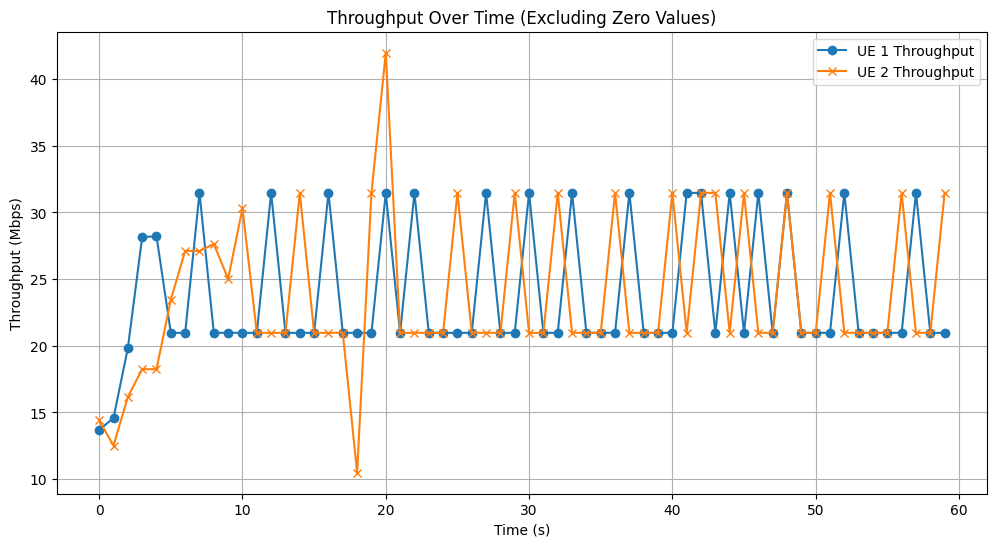

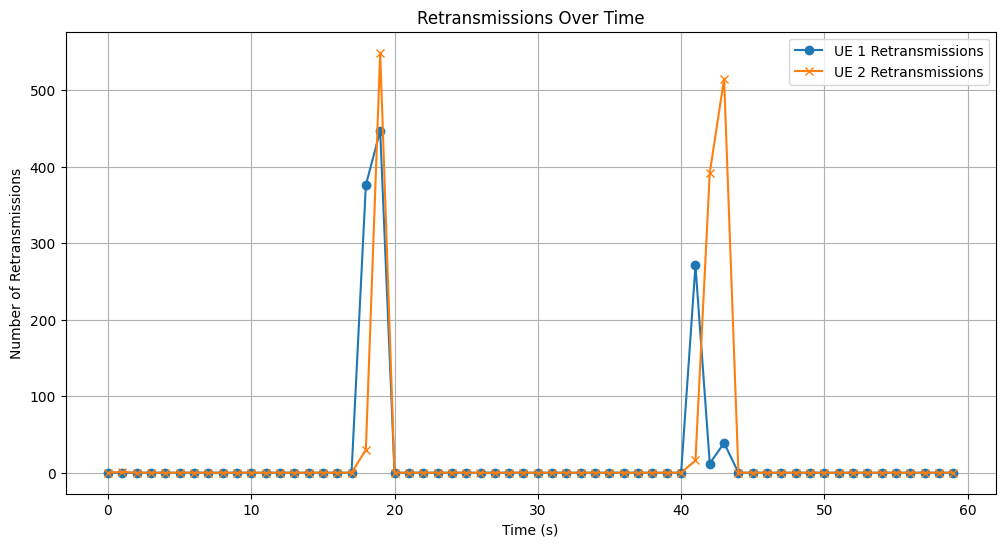

In [25]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Replace these with the paths to your actual iperf JSON result files
file1 = 'cubic_ecn_none-result-ue1.json'
file2 = 'cubic_ecn_none-result-ue2.json'

def load_iperf_data(filename):
    """Load iperf JSON data from a file and return a pandas DataFrame."""
    with open(filename, 'r') as f:
        data = json.load(f)
    
    # Initialize lists to store the extracted data
    intervals = data['intervals']
    start_times = []
    end_times = []
    durations = []
    throughputs = []
    retransmissions = []
    
    # Iterate over each interval in the data
    for interval in intervals:
        sum_data = interval['sum']
        start_times.append(sum_data['start'])
        end_times.append(sum_data['end'])
        durations.append(sum_data['seconds'])
        # Convert throughput from bits per second to megabits per second
        throughput_mbps = sum_data['bits_per_second'] / 1_000_000  # Divide by 1,000,000
        throughputs.append(throughput_mbps)
        retransmissions.append(sum_data.get('retransmits', 0))  # Retransmits might not be present in UDP tests
    
    # Create a DataFrame
    df = pd.DataFrame({
        'Start Time': start_times,
        'End Time': end_times,
        'Duration': durations,
        'Throughput (Mbps)': throughputs,
        'Retransmissions': retransmissions
    })
    
    return df

def filter_zero_throughput(df):
    """Filter out data points where throughput is zero."""
    return df[df['Throughput (Mbps)'] != 0].reset_index(drop=True)

# Load data from both files
df1 = load_iperf_data(file1)
df2 = load_iperf_data(file2)

# Filter out zero throughput data points for plotting throughput
# df1_nonzero = filter_zero_throughput(df1)
# df2_nonzero = filter_zero_throughput(df2)

# Calculate overall throughput and average retransmissions for each dataset
overall_throughput1 = df1['Throughput (Mbps)'].mean()
average_retransmits1 = df1['Retransmissions'].mean()

overall_throughput2 = df2['Throughput (Mbps)'].mean()
average_retransmits2 = df2['Retransmissions'].mean()

print(f"UE 1 - Overall Throughput: {overall_throughput1:.2f} Mbps")
print(f"UE 1 - Average Retransmissions: {average_retransmits1:.2f}")

print(f"\nUE 2 - Overall Throughput: {overall_throughput2:.2f} Mbps")
print(f"UE 2 - Average Retransmissions: {average_retransmits2:.2f}")

# Plotting the throughputs over time (excluding zero throughput data points)
plt.figure(figsize=(12, 6))
plt.plot(df1['Start Time'], df1['Throughput (Mbps)'], label='UE 1 Throughput', marker='o')
plt.plot(df2['Start Time'], df2['Throughput (Mbps)'], label='UE 2 Throughput', marker='x')
plt.title('Throughput Over Time (Excluding Zero Values)')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the retransmissions over time (include all data points)
plt.figure(figsize=(12, 6))
plt.plot(df1['Start Time'], df1['Retransmissions'], label='UE 1 Retransmissions', marker='o')
plt.plot(df2['Start Time'], df2['Retransmissions'], label='UE 2 Retransmissions', marker='x')
plt.title('Retransmissions Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Number of Retransmissions')
plt.legend()
plt.grid(True)
plt.show()


COMMENT: the cwnd calculation is not showing the expected result. 

In [70]:

name_tx0="cubic_ecn_none"


# the csv files generated is of the following format
# timestamp, fd, cwnd, srtt

file_out_tx0_csv = name_tx0+"-ss.csv"

for ue_id in range(1, 3):
    print("Running to generate csv files " + name_tx0)

    ss_tx0_script_processing="""

    f_1={types}; 
    ue_id={ue_id};
    rm -f ${{f_1}}-ss-${{ue_id}}.csv;
    cat ${{f_1}}-ss-${{ue_id}}.txt | sed -e ":a; /<->$/ {{ N; s/<->\\n//; ba; }}"  | grep "iperf3" | grep -v "SYN-SENT"> ${{f_1}}-ss-processed-${{ue_id}}.txt; 
    cat ${{f_1}}-ss-processed-${{ue_id}}.txt | awk '{{print $1}}' > ts-${{f_1}}-${{ue_id}}.txt; 
    cat ${{f_1}}-ss-processed-${{ue_id}}.txt | grep -oP '\\bcwnd:.*?(\s|$)' | awk -F '[:,]' '{{print $2}}' | tr -d ' ' > cwnd-${{f_1}}-${{ue_id}}.txt; 
    cat ${{f_1}}-ss-processed-${{ue_id}}.txt | grep -oP '\\brtt:.*?(\s|$)' | awk -F '[:,]' '{{print $2}}' | tr -d ' '  | cut -d '/' -f 1   > srtt-${{f_1}}-${{ue_id}}.txt; 
    cat ${{f_1}}-ss-processed-${{ue_id}}.txt | grep -oP '\\bfd=.*?(\s|$)' | awk -F '[=,]' '{{print $2}}' | tr -d ')' | tr -d ' '   > fd-${{f_1}}-${{ue_id}}.txt;
    paste ts-${{f_1}}-${{ue_id}}.txt fd-${{f_1}}-${{ue_id}}.txt cwnd-${{f_1}}-${{ue_id}}.txt srtt-${{f_1}}-${{ue_id}}.txt -d ',' > ${{f_1}}-ss-${{ue_id}}.csv;""".format(types=name_tx0, ue_id="ue"+str(ue_id))

    tx.run(ss_tx0_script_processing)

tx.get("cubic_ecn_none"+"-ss-ue1.csv")
tx.get("cubic_ecn_none"+"-ss-ue2.csv")


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yaoyu\AppData\Local\Temp\ipykernel_6752\2911777773.py:12: SyntaxWarning: invalid escape sequence '\s'
  ss_tx0_script_processing="""


Running to generate csv files cubic_ecn_none
Running to generate csv files cubic_ecn_none


In [71]:
import itertools
import json
import pandas as pd

throughput_data = {}  # Initialize the dictionary
srtt_data = {}
cwnd_data= pd.DataFrame()
srtt_data_time= pd.DataFrame()

for ue_id in range(1, 3):
    name_tx0="cubic_ecn_none"
    ue_str = "ue"+str(ue_id)

    # Load the JSON output file into a Python object
    with open(f"{name_tx0}-result-{ue_str}.json") as f:
        iperf3_data = json.load(f)

    throughput_data[name_tx0+ue_str] = iperf3_data['end']['sum_received']['bits_per_second'] / (1000000 * 1)  # to convert Mbit

    # Average SRTT for Each Flow
    columns = ['timestamp', 'flow ID', 'cwnd', 'srtt']
    df_f1 = pd.read_csv(f"{name_tx0}-ss-{ue_str}.csv", names=columns)
    
    # Filter out rows with flow ID = 4, they are for the control flows
    df_f1 = df_f1[df_f1['flow ID'] != 4].reset_index(drop=True)

    average_RTT_f1 = df_f1['srtt'].mean()
    
    cwnd_data[name_tx0+ue_str] = df_f1['cwnd']
    srtt_data[name_tx0+ue_str] = average_RTT_f1
    srtt_data_time[name_tx0+ue_str] = df_f1['srtt']

# Save throughput_data to a JSON file
with open('throughput_data.json', 'w') as f:
    json.dump(throughput_data, f)

# Save srtt_data to a JSON file
with open('srtt_data.json', 'w') as f:
    json.dump(srtt_data, f)

cwnd_data.to_csv("consolidated_cwnd_data.csv", index=False)
srtt_data_time.to_csv("time_srtt.csv", index=False)

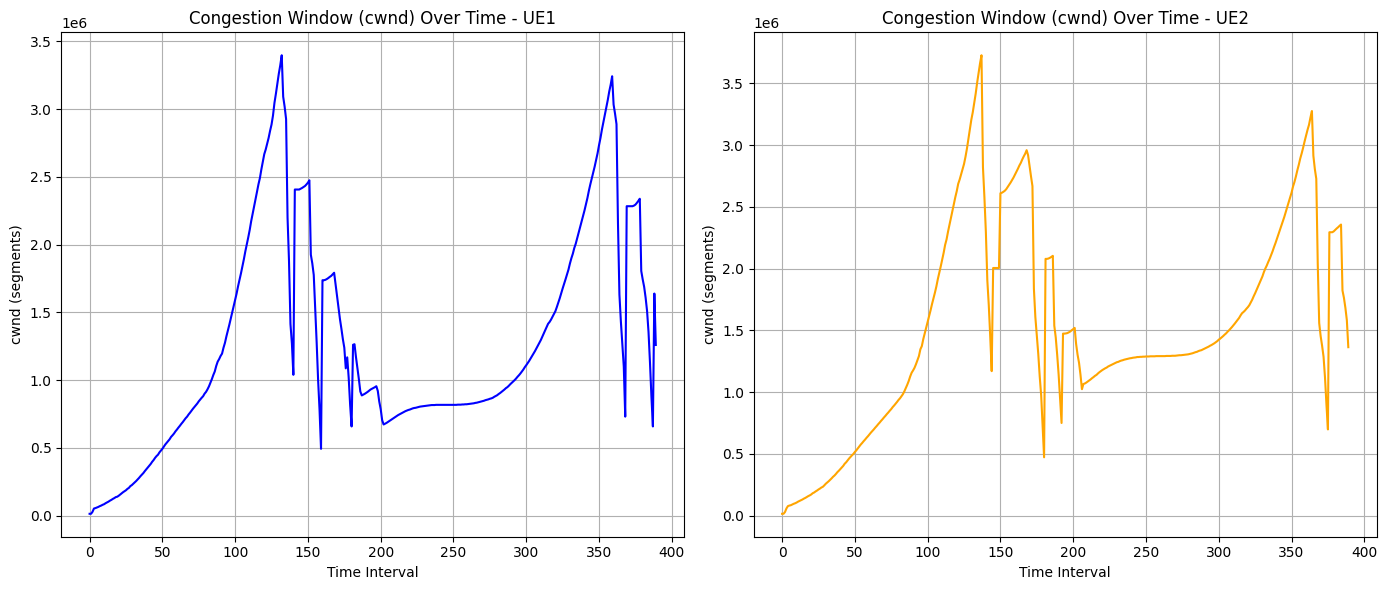

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# btl_limit_noecn=int(1000*btl_capacity*base_rtt*n_bdp /8)

# print("btl limit no ecn: ", btl_limit_noecn)

# Specify the filename
filename = 'consolidated_cwnd_data.csv'  # Replace with your actual filename

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(filename)

# Extract data for each UE
ue1_data = df['cubic_ecn_noneue1']
ue2_data = df['cubic_ecn_noneue2']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for UE1
axes[0].plot(ue1_data*1448, marker='', color='blue')
axes[0].set_title('Congestion Window (cwnd) Over Time - UE1')
axes[0].set_xlabel('Time Interval')
axes[0].set_ylabel('cwnd (segments)')
# axes[0].axhline(y=btl_limit_noecn, color='b', linestyle='--', label=f'Buffer Size')
axes[0].grid(True)

# Plot for UE2
axes[1].plot(ue2_data*1448, marker='', color='orange')
axes[1].set_title('Congestion Window (cwnd) Over Time - UE2')
axes[1].set_xlabel('Time Interval')
axes[1].set_ylabel('cwnd (segments)')
# axes[1].axhline(y=btl_limit_noecn, color='b', linestyle='--', label=f'Buffer Size')
axes[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [73]:
router.get("monitor.log")

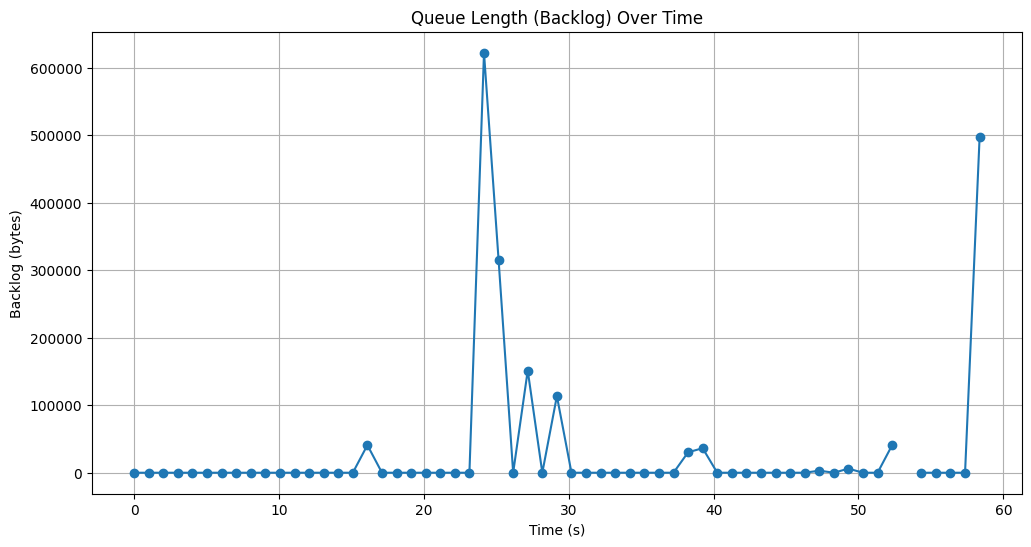

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      2.0
22    197.0
23    275.0
24    159.0
25     30.0
26      0.0
27     61.0
28    119.0
29      0.0
30    134.0
31      0.0
32     17.0
33      0.0
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      0.0
55     11.0
56    157.0
57    315.0
58     84.0
Name: Dropped Packets Diff, dtype: float64


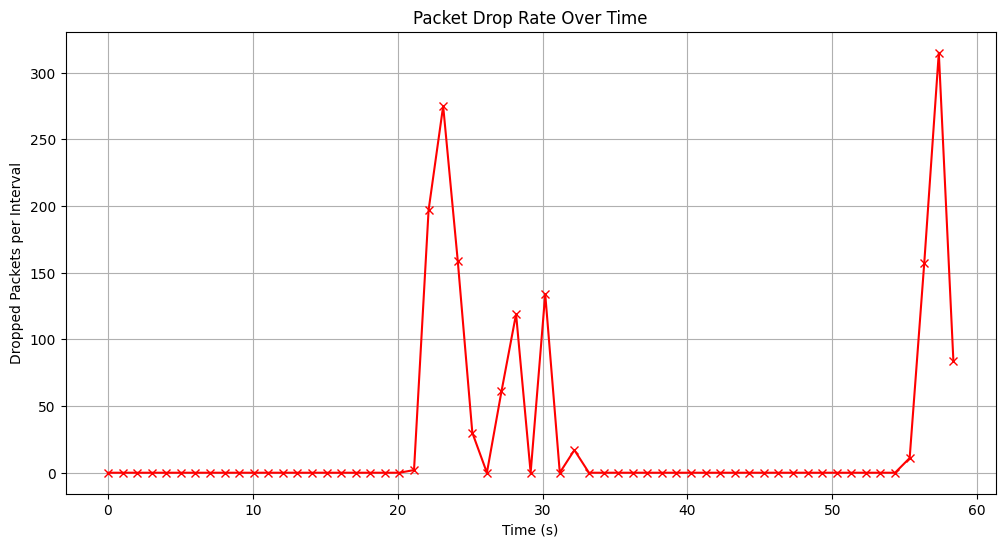

There is a backlog. Maximum backlog is 622254.0 bytes.


In [78]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your actual filename
filename = 'monitor.log'

def parse_qdisc_data(filename):
    """Parse qdisc data from a file and return a DataFrame."""
    timestamps = []
    sent_bytes = []
    sent_packets = []
    dropped_packets = []
    overlimits = []
    backlog_bytes = []
    backlog_packets = []

    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            # Extract timestamp
            match_time = re.match(r'^(\d+\.\d+)', line)
            if match_time:
                timestamp = float(match_time.group(1))
                timestamps.append(timestamp)
            else:
                continue  # Skip line if timestamp not found

            # Extract bfifo qdisc statistics
            # Assuming 'qdisc bfifo' appears after 'qdisc htb' in the line
            bfifo_data = line.split('qdisc bfifo')[1]

            # Extract Sent bytes and packets
            match_sent = re.search(r'Sent\s+(\d+)\s+bytes\s+(\d+)\s+pkt', bfifo_data)
            if match_sent:
                sent_bytes.append(int(match_sent.group(1)))
                sent_packets.append(int(match_sent.group(2)))
            else:
                sent_bytes.append(None)
                sent_packets.append(None)

            # Extract dropped packets
            match_dropped = re.search(r'dropped\s+(\d+)', bfifo_data)
            if match_dropped:
                dropped_packets.append(int(match_dropped.group(1)))
            else:
                dropped_packets.append(None)

            # Extract overlimits
            match_overlimits = re.search(r'overlimits\s+(\d+)', bfifo_data)
            if match_overlimits:
                overlimits.append(int(match_overlimits.group(1)))
            else:
                overlimits.append(None)

            # Extract backlog bytes and packets
            match_backlog = re.search(r'backlog\s+(\d+)b\s+(\d+)p', bfifo_data)
            if match_backlog:
                backlog_bytes.append(int(match_backlog.group(1)))
                backlog_packets.append(int(match_backlog.group(2)))
            else:
                backlog_bytes.append(None)
                backlog_packets.append(None)

    # Create a DataFrame
    df = pd.DataFrame({
        'Timestamp': timestamps,
        'Sent Bytes': sent_bytes,
        'Sent Packets': sent_packets,
        'Dropped Packets': dropped_packets,
        'Overlimits': overlimits,
        'Backlog Bytes': backlog_bytes,
        'Backlog Packets': backlog_packets
    })

    # Convert timestamps to relative time (seconds since start)
    df['Relative Time'] = df['Timestamp'] - df['Timestamp'].iloc[0]

    return df

def plot_queue_length(df):
    """Plot queue length (backlog) over time."""
    plt.figure(figsize=(12, 6))
    plt.plot(df['Relative Time'], df['Backlog Bytes'], marker='o')
    plt.title('Queue Length (Backlog) Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Backlog (bytes)')
    plt.grid(True)
    plt.show()

def plot_packet_drop_rate(df):
    """Plot packet drop rate over time."""
    # Calculate the difference in dropped packets between measurements
    df['Dropped Packets Diff'] = df['Dropped Packets'].diff().fillna(0)
    
    print(df['Dropped Packets Diff'])

    plt.figure(figsize=(12, 6))
    plt.plot(df['Relative Time'], df['Dropped Packets Diff'], marker='x', color='red')
    plt.title('Packet Drop Rate Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Dropped Packets per Interval')
    plt.grid(True)
    plt.show()

def analyze_backlog(df):
    """Analyze backlog and determine if there is a backlog."""
    max_backlog = df['Backlog Bytes'].max()
    if max_backlog > 0:
        print(f"There is a backlog. Maximum backlog is {max_backlog} bytes.")
    else:
        print("There is no backlog. The queue is empty throughout the measurements.")

# Main execution
df = parse_qdisc_data(filename)

# Plot queue length
plot_queue_length(df)

# Plot packet drop rate
plot_packet_drop_rate(df)

# Analyze backlog
analyze_backlog(df)


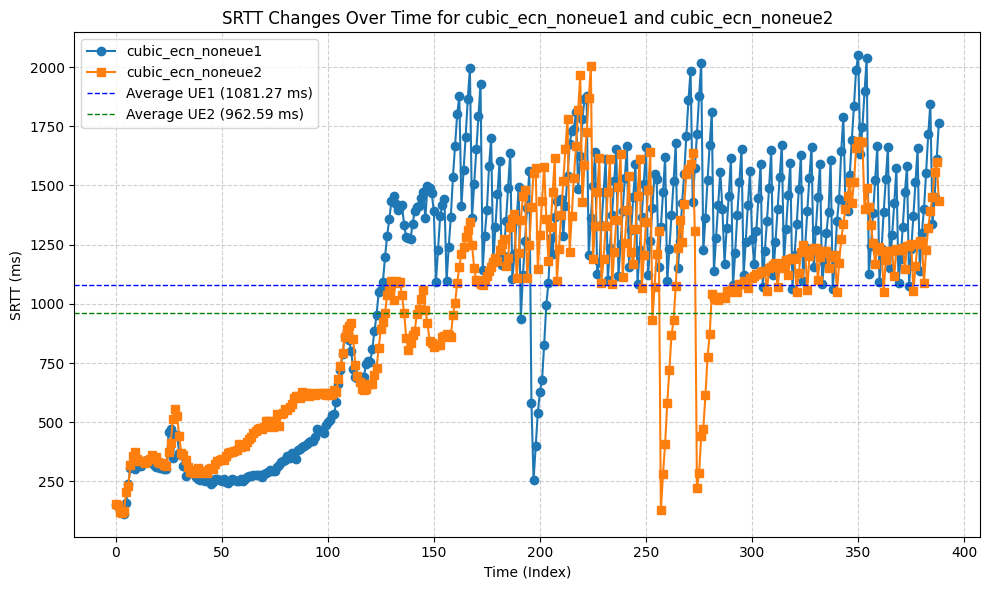

Average SRTT for cubic_ecn_noneue1: 1081.268 ms
Average SRTT for cubic_ecn_noneue2: 962.587 ms


In [77]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# File path to the uploaded CSV file
file_path = 'cubic-code-no-slicing/time_srtt.csv'

# Reading the CSV file
df = pd.read_csv(file_path)

# Calculate the average SRTT for each UE
avg_ue1 = df['cubic_ecn_noneue1'].mean()
avg_ue2 = df['cubic_ecn_noneue2'].mean()

# Plot the SRTT changes over time for both UE1 and UE2
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cubic_ecn_noneue1'], label='cubic_ecn_noneue1', marker='o')
plt.plot(df.index, df['cubic_ecn_noneue2'], label='cubic_ecn_noneue2', marker='s')

# Plot average lines
plt.axhline(y=avg_ue1, color='blue', linestyle='--', linewidth=1, label=f'Average UE1 ({avg_ue1:.2f} ms)')
plt.axhline(y=avg_ue2, color='green', linestyle='--', linewidth=1, label=f'Average UE2 ({avg_ue2:.2f} ms)')

# Adding labels and title
plt.xlabel('Time (Index)')
plt.ylabel('SRTT (ms)')
plt.title('SRTT Changes Over Time for cubic_ecn_noneue1 and cubic_ecn_noneue2')

# Adding a legend and grid
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

# Print the average SRTT for each UE
print(f"Average SRTT for cubic_ecn_noneue1: {avg_ue1:.3f} ms")
print(f"Average SRTT for cubic_ecn_noneue2: {avg_ue2:.3f} ms")
